In [ ]:
import requests as rq
import json
import pandas as pd
import numpy as np
from textwrap import wrap
from matplotlib import pyplot as plt
from  TCGA_files import *
from ensembleAPI import geneinfo, genesinfo
from IPython.display import HTML
from sklearn import metrics

In [ ]:
cases_endpt = 'https://api.gdc.cancer.gov/cases'
fields = [
    "submitter_id",
    "case_id",
    "primary_site",
    "disease_type",
    "diagnoses.tumor_stage",
    "diagnoses.tumor_grade",
    "diagnoses.primary_diagnosis",
    "diagnoses.classification_of_tumor",
    "annotations.classification",
    "samples.tumor_code"
    ]
fields = ','.join(fields)

# query file

See https://docs.gdc.cancer.gov/API/Users_Guide/Appendix_A_Available_Fields/#file-fields for possible *fields*

In [16]:
queryFile('007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz')

quering...007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz


samples.0.tumor_code                         disease_type  \
0                       Complex Mixed and Stromal Neoplasms   

  samples.1.tumor_code  submitter_id diagnoses.0.classification_of_tumor  \
0                       TCGA-NA-A4QV                        not reported   

                                case_id primary_site diagnoses.0.tumor_grade  \
0  cdde118f-4673-4e7e-b965-1f9fe007050d  Uterus, NOS            not reported   

  diagnoses.0.primary_diagnosis diagnoses.0.tumor_stage  \
0           Carcinosarcoma, NOS            not reported   

                                     id  
0  cdde118f-4673-4e7e-b965-1f9fe007050d

## query many

In [ ]:
files = []

In [18]:
cluster = {0: [('007f49fe-d251-4ae4-9313-86d765b13499', 1.0),
  ('ced1ce50-d6eb-4e46-9ae7-868cebded849', 1.0),
  ('0f0b9f59-eeab-47a2-9aa5-642d06963fe4', 1.0),
  ('969472c4-f5e0-4e37-8d5c-22ef54e674f5', 1.0),
  ('a16e680a-52ef-4d61-a2e7-d6dcd7da7616', 1.0),
  ('3a1f9f5b-2c01-4023-94e9-9a34f9ae8e6f', 1.0),
  ('b84940eb-7f19-44a7-93e8-8fdddc668ea3', 1.0),
  ('6cfe4458-1396-4646-bce7-e2bfbcdb6b86', 1.0),
  ('81df14d6-c7aa-44ca-a6b5-29373563afa7', 1.0),
  ('823fe3f1-1e0f-4d35-8060-e54ba636992e', 1.0),
  ('a31ae0ac-683a-4e75-9af7-03bae233d6f2', 1.0),
  ('23e0ae85-b11a-4cf6-a78f-12d33af37783', 1.0),
  ('459da4d7-7821-4275-a733-576e4504ce5f', 1.0),
  ('686fb7ee-bdd2-4c41-ab25-c0d8b0ccc049', 1.0),
  ('0abe1897-c3a9-47e5-8a59-e5a2232b23db', 1.0),
  ('a4e8501a-254e-424d-9dd1-c499076e610a', 1.0),
  ('62b665c7-bb8a-4e6e-a21a-10d5ea519d1a', 1.0),
  ('a717b697-d2cc-4edb-9742-d976aae5beae', 1.0),
  ('27a9c6bd-6e26-4055-867c-ab7276492464', 1.0),
  ('f35be558-137d-4d13-b9a4-d2b2046cfde9', 1.0),
  ('7569737d-8991-43f2-ba55-80b822282224', 1.0),
  ('63c39b0f-2e8f-4ad1-a943-f58f10bd3a49', 1.0),
  ('bab0e5d9-2a58-4537-b554-e12394ee24de', 1.0),
  ('e42325eb-57ce-4b5b-af02-ec1b0fe0644d', 1.0),
  ('d5c8e330-8889-475f-b29e-4e934b39fe56', 1.0),
  ('4dd62d93-f835-4664-b9a5-6cdf0dd5f176', 1.0),
  ('e24662bd-3b02-4762-b306-75f98b700375', 1.0),
  ('d0add3e1-2ece-4563-8189-41a034ccbec2', 1.0),
  ('591900d8-1acb-4a33-b195-6f7a92b9036b', 1.0),
  ('7824eae3-957c-4515-b128-45453a11624d', 1.0),
  ('bde9c657-1c07-4235-a382-6e335a08e2f2', 1.0),
  ('c504f1c1-c643-4454-9acf-a00e24e38f44', 1.0)],
 1: [('b76eefac-da30-4ee4-9670-4afc45f86b4b', 1.0),
  ('ea8498cf-e0d1-4c68-8459-36aeeca9dd53', 1.0),
  ('e53f1c7e-2846-491a-9517-7215f4af2f74', 1.0),
  ('18fbee33-4731-41f4-bdc9-6cf90952d370', 1.0),
  ('ce85344b-0f16-4f96-b8da-af518e2adc71', 1.0),
  ('ce40da7e-5408-4ecb-84e1-059dc054f38d', 1.0),
  ('31365cc1-6425-4966-98b4-0eb1af4578ec', 1.0),
  ('4e7c8fb8-81c8-477a-b012-b6e4d89c88f2', 1.0),
  ('171a4828-984e-4225-b16c-c0bd6c319e06', 1.0),
  ('4e2d8faa-1d4a-41d6-ad45-a8206cfd9c90', 1.0),
  ('64cf9ae1-d259-4d24-a448-37c00b7f9ded', 1.0),
  ('157d34d0-1e1b-4004-9141-34bfe201788c', 1.0),
  ('4dcd18d6-b7b2-4a92-bcbe-361c7278e84e', 1.0),
  ('a586e45b-1f76-4aac-9e12-a7302ebe4217', 1.0),
  ('c9719194-63d1-4e32-8ce4-7f0a62319025', 1.0),
  ('eb5bc3d0-9f66-413f-b6bb-72a5a6b7fde9', 1.0),
  ('8cd31f85-1d2e-4d90-bd8b-7ca7ebd9241b', 1.0),
  ('4ce3e99a-a195-414c-a967-7d3795d48934', 1.0),
  ('ec27c2ca-312a-4e06-bc8f-ca8cb085ab3e', 1.0),
  ('c7944a7a-c074-43fd-b736-8414bc86467c', 1.0),
  ('1287d36a-6a27-4e4e-a2f7-51727ac3cc0e', 1.0),
  ('84ab7d33-de05-49a8-af92-5ce869de2561', 1.0),
  ('4aa06322-99a1-49e8-ad18-c92cb676da51', 1.0),
  ('4a9bb3fd-4e75-4585-82f7-7254889b9838', 1.0),
  ('aa96ddcb-cfd6-4696-9669-d10ca5bcac82', 1.0),
  ('0fa42346-ce4a-4f63-832f-e347145b8c72', 1.0),
  ('836e295d-d1e1-48f1-98c8-04d649fbd796', 1.0),
  ('c3ed7c7a-b80a-4de2-8dfb-b60bcf336375', 1.0),
  ('aae31d67-6d6a-4150-be3f-67d98b16abbc', 1.0),
  ('698eba4b-b0f0-4923-9e43-d9707959c65f', 1.0),
  ('e4e0ed55-a9f4-4978-9aa5-7a6f892ebb53', 1.0),
  ('e4b48aa4-4fc3-48b6-9f65-01e99fc85608', 1.0),
  ('49169d14-c16b-4f51-9cf6-4191d3d2e25f', 1.0),
  ('ddf98c57-1c48-4277-8a49-c74f52141723', 1.0),
  ('968ba83a-fbf6-45ca-b8a9-6543b30be443', 1.0),
  ('95c0cf0b-7077-4a93-9590-3948e55c6e31', 1.0),
  ('24d7f10a-ac34-4f7e-8424-d2fc0d32ac58', 1.0),
  ('54f95193-f419-44ce-b397-a67ef67786a4', 1.0),
  ('23f8f5e2-25b8-4b43-b939-66e7e3f55977', 1.0),
  ('23894b02-d2b5-4a15-a11f-cf81d9d97f53', 1.0),
  ('22d5f0c9-2f95-4a72-b8c6-d98c1bce07f7', 1.0),
  ('2807d45f-9e15-4e06-8336-de7295fc7509', 1.0),
  ('dc0592cf-5a96-4aed-86b2-eb7de5492b7c', 1.0),
  ('20ff57b5-eeb2-4312-a5e0-11ac8c8d573a', 1.0),
  ('2843eb58-20ce-4cbb-a783-61d85d10557a', 1.0),
  ('dd538c2f-a55d-4f4c-a83a-1507bf365403', 1.0),
  ('999edb9e-8a45-4115-84d5-fca75dcfa639', 1.0),
  ('29c4a2e1-2e48-4f4a-9ad6-9b0a7c04b8e9', 1.0),
  ('8d13e259-238e-4d2f-b9d3-4cffd4302abb', 1.0),
  ('d2ba49d2-5207-495c-97b3-d70ebef30c7d', 1.0),
  ('b73518ee-287c-4130-9da2-61772aa195fc', 1.0),
  ('1ead6cd1-6336-4ecd-9a0c-88c39bd52a03', 1.0),
  ('1e7b2b3b-f84d-42b2-b991-42d44f10340b', 1.0),
  ('dfe06359-c16a-4959-bb04-298f18474a17', 1.0),
  ('9cc0c202-2c59-4b3b-98d4-b79f61906879', 1.0),
  ('5d3c2256-e8ed-4145-8c2d-b221c75dc049', 1.0),
  ('1d293e9f-7672-428c-be8d-3d180c8e8590', 1.0),
  ('9151bbcc-ecef-40fc-8834-e24ff848e1a2', 1.0),
  ('5f615a4b-f0c6-4313-88f3-a2a8f4a713c4', 1.0),
  ('8e884e57-d4c4-4b44-a7a3-76bc9694388f', 1.0),
  ('cf1a1478-68c1-431b-86cb-c4ddb105accf', 1.0),
  ('9fe16c01-88f8-410c-b412-fe0067b10aaa', 1.0),
  ('ef6406a9-591e-421f-8ed4-0fee40f53ef5', 1.0),
  ('133a3327-f686-4061-b6a3-edcc9085264e', 1.0),
  ('0abdff51-3e12-492e-bf51-fe302318d8c7', 1.0),
  ('b41174a5-4db8-438c-a9fa-6da8c08a9c75', 1.0),
  ('b2544700-678b-4daa-841c-bf401896da1b', 1.0),
  ('bfe796aa-7f29-49d2-a72f-79a9acf12365', 1.0),
  ('08ca348b-8c35-4f2e-ba37-c5bcb02c7896', 1.0),
  ('7e89a428-9132-4efa-b119-10241f0ecdcc', 1.0),
  ('74fcc4a6-24a4-4de8-83b6-408f248bce01', 1.0),
  ('f3631c65-b194-4894-85cb-146980e4cb2c', 1.0),
  ('7e450615-1252-4b4c-bebb-0f292dec3ceb', 1.0),
  ('b85e2c85-8baa-4c95-9d23-84d77c1e2c48', 1.0),
  ('02939ecf-77d0-49fc-a04b-8fd5334b44da', 1.0),
  ('f9787d01-42ae-46a6-b098-9450cff06cf5', 1.0),
  ('b8e564b0-affd-4137-a10c-be4fe254a905', 1.0),
  ('79c1a9c6-a12e-4e12-8acd-52a8ea0f9dea', 1.0),
  ('f790ef4c-71bf-43a7-a610-4006a4c0a42c', 1.0),
  ('f76b3ebd-e168-41b4-ac1f-e58b583a0506', 1.0),
  ('067b54e1-ade4-4607-9dac-af223e2eaf9d', 1.0),
  ('ffdf6fbf-5bee-49f7-8126-414651f3a317', 1.0),
  ('b52e7b94-7fcc-4e31-ade1-0898a418598a', 1.0),
  ('6d44a9ba-d0f4-4d8b-b368-036d00198d1f', 1.0),
  ('0c2cf133-50aa-44c9-b4a8-5d17ac2f54f4', 1.0),
  ('41f9bceb-88d0-44ae-9eab-6ff9a6484e93', 1.0),
  ('b7d3f454-f36e-4ad0-bb40-8728ca3b240d', 1.0),
  ('eff0bfff-4b66-4fd1-9f5b-ceb3cf6c7c81', 1.0),
  ('bc7f010c-02d8-4cde-ac36-f11eb5d0042b', 1.0),
  ('47d55900-0081-4c1f-ba13-beac60c63bec', 1.0),
  ('ffd7b10e-8c0c-4aeb-81a0-b060108d57fa', 1.0),
  ('009ff7e3-8bd3-4683-adf5-7b68a0859f35', 1.0),
  ('6c6d7c1d-7a53-4877-8cbe-f50a26e7156b', 1.0),
  ('0d604955-ce10-4fa9-ba8b-9417c5719653', 1.0),
  ('412fcc8b-734c-439e-a540-33e9a43cac9c', 1.0),
  ('46c0216c-ff17-4ebf-ad8f-b054542fc2a9', 1.0),
  ('7f2cf950-b5e1-4a01-a44b-88a4e3303233', 1.0),
  ('f8c2f22d-5254-46c1-9b7d-429e5ac2854e', 1.0),
  ('72be5cae-79cb-40da-b6ba-00d2192d6ec8', 1.0)],
 2: [('7c2ce96b-9ada-43b5-a522-91e307379f79', 1.0),
  ('89e5198e-8a80-4cdc-a457-17368563bdeb', 1.0),
  ('91c13a13-2b7b-43b5-ba99-ef28e22b0c80', 1.0),
  ('65312630-1884-4160-b812-d932fc0a7c78', 1.0),
  ('65b58f18-7b8d-488b-a906-1ee8a52c5a74', 1.0),
  ('8ba8fe41-cc4b-4bbc-974e-6b75a3ac3be6', 1.0),
  ('692d3cf9-23f5-472c-85a7-cb266a0fb9db', 1.0),
  ('ec57a9a3-90f1-4559-a241-d647a9ce37e8', 1.0),
  ('11d18719-8168-4d05-9dff-8305c0d8db55', 1.0),
  ('8a4d662e-e7ec-4c31-bad3-607efaf3ea00', 1.0),
  ('6b19ce18-911c-4d18-adb0-c3e433ec53bb', 1.0),
  ('1ab1c603-74a7-42b6-afd4-96b008e3f187', 1.0),
  ('86b6f374-3d4c-4da2-a89b-489a944bdeab', 1.0),
  ('0ef4e36a-8e8a-4d7e-8c4c-e194804d326d', 1.0),
  ('8629eea4-710b-4f37-ab7f-afa5276d8712', 1.0),
  ('0d9f2953-424e-4008-bd7d-719a7e7ef4a1', 1.0),
  ('0cce93d3-f124-4e51-bae5-96b2e543b5a5', 1.0),
  ('f1fddf0c-babe-4c67-bd3b-5633e17086a4', 1.0),
  ('835ae143-fbbd-426b-b072-6ed8ca004174', 1.0),
  ('f311b81e-f58e-4dac-be2d-5a39c19399ac', 1.0),
  ('19718d82-5717-4903-af17-ce18eae1604d', 1.0),
  ('617229ba-ee07-4b63-9e1b-85f7cd828389', 1.0),
  ('0b0bcba2-9f11-4381-b168-e13f56e90705', 1.0),
  ('cd70ac4d-6f7e-4b09-8f5a-22e40be14bf0', 1.0),
  ('ba151af1-bca6-4683-87b3-53999d516523', 1.0),
  ('42cb6883-363e-4ca6-acbc-c2a77a821fcf', 1.0),
  ('c0641ad4-f73b-4c12-b9f0-037a185bc5b7', 1.0),
  ('c242255b-b368-4f60-9c67-00365f202461', 1.0),
  ('47016973-023f-41de-927d-0df1e0d1789e', 1.0),
  ('b32b38be-4f53-4aeb-a190-bfe2a048b9bb', 1.0),
  ('ca83752c-6f18-495e-9662-8b5e2aff9e24', 1.0),
  ('b15a2a09-2fa9-4696-a65a-9341f490fdb5', 1.0),
  ('31524671-a312-44fe-b3d2-4052ce176ed6', 1.0),
  ('e2189723-f7a8-4117-b9b1-e5b34eb47021', 1.0),
  ('50dac4be-80dd-4658-a1fa-eac44c1a858c', 1.0),
  ('d5d1ce0c-e908-4890-87d0-0a7b3b1bbb00', 1.0),
  ('28974514-8de7-4fee-a55a-25a66fcbd1a8', 1.0),
  ('d7aa7724-8435-4b08-b4b2-ea0eb86ea184', 1.0),
  ('5347b69e-eb89-4c1f-829f-3787b6d7db62', 1.0),
  ('26657b95-de92-4d40-a793-a9ef7ccaa352', 1.0),
  ('5ada9151-0b86-471f-abe1-ead94f61ce05', 1.0),
  ('e00b2468-1599-424a-90dc-1749e1ab8587', 1.0),
  ('82d61f67-f56e-4855-aa2e-44350982f8af', 1.0),
  ('bc862e6a-be57-44a6-8429-9f8948b0a91d', 1.0),
  ('f7fb7de2-e995-4e5b-9362-b4e20ed44070', 1.0),
  ('074f955e-0bcb-4252-990e-8864dc9beffd', 1.0),
  ('7ef16280-e921-4585-bca7-8429e6089a34', 1.0),
  ('81d5aaf1-ac19-4c1e-90b9-085a5ca83a1a', 1.0),
  ('737214d3-8cd7-4ba7-b034-19cb7911ffa8', 1.0),
  ('7bd62b90-1973-491b-8c70-b0f20deaecfd', 1.0),
  ('fa8b5c6a-0ad9-44b1-baba-440fdccbb828', 1.0),
  ('00e2c524-8a29-46d7-bf88-ed5f9c3dcf32', 1.0),
  ('fd154f79-d222-4849-8a78-d4da41850efd', 1.0)],
 3: [('bce05ff9-b5e8-4c9a-a495-5430e442ea1f', 1.0),
  ('69250540-2adc-42c9-8524-e354836462dd', 1.0),
  ('d0409e46-3670-41aa-9410-0ed6091483f3', 1.0),
  ('ec4a2c9d-1d81-4129-b2b9-ac500f39f7ca', 1.0),
  ('ec5e2ca7-4e3c-453d-818e-cde991d0c98b', 1.0),
  ('ecff0d66-7705-4671-9d00-99eced84c7d1', 1.0),
  ('8b38a4c1-3e32-48fd-b8ff-1096aee875ae', 1.0),
  ('8ad31797-b5dc-473b-ae64-182664497879', 1.0),
  ('8a69e294-e600-432c-8900-cf8f650a8319', 1.0),
  ('6a2fc43b-131d-4bba-8e64-8a39243fcdc6', 1.0),
  ('d4b4ea9b-e7ab-431c-bb34-409a381bff44', 1.0),
  ('34ba240c-01ec-4853-a9ca-14540a9340bf', 1.0),
  ('f08f0585-8492-4394-a7b2-995de86cd13a', 1.0),
  ('4a773e8d-4b37-4f1f-9b6b-35afdc3d32c9', 1.0),
  ('f1c7d45b-f293-4b9f-b039-52bf7fcf5853', 1.0),
  ('36134979-4e1d-46d7-a019-6b14277b9f24', 1.0),
  ('0c6858b0-b3c3-4e40-8ec9-e54927975213', 1.0),
  ('c7781536-da0b-41a3-9d72-f6fea426653b', 1.0),
  ('aa09a5af-44cc-4f04-9ad9-d3b0a8b6aafc', 1.0),
  ('51055281-028a-442a-aff8-829dc01f8114', 1.0),
  ('0a4df4cc-74dd-4858-864b-b483e75b30f8', 1.0),
  ('5f1a1318-e500-48a5-9096-b6ca85601e59', 1.0),
  ('984e48d4-d2d0-4dee-957a-20a9d1150781', 1.0),
  ('97e8bc29-7d59-468a-8776-cfd294f05bba', 1.0),
  ('1fcf76b2-5170-4b1b-aac0-4a62b2b5281d', 1.0),
  ('58854566-2e6f-4581-be44-1a06edea4a91', 1.0),
  ('253560ae-d7c5-4f89-9283-328913159c7a', 1.0),
  ('9fa09bf7-1ddc-46c3-9fd8-310ae4478a49', 1.0),
  ('5ec72280-04a7-434f-bdee-5bcffe7bc83d', 1.0),
  ('5f41f477-99ab-4fc7-a43a-8bf4317c6952', 1.0),
  ('293bd050-b485-496e-9b2c-02564e790879', 1.0),
  ('1b99466b-3732-43be-a4cd-cfb304736061', 1.0),
  ('e3ed758e-6842-45dd-9048-82cf7a7be5b2', 1.0),
  ('26b9d14a-da14-4062-8494-fb87b04e9d7b', 1.0),
  ('5fc3fbd1-4c66-4086-988c-590ec076216a', 1.0),
  ('d903e92f-677f-4292-b2f7-66e0fcea767f', 1.0),
  ('926b6dfe-cd94-4fae-bc95-18dec0f49145', 1.0),
  ('5169c393-79f9-4ffa-bc04-98375e42c81d', 1.0),
  ('0a923c09-5f30-4e5c-adef-baca0c461227', 1.0),
  ('596e208a-962b-45d9-b4f0-0eb244dd7874', 1.0),
  ('39952ce1-cb34-48c6-ad20-7aca8286f4ef', 1.0),
  ('09813624-fb69-4127-ba16-5d8bb7e6cabb', 1.0),
  ('456b4981-9f37-42ff-b056-883a19ebc7a9', 1.0),
  ('75140780-afad-4633-b7b8-f289abdedcf9', 1.0),
  ('b7174918-6cea-417e-8a86-f3a61ad81153', 1.0),
  ('438b9759-ae94-4ba7-861c-9b1656ad8ed6', 1.0),
  ('b6fd2d99-73d8-4881-a03c-fdc3c47cbd12', 1.0),
  ('ff052832-df71-405d-9cc9-8e1f55f65610', 1.0),
  ('00eb7c26-84fd-4ab9-93a1-3d209dfc0f43', 1.0),
  ('3a657ffc-d6c1-44a6-8d6f-a955e5d1fe35', 1.0),
  ('7985247f-9162-420b-b09c-55c977985b1e', 1.0),
  ('fc5f707b-76cd-4c0d-a9de-ede5a1ef2bb5', 1.0),
  ('3e528390-3ccc-4821-9dd5-52e344a37258', 1.0),
  ('c05ce281-b3ce-4c02-a051-3fd68ad2d62d', 1.0),
  ('3e28d575-bfc1-4ff5-bc78-afacba140ca0', 1.0)],
 4: [('e770b299-b4c2-4dee-95a8-abc3c5773439', 1.0),
  ('fc996542-68f3-4b12-9eb5-dd8680f461fa', 1.0),
  ('72824463-7699-45ab-82d1-6bd5467e88bc', 1.0),
  ('e7cc80ef-4b87-47d9-bebe-1fb05b5b04a2', 1.0),
  ('85593c7d-7441-4d41-81d3-aaa17c7e398b', 1.0),
  ('c98f395b-003f-41b1-abff-38b6b227d64c', 1.0),
  ('939eeb3c-9c0b-431f-8020-7165ee19f068', 1.0),
  ('38fa431c-aaff-44ef-a28a-3a6bdd4688d1', 1.0),
  ('44c3d518-14fa-4d63-b265-d7fc81c398e2', 1.0),
  ('94816a7b-6de4-4586-9ea0-0c4fbbc4abd8', 1.0),
  ('250df1dc-9fc4-4528-82ab-28a9e2be9bac', 1.0),
  ('0e556719-18fe-49e4-9c2e-454bb11c7e03', 1.0),
  ('8eb179a6-a0af-4628-aae2-78800db3e9d8', 1.0),
  ('fc480cc8-6c95-49d1-982c-98d20b57217a', 1.0),
  ('bb1b9683-173e-4a32-bbeb-f17c7ed114c6', 1.0),
  ('d64765a8-65d1-4205-bc12-2a23e056d901', 1.0),
  ('844163ae-2444-4406-9873-12e8295e3e07', 1.0),
  ('afc60bb6-6efc-4174-ade2-d148223ddf4b', 1.0),
  ('b14ad58e-4740-4c4f-83ff-7535efe6a055', 1.0),
  ('67fd4b38-5a38-487d-a235-064580064739', 1.0),
  ('97cc2d08-c822-4cc5-aafc-d2c1fc1c9b57', 1.0),
  ('7bf647f0-c20e-42e6-b7d5-6510a8d066fc', 1.0),
  ('efb7b03d-e283-47be-9233-edf945abb012', 1.0),
  ('01188815-3676-4980-9cb8-7666169328f1', 1.0)],
 5: [('fffc1088-c5a6-46a0-b050-860184f6ded2', 1.0),
  ('c5be9ea4-315d-4675-ad8e-269e44b7b77c', 1.0),
  ('2fafd7bb-e8ce-4b03-8607-cf6cb2a2119a', 1.0),
  ('30183a45-4eed-45ab-9121-0a93b36bcadb', 1.0),
  ('ceb8c083-f451-42f7-873d-8346caa0ffa3', 1.0),
  ('68fe871b-c631-469e-87a2-26130f416446', 1.0),
  ('8a24d983-1fc9-4f5d-8fe8-aa4ed2a21f7a', 1.0),
  ('eec28a5a-e054-486c-82c1-2f439b69ed62', 1.0),
  ('cd925805-378c-4070-a7f3-ba8084efd836', 1.0),
  ('8917fe2a-c1bb-440c-8ea5-655504006a63', 1.0),
  ('6b80ab23-66f8-47c8-9dcf-5f91a4c31c54', 1.0),
  ('6c1813df-fdce-41a4-bb26-c3c26e41d3bb', 1.0),
  ('4b77b6fa-7626-43fb-8684-87e3c09276bb', 1.0),
  ('84cefcf0-aa09-437f-bac4-c13c4ffcbc50', 1.0),
  ('c97a8237-60b4-4586-989e-ef82542eedca', 1.0),
  ('b25c8e4d-f6ca-4079-9120-b96147b9091e', 1.0),
  ('37355f52-90e5-43e8-a473-0d3bad45a394', 1.0),
  ('38083e21-7761-47c7-9112-769c7f85e283', 1.0),
  ('0b82329b-b34a-4cf5-ae33-f774c6401745', 1.0),
  ('ea50d2da-4f84-46dc-8036-c34392793aed', 1.0),
  ('e934722f-3571-4348-a518-1ad262b86b94', 1.0),
  ('2c15cc20-2347-4bfc-826d-a062f6d74b46', 1.0),
  ('93496e7a-eb49-4ec5-9157-3aa84800a4a4', 1.0),
  ('dd3a8c82-f5f0-4ef4-9550-2cd2affe9aa9', 1.0),
  ('21800024-cf76-4185-b57b-526539ccdba2', 1.0),
  ('5a092f95-7774-41ed-b70c-58ed1daa0cf1', 1.0),
  ('dfa2ddfb-c161-4c8c-a538-be6e00a8466e', 1.0),
  ('264a885b-95a5-456a-a821-140e65f6c008', 1.0),
  ('da618276-f970-402d-a9fa-4c98e951557f', 1.0),
  ('53cd4bb4-5c52-46b6-a37c-c442b536c5e4', 1.0),
  ('1a78af2c-501b-4ca1-bc21-ffb9dd116afa', 1.0),
  ('6520f1eb-78e5-4459-b25b-62b5d6696bc0', 1.0),
  ('930cf31a-dd87-4988-8c43-5acec531c946', 1.0),
  ('d6b2870c-f174-4b63-957b-f8729bf54f07', 1.0),
  ('284d5f4a-5b44-42f7-90e6-14a5250183aa', 1.0),
  ('19680925-a148-4f8a-af3b-9137746d663f', 1.0),
  ('a4b7b2f6-d2f5-4213-a5a2-cabf2e2329da', 1.0),
  ('e77be181-c686-4e02-80f6-dac52a80fb26', 1.0),
  ('902c2bad-434b-47c8-be7b-cbc68b13c7c8', 1.0),
  ('b4bf1538-0f03-40c9-92cb-076770db992f', 1.0),
  ('22b2edfc-baf9-4a23-b87a-ae4c1b249664', 1.0),
  ('09d6e5ab-e822-456e-85c1-00f0e3a83b38', 1.0),
  ('7cb874e2-6e35-4f1e-b340-2ab8a261e0b5', 1.0),
  ('02d43414-c8c9-42d3-8009-f9fb164dc8e0', 1.0),
  ('7dd9bc72-4979-4d27-af6f-638b226d37d5', 1.0),
  ('c3655184-869f-4099-9ce2-6d560914af7e', 1.0),
  ('80227c60-6114-47b0-bc9a-50a619b3c6a2', 1.0),
  ('3af76286-821a-4552-b4f2-b048342abb6e', 1.0),
  ('b685cad3-11a2-4288-b97f-4a22aec287c9', 1.0),
  ('01521666-f595-4074-aea1-f7ab78db062b', 1.0),
  ('fcc54ed3-5ba9-461f-a3a5-72b8eb89e4da', 1.0),
  ('7a8ea18b-44d2-483d-a343-709e2d3c6d90', 1.0),
  ('f67cf68d-56b3-451d-ba21-566664213691', 1.0),
  ('05d24fd7-2dbf-40b8-bea8-80e067975af8', 1.0)],
 6: [('bf730223-b18f-46ef-b9b9-c94ee729aedb', 1.0),
  ('701cb0e2-a169-47ce-b34a-4bb86501c82d', 1.0),
  ('84c9f592-65bc-4b55-9064-3c499584c39c', 1.0),
  ('6c6c01b5-ee5b-4ef0-a44f-2b982033fe4c', 1.0),
  ('b1808878-10a4-4024-9359-70d7ef17a439', 1.0),
  ('48297930-d22a-463d-80ac-52214964f067', 1.0),
  ('4722ba18-27f6-480d-975b-59742f9f0f89', 1.0),
  ('f288f879-8851-4adb-aff3-90c19dcf8b8c', 1.0),
  ('9ea6fa36-f1a0-4610-a300-c11aa7ab39cf', 1.0),
  ('da7e58d4-34e4-4809-95d1-becd983d1da4', 1.0),
  ('c5dde43f-eb24-4d24-92ca-932bb79ea7aa', 1.0),
  ('9428bf95-8b1c-4725-899d-aa05befb3b88', 1.0),
  ('0a4893c6-92fc-49d1-9747-e99b7f5326a3', 1.0),
  ('f5956574-d5c8-4e1e-accc-7198459a0cf5', 1.0),
  ('38ad91d3-6058-4714-b442-4bb12813d5ea', 1.0),
  ('7f3810b3-4ff8-4a86-944e-7c87cf5593a2', 1.0),
  ('b0340ccb-b61e-46d9-8263-fd16aa80625a', 1.0),
  ('864f36c5-41fa-4f90-b737-e164ce1eb845', 1.0),
  ('9177b3c7-86c7-4eb8-a227-c6c33ee3451a', 1.0),
  ('88c52c43-af7e-46c6-a038-b6011e8dc0cb', 1.0),
  ('4bf2bea7-00ef-485c-b9e5-035f0ea62b1d', 1.0),
  ('4c6f3410-7bb6-4be3-a4d1-b3717279b212', 1.0),
  ('4cd74c51-3bed-4726-8ddb-889af78e918b', 1.0),
  ('edbc8f6d-d478-493a-a2b5-ee46edd67ab6', 1.0),
  ('d4675ebb-2444-4e2f-ade2-5c5af9882399', 1.0),
  ('cebba8db-616b-49a5-ac4c-c3bee701e48a', 1.0),
  ('678a3fad-2c4a-450f-ae1e-8258fc8a618a', 1.0),
  ('8ef08961-b69c-481b-ba38-205bff347775', 1.0),
  ('4fe7951d-87fd-49b7-91d6-1d455415daa1', 1.0),
  ('2b3f1f7d-e340-4b90-898b-22e8e5fba36a', 1.0),
  ('a8a58442-78f5-4876-b25e-c04339eb6f26', 1.0),
  ('141d81ab-3493-4e25-b9ee-17a905f68b23', 1.0),
  ('d10d51ab-05a4-4fa4-a0a8-2583db9a4168', 1.0),
  ('45128466-9a14-4348-97f1-d08af79acbba', 1.0),
  ('937ee998-d548-42d8-a9f1-c369d76b1246', 1.0),
  ('e30e547e-eeff-4a1f-829b-b6ec9e79f02a', 1.0),
  ('1e6c7c12-a08f-459a-b583-0e80637f10cd', 1.0),
  ('7a54b4d7-c87d-4f53-92e0-90c317f3e225', 1.0),
  ('20985140-36fe-4ff1-9f81-55d0579fa920', 1.0),
  ('bd0da177-9dad-4f37-9e6a-202b5fd2139e', 1.0),
  ('01770ca7-0c13-4078-b956-a35dc68fbe28', 1.0),
  ('bd3834fb-9a9b-4a7b-880f-b4073f51bd31', 1.0),
  ('b920074c-fc7e-4f06-a1a4-311931e203c9', 1.0),
  ('5b4d43aa-174c-46ec-945e-f8da20c1cd70', 1.0),
  ('5bd57fa2-1729-4c1c-ad66-28d753160136', 1.0),
  ('e3067466-096f-4bea-993f-b0469a7e11e3', 1.0),
  ('7c366536-e6c8-4f06-908d-32a89408dc5a', 1.0),
  ('43622957-7bed-4d24-a31e-5fadf41216e1', 1.0),
  ('faa53d6b-5b59-4efa-948a-37217bb04db9', 1.0),
  ('e0b32572-2ff9-4929-9917-83624e63aa2a', 1.0),
  ('d1a3fe28-3e5c-4cac-b392-d10aa1805861', 1.0),
  ('f93932b6-c8c3-45d8-9911-c4d387d9bad0', 1.0),
  ('e2cf2389-07bc-49d0-9426-82a98728a685', 1.0),
  ('f8001c8a-39b5-4ff9-b607-cf91ad696494', 1.0),
  ('da8cb4c3-4599-41d8-9f1e-6854d9996435', 1.0),
  ('3a34e792-461f-45f5-9c4e-a29deeef9ce2', 1.0),
  ('9e198dfe-9fc6-48e2-ba06-90c49ddf48aa', 1.0),
  ('3a360c80-e06f-4e38-a29d-3e4514047b76', 1.0)],
 7: [('40349596-c455-41e5-b633-aa858711fc40', 1.0),
  ('3a239b72-290f-43d7-ae89-fdfe7f4f5c26', 1.0),
  ('27cc2167-5838-41d3-9d57-4c6a13f7ebf7', 1.0),
  ('ecdb94bb-54ab-4d89-a13f-be2e65fc89bb', 1.0),
  ('c592e62e-5de0-4c40-8e4c-f56b9546a545', 1.0),
  ('c55df672-3e6a-4625-bee3-4736808f96d7', 1.0),
  ('8a266c03-d5ab-4047-96f2-a850cc7215b8', 1.0),
  ('5e2b0dc5-c09b-4334-9f2f-c8e75380d45c', 1.0),
  ('c3286e7c-ac3f-4bd1-b501-8f5e524962a2', 1.0),
  ('7324b2d6-dd30-4f99-a101-7c3d497bbcb8', 1.0),
  ('b49d2b1e-310f-4278-a7c2-5ea95c2c7c43', 1.0),
  ('31cf7af3-5576-4201-912d-5948fa2c0296', 1.0),
  ('464cbc87-fa59-4fc9-8617-b697f3f29b02', 1.0),
  ('c23f3723-b468-492f-8c83-72ac77475274', 1.0),
  ('31ba7ce4-234e-4ad1-83bc-a3cc2945bc7e', 1.0),
  ('6947d9d0-2d4f-444e-889f-7dafccb67251', 1.0),
  ('28004569-048d-4f8c-99aa-7a8c69a98dcc', 1.0),
  ('c6e85461-d986-46c3-b6b8-ab56d97320a3', 1.0),
  ('52e5f11b-9a73-4535-9e4d-720fe8feca0a', 1.0),
  ('5ff1be40-73fe-4cd2-9b58-4be53fdf8292', 1.0),
  ('f0e2b6de-98ff-4f37-8b09-a6caccd0f0e3', 1.0),
  ('f0b34dc3-72b8-48d0-a755-354c74405264', 1.0),
  ('a2611f73-fcb2-4b74-bd11-b87f509d05b2', 1.0),
  ('922886ab-07a2-41be-8c0c-91d0719f19b6', 1.0),
  ('0ee894a2-b2d9-4d06-bba4-dc1e915c698a', 1.0),
  ('a326167e-a2a6-4e09-9975-679da2926793', 1.0),
  ('e69b55b8-7988-4881-be5e-22e20d42197f', 1.0),
  ('4c3a2685-1eb3-4224-9872-fb62fe1faffe', 1.0),
  ('ef4fdb47-ab17-4055-b8a5-ec3c2a4b7041', 1.0),
  ('2a8012b9-2405-4f23-819f-ba1be239d009', 1.0),
  ('ef346f06-5795-481c-aa55-d4dc5c7c90ad', 1.0),
  ('caaf2201-e0d8-46af-9d53-ae776306761f', 1.0),
  ('5140a52e-42c4-4374-ae49-b208aff98396', 1.0),
  ('f749b616-111f-42d6-b71c-8a3a604f2f3d', 1.0),
  ('d265829a-9e49-4e21-ba72-67f5ba406204', 1.0),
  ('17c88994-9e8e-4f16-8c41-34e98a0d8c52', 1.0),
  ('171f6436-748a-4072-9ef6-e90d8cd9b465', 1.0),
  ('fd0eaf98-847d-499b-bfc0-95e84f5b15d0', 1.0),
  ('42e6517c-02ff-491b-8315-9ef163e6cfdc', 1.0),
  ('03630a0c-aa97-4e28-bac9-0206fff669cd', 1.0),
  ('dac5d05e-c693-4dd3-b06f-faba625b5f18', 1.0),
  ('9c64a139-1417-4465-8472-b44182874b0a', 1.0),
  ('7adb9e76-26da-4812-9357-f8ba01a6daa9', 1.0),
  ('01ed42c5-175d-4de0-a379-417f950113f6', 1.0),
  ('3abbd2b5-04db-4fe0-8dd1-ea2b48caa4c1', 1.0),
  ('de808f1a-676c-4bda-afcb-bf61577324f7', 1.0),
  ('21981535-9a4b-44ca-a3c0-3f52f4c0d29b', 1.0),
  ('2f906887-7836-4f24-8f97-91b10811a7c3', 1.0),
  ('99b406a3-0ef1-4486-99a5-22a751aa5e1d', 1.0),
  ('15ba704d-dbce-4532-8d07-f6f93ed4c12a', 1.0),
  ('799199d9-0ff7-4d58-97bd-08009f64947d', 1.0),
  ('058ac81a-3b90-4e7d-8f7b-9c34fbc77997', 1.0),
  ('df2df36d-6652-4eec-b62a-ea99af075cb6', 1.0),
  ('34a01f97-6758-45ea-930c-0b829a064944', 1.0),
  ('079e4d43-d129-4ad1-b5b6-7a798f440792', 1.0),
  ('8e881aba-eee8-456e-a677-25eadadcdcad', 1.0),
  ('65abeb47-0c36-4926-ac19-81dc9d9cc16a', 1.0),
  ('5cd823bf-ab84-4f60-b726-71bcefaa6685', 1.0),
  ('9d26b9e6-9017-4885-a3c9-677a4e845f39', 1.0),
  ('4e7e76ad-0f1d-4322-a749-a483a810dba5', 1.0),
  ('4410295f-d9fc-43b6-8064-17ec17d5fb17', 1.0),
  ('25b8756b-61b5-40f8-bbdf-7b2de810c92f', 1.0),
  ('082a0dad-65e5-49f2-955b-ca23831b2733', 1.0),
  ('978145ba-cca3-4244-8a98-9cedb455bd9b', 1.0),
  ('7d03109b-45bd-4f4c-836a-78d59e38fe4a', 1.0),
  ('d15c1117-5ccd-47da-bb0a-51e5a71535ff', 1.0),
  ('a9557455-b007-4c38-88d2-8e72379e0e18', 1.0),
  ('7da3a50b-ee97-472f-8a13-523e80202c11', 1.0)],
 8: [('ac5bbb54-b09d-430e-bba4-65ba9caf82f4', 1.0),
  ('6e2447ba-25fb-4c53-bf2f-4ee1e3642da2', 1.0),
  ('cc36843b-e6af-4a45-a525-0dd34dd115fb', 1.0),
  ('a4141c5c-e187-49aa-9b42-1ad9e2929aec', 1.0),
  ('eff473b1-657a-4004-bbf8-c48f948e4e7d', 1.0),
  ('91bad16d-bded-491a-95b4-f21ff7242a0e', 1.0),
  ('355f9f19-ed5e-4bf6-a8b5-d50f67d5d43c', 1.0),
  ('51704b89-eb0c-48bb-931f-170651def40e', 1.0),
  ('6ede5224-9a84-4ec5-9db2-99fbaf3419b1', 1.0),
  ('45db4b6d-e0d3-430f-b88e-cda7a388c2af', 1.0),
  ('608afa9d-7bfd-44d3-9d73-1b027c185518', 1.0),
  ('37a2db43-317f-475b-8379-960202fba684', 1.0),
  ('f3931125-95ce-4c67-be63-edc11068cffe', 1.0),
  ('e4177e00-8ca5-4ee0-92e2-f358e7037c6c', 1.0),
  ('27348a04-4203-4990-ba27-4bde0422932b', 1.0),
  ('f66dd895-d78c-4b35-8583-1a2b8464fde2', 1.0),
  ('0ec64cf6-1981-45dc-a04d-8ecbdc6f550b', 1.0),
  ('18687030-58f3-4fcd-92bb-6f20c830a47c', 1.0),
  ('1006434c-1c1b-47a3-bbf0-8d331d8e1722', 1.0),
  ('32a5a64b-7150-461d-859c-c40c6e92ba4b', 1.0),
  ('891d5512-0e8d-4dac-9f76-71aeae3937a6', 1.0),
  ('d3c581ae-231c-43f4-b72f-5795fe23172b', 1.0),
  ('ce8ba3ad-630f-4bc7-b8a1-cf8cc5f45839', 1.0),
  ('4dbc0492-036f-470c-800d-03b82a81d10d', 1.0),
  ('11a60c12-2fa4-4199-8dbb-f1865fd4c1bd', 1.0),
  ('e8bb4231-35af-462f-accf-a07a1aa9d5a6', 1.0),
  ('8e82eab4-5a65-47ba-aa82-178159859ba5', 1.0),
  ('4e30632f-e8ad-4a99-97ba-94d89a08bc19', 1.0),
  ('a6b7bdf8-f51b-459b-bcdb-1eb3e0eb56a3', 1.0),
  ('d07bfce9-a69c-4124-9264-95582e2d7cb6', 1.0),
  ('d0948978-3724-49dd-b7f7-5a28ca9a8571', 1.0),
  ('eb8075bd-a772-4ddf-b259-24dee752f8c6', 1.0),
  ('8c811805-abba-4080-a703-8d6bef165520', 1.0),
  ('1c261173-3a2b-4eed-abce-692e9b3f15fe', 1.0),
  ('a87961f7-7a05-4248-a683-7047af4ea194', 1.0),
  ('dba87d20-a3ed-4ca3-93f7-0fe979f7923a', 1.0),
  ('06ef2a8d-3ab3-4e88-b72c-a4317d5e8a52', 1.0),
  ('be5d2862-2042-43f3-9469-9c8c599e21fc', 1.0),
  ('3d01269f-7b74-4f80-8a08-abb448913492', 1.0),
  ('3d118af2-5f3e-4b03-90bc-ec9df6792742', 1.0),
  ('1cdddd9d-ec01-4323-86c9-977e1fa8c45e', 1.0),
  ('064910fa-3648-4324-b958-47a3b89fe4b5', 1.0),
  ('fabbefc8-53b5-42e4-9a54-39280d18f419', 1.0),
  ('426b94fe-fcff-49f2-9d0b-c7cb49bb5559', 1.0),
  ('1f0f7598-d8c0-41ba-8b07-c958fecbb5f7', 1.0),
  ('db87c217-8596-41d8-b4d7-1b6b1f289e5a', 1.0),
  ('956b383e-6fd2-492c-b907-cf7c09b06863', 1.0),
  ('020a0264-e1d5-4957-9abf-df6983845b8a', 1.0),
  ('bed41d1f-443b-4abe-917c-e79f03bf2ae3', 1.0),
  ('9e2a71b9-8f43-4fef-8fa6-ef4113521903', 1.0),
  ('08d405ce-f557-424b-bef3-7acd7aeb1f51', 1.0),
  ('bc2898e8-56c4-4e12-96ee-720ab9d4e958', 1.0),
  ('21df2113-117e-429d-bf2f-5812800add68', 1.0),
  ('5dddcbc8-e340-4c24-96eb-6fa7ff9d757a', 1.0),
  ('991273f3-2fd9-4c40-b6b3-2d8676b210de', 1.0),
  ('f8089187-0d81-4e94-92ae-3f0178ce1790', 1.0)],
 9: [('a4aaba48-26ef-4400-b3a0-9d6922ef76e7', 1.0),
  ('029e64ca-6652-4234-9724-3d6c3fd88771', 1.0),
  ('67418961-d894-42a9-ae6a-21f41e6ca9bf', 1.0),
  ('a54f0bbb-c644-4a2a-bbb2-b006f24fe093', 1.0),
  ('d5f0ea64-6660-49ac-a37e-3cd747045147', 1.0),
  ('4d5b0ba8-64d8-404b-9a83-fc4111686afe', 1.0),
  ('ff0f98ba-a00f-4dc5-ac2d-9f0d1cd38366', 1.0),
  ('50a77663-3a8d-46b7-b3c6-89926478eb6d', 1.0),
  ('62d1ce0e-55a8-4c31-9e96-e0c0cb95235f', 1.0),
  ('f4244104-92cc-4265-bd19-25437741ca5b', 1.0)],
 10: [('1ffab02f-222f-4731-978c-a0e04581c172', 1.0),
  ('14a7070c-a557-4091-a6d7-f5900636aa57', 1.0),
  ('cea0635c-ac68-4712-937e-56ba8abca332', 1.0),
  ('8e8015bc-ba25-4932-a8ac-e1ae1329d296', 1.0),
  ('319a49a9-c356-40b6-bfda-5b523ebe5ca4', 1.0),
  ('8c803e5a-4042-4af0-9eae-4ae313e617d8', 1.0),
  ('1742f583-99dd-46ba-9df2-b47d9cb1c3f9', 1.0),
  ('e8816445-8476-4bdd-8f13-bb7f6d755b93', 1.0),
  ('1731040e-8598-4766-b768-505805c0d92b', 1.0),
  ('a6af3ded-f9a0-4481-bcd8-d5e63a1e719f', 1.0),
  ('17112e14-d73c-4cb1-9cba-d0ebbdfea020', 1.0),
  ('8ba209cf-5a74-4e51-8991-ed5b1e5c3ce4', 1.0),
  ('6533d5fa-8631-4e68-ba3b-2039aa8c96cb', 1.0),
  ('a7202dc0-379c-40e6-9bbf-3337bd3328c8', 1.0),
  ('ca99abb4-2dae-47b1-992d-6c4c5e555aae', 1.0),
  ('1478af8e-0b7a-4d1e-abde-273b4f59fa64', 1.0),
  ('ac60c53a-5c3b-4a23-86a5-e52906ee9ff8', 1.0),
  ('98f19837-11d9-4d6b-9b83-98eece1e27ea', 1.0),
  ('66ed83db-99e7-4aa3-81a6-ebe05acf2054', 1.0),
  ('34dbf011-cc93-4188-97c5-e5ade331435c', 1.0),
  ('c9520c73-df8d-44a0-a1e5-e5d70695b002', 1.0),
  ('ed2b3327-9b0b-492b-a20b-9733e1233450', 1.0),
  ('67f03128-5448-49b9-91d9-8a8e68b10cc5', 1.0),
  ('4c7e7918-aad4-4ea0-a2fd-0965ee1ffbec', 1.0),
  ('ede52976-0412-4878-a28e-1b1b39316e0f', 1.0),
  ('aa1141f7-6c85-4676-bfa1-4782594b0b48', 1.0),
  ('11918f6c-7d0c-4e11-8bb1-70ec9d5f7420', 1.0),
  ('4b68dd95-805d-42cc-a1e8-9bb64e29f9f5', 1.0),
  ('37507a2a-32f7-418f-8d50-02bb4ff44767', 1.0),
  ('4b260778-e1cc-49b4-b509-8fa500bbcc76', 1.0),
  ('193141ef-bd7c-4776-9319-04e04b4ae6b7', 1.0),
  ('ceaca530-f0eb-4b5c-9107-4f072a480000', 1.0),
  ('e5e13a00-2365-497e-9145-1f6c5982416c', 1.0),
  ('62a84486-f035-481e-bcda-0bfa9a847358', 1.0),
  ('d9d24dbf-2722-4459-a419-7e82e3a35def', 1.0),
  ('586ea1a7-d99f-46ef-aba9-1ae0d8a28e3e', 1.0),
  ('55735ee9-5194-4208-9813-b9f24db0a0bf', 1.0),
  ('97b0d130-7cc6-45e6-9b74-6a43903f5ef4', 1.0),
  ('58ce6671-f931-42fc-acb2-fac1ad460a22', 1.0),
  ('27af0f89-453e-4219-9423-4ea2a9e9812a', 1.0),
  ('d70b05b6-aef5-43f6-b8f6-d670c5672478', 1.0),
  ('54b3225b-c8ae-4fef-a346-735e6ee576f9', 1.0),
  ('598daf4d-d024-45ef-b92b-c03182b59312', 1.0),
  ('23aca662-0b7d-4e3f-97f2-3f35c143bdd8', 1.0),
  ('59d1b758-2bea-40ff-a147-6c116a1bae9c', 1.0),
  ('dd6421a8-7d49-4b5e-8e35-21a82f3b351d', 1.0),
  ('2092ab0d-6040-4a09-b175-bda5ebc9998a', 1.0),
  ('d3a1a774-4083-4eb9-89ba-fdcc01eaa648', 1.0),
  ('9375a989-fa46-4658-8e39-d086885d6065', 1.0),
  ('5d17ba3e-51e8-442f-9b3f-26111bd986fe', 1.0),
  ('51412836-0476-4887-875c-66facccdaacd', 1.0),
  ('e06b7e6d-435b-4616-aac5-70193980b950', 1.0),
  ('e1cbe3d9-b00a-4c86-8ee9-aabe3c921fe9', 1.0),
  ('2bbba516-be54-4391-b029-f73657997e02', 1.0),
  ('1d4f5b6e-b094-4016-9b1e-9a22cc48967c', 1.0),
  ('2d4ca934-6973-49c9-842f-0325d8d7f4e3', 1.0),
  ('2e87cee4-718c-4112-aeb7-aad11ccaf13b', 1.0),
  ('1be91780-e668-4261-bd65-ee03f2a5a1e7', 1.0),
  ('6017c75f-8410-410b-91fc-54035008c1d9', 1.0),
  ('cf403d76-24f1-4712-8eea-d3dc36a5365f', 1.0),
  ('e494625c-14cb-4544-a85f-708ecd30a592', 1.0),
  ('0f1def56-7873-4f65-94ee-3ba13038bf75', 1.0),
  ('135d3378-fcae-4059-83e9-0887cf516313', 1.0),
  ('077696fe-72e3-441b-87b1-981ed40c5b79', 1.0),
  ('0682f782-419e-4c8f-825d-21e28ca49e84', 1.0),
  ('3ab61b3d-13bd-4fca-ac15-f70acbce447c', 1.0),
  ('6f7b59ee-05b7-417b-bc61-474b38be240b', 1.0),
  ('796ffcc3-e30f-423c-bdce-c39668ddcec0', 1.0),
  ('3c8923de-0d68-4137-a5d9-657a77cac893', 1.0),
  ('7245ed48-6f45-47a4-a1d4-5062fdf681eb', 1.0),
  ('461b0b1d-bf31-4e2a-b9c8-fad6703f973b', 1.0),
  ('bd587a68-76f5-44f2-ac6b-f87523560f60', 1.0),
  ('b2a65871-5e5e-40b2-9ba7-0181b57ac173', 1.0),
  ('72dad4d7-0138-4de3-924c-119658aa9084', 1.0),
  ('3d82dd3a-3603-41f9-96c0-e5d839db48d2', 1.0),
  ('817a5168-1b30-4d30-ab20-609769815d4c', 1.0),
  ('749d2d3e-a2bd-4f3e-a3fa-22a7e0a3ee9c', 1.0),
  ('bafde7f6-9776-4008-be46-38f25b288097', 1.0),
  ('042b37c5-7ba2-4731-8b16-5510cce257b4', 1.0),
  ('b64dd96f-0dd9-41b4-9e6c-8808c30697a7', 1.0),
  ('7a8e67ae-ec7c-4528-a625-ad298052b529', 1.0),
  ('fe819208-ff01-49e0-a04a-5fb467351305', 1.0),
  ('77430861-5444-4268-8d58-be1e578ff6c8', 1.0),
  ('782d0409-2385-468a-8395-beabf815ccc6', 1.0),
  ('ffd68836-6dcf-4965-8799-970e6eaf885c', 1.0),
  ('bfeaa9f7-e413-40b8-86ba-c9d26a96c240', 1.0),
  ('d946a385-bf7e-4e8c-a371-fa4756762054', 1.0),
  ('0c94149a-f877-4be6-a5a5-1f78c2e5255a', 1.0),
  ('c183624c-10c6-40c7-9aba-46e2efb19930', 1.0),
  ('f1966e5e-98bb-438f-92aa-6fff48741313', 1.0),
  ('afbe1f71-cb91-47ba-9a38-b533cd435e0b', 1.0),
  ('c2b74b45-b8e5-4099-bcf9-68c34c8eeb73', 1.0),
  ('6c8fc35f-d650-41fc-93ed-6e41dfa26680', 1.0),
  ('826b0309-8ced-4d7e-998b-f4f196fd9468', 1.0),
  ('0d9bb444-5302-4def-80e1-f09903ade301', 1.0),
  ('829fbe64-5c02-4a8f-96e6-9e251c776107', 1.0),
  ('0c32ae43-a5fc-4e59-b25e-bafb15ef96d3', 1.0)],
 11: [('e81dd738-b4b8-46d0-8696-dcddae374b73', 1.0),
  ('eb552184-1555-4d22-9f99-cc2c2c41e60c', 1.0),
  ('e6ad63d6-0ff7-436d-ba5d-8bd43d93554a', 1.0),
  ('b6418ede-fbf2-461e-b705-6795f789a590', 1.0),
  ('93a7af2c-17ea-4291-a0a1-078cce01eba8', 1.0),
  ('059d9cc6-102a-40fb-8013-a6067c73a7c3', 1.0),
  ('55f30812-1dc9-4ca8-b3f7-7762de3f961d', 1.0),
  ('9770bd0d-f253-40d0-b9cf-4732775b0270', 1.0),
  ('ab0b70fd-f1e1-4d4b-b806-7a420d0d05f0', 1.0),
  ('8d9b029e-a974-4c1d-b914-e6e66e5b7da5', 1.0),
  ('119e4c53-73ba-4380-80d2-c4bb74154b14', 1.0),
  ('5bd9b1ea-180e-4fd0-86ba-93af0bb0e354', 1.0),
  ('ff2ef2fb-89f8-4dd9-8143-96fd0583c58a', 1.0),
  ('db60e041-1296-4f1a-b251-c3a33cb7043d', 1.0),
  ('7bc662c1-009c-4cd7-8461-a8dbb2fc4e3c', 1.0)],
 12: [('18e687c3-7d76-4a4d-a665-95331732ef9c', 1.0),
  ('a752bb9d-7530-4760-b760-b64b9930c0f0', 1.0),
  ('5f72df7f-df76-4625-ab1a-e0b05237e283', 1.0),
  ('e53766a6-aff2-4785-a0d0-8dfdbe6d139a', 1.0),
  ('19f2bfb6-33ba-4aea-9281-c5009d539562', 1.0),
  ('b77a4dde-4ac7-4c74-83c2-a2714914981b', 1.0),
  ('26c7d2b4-1bc6-464d-90c9-421464d9386f', 1.0),
  ('7085ee3a-b604-4a12-a877-63eef2d905e8', 1.0),
  ('f254ad56-4768-4062-8e2c-e9442d64fb09', 1.0),
  ('05ac7b05-e459-4833-97fc-530185a7a55f', 1.0),
  ('662bbe73-fded-44c1-abf4-bbae3f65ae3b', 1.0),
  ('d7a9f4a9-6998-45dc-9bc4-06f3f7110429', 1.0),
  ('d5fb0f37-d8e0-4ec8-a3c5-dbc68e7b228f', 1.0),
  ('6cd9b90b-0c6c-44bd-8536-5a93553a7730', 1.0),
  ('efd191af-85cb-43d6-a661-e5248e974682', 1.0),
  ('8e825388-620f-4d87-8ed3-84ae6b5b7dbe', 1.0),
  ('78dade3a-a13f-4148-ada7-c443b1d93b14', 1.0),
  ('ee857c4c-e6a9-4f39-b95b-20fe46dd1ab7', 1.0),
  ('79f4b12a-ed1c-46d5-ae3d-a0422454eaf4', 1.0),
  ('3f227bec-f13d-42e7-9653-22b6d70f6f5d', 1.0),
  ('3cdb19df-cdb9-443d-9f1b-99b3d9e54b47', 1.0),
  ('5d710364-39e1-426d-9439-a35d7e14303f', 1.0),
  ('40f1025b-3f94-4ee2-bfdc-a61d810e5d67', 1.0),
  ('20fc6696-a863-47ea-90d2-802507928248', 1.0)],
 13: [('19229bc0-4bc2-44e8-a961-bd1eefe354de', 1.0),
  ('165a0e8c-b70f-4fbd-8664-49f3764383ff', 1.0),
  ('43716956-aa57-46fb-afd7-0d244f21af00', 1.0),
  ('447f0731-1dfc-4c5e-9641-43e2d0a2af43', 1.0),
  ('7564b1ea-846a-4c77-9cb9-ceb2e865dbf0', 1.0),
  ('94a8bcf0-2761-4f53-8919-f49669f95e55', 1.0),
  ('ee5cf540-f7c4-4cbb-89f6-41bf2583981b', 1.0),
  ('d90b08ef-512b-41b3-a329-45b0fd741587', 1.0),
  ('339d2f52-4b6a-44d3-ac6f-3517dd466986', 1.0),
  ('0622b0c0-ea47-44fb-8ea1-e150230648ad', 1.0),
  ('0e656bc2-412d-4866-9201-fb2d0daeac97', 1.0),
  ('ebe06b50-91d3-4a79-bc8f-6564742c1652', 1.0),
  ('138f223a-bca0-4ea0-9e04-e5a0b8c7c7c9', 1.0),
  ('2b4af4f1-5bdb-486d-9115-8527e6a043ca', 1.0),
  ('8cb6626b-4c3d-4db5-8930-0801535f884e', 1.0),
  ('eeb18b62-a0f1-4af8-8115-cdaeaeef0f32', 1.0),
  ('fc1963bb-e709-467b-950f-0177512ba35e', 1.0),
  ('8c9a74f3-0562-4d9d-a0e6-27a151d5a534', 1.0),
  ('bc0241d5-d781-4877-9366-d0fab0393638', 1.0),
  ('9e8b0d08-5be1-44c5-8dda-bd4d4ba3a88d', 1.0),
  ('3e940a49-f192-435a-9533-dd5a99e619e3', 1.0),
  ('7ab6c455-c4ef-4dc6-9b17-efdbebd8a18c', 1.0),
  ('c1edcfd5-32b1-40fd-b5e9-bbc4ab00625c', 1.0),
  ('fdc50973-2298-4b0a-ba8c-96bf01882f72', 1.0),
  ('41b4a929-42ae-411a-9578-a3e7ae35e338', 1.0)],
 14: [('e2d03205-d55a-44de-a1d6-fc918d248b01', 1.0),
  ('7fb187b1-9a6c-46bb-bceb-4a160264d912', 1.0),
  ('c5d8fc6f-2f81-41b4-8271-78d92e23f77f', 1.0),
  ('dabe230e-b7bb-469c-8d6c-0aa5dc9fcd8d', 1.0),
  ('53b97b27-881d-4a39-9b19-4cbe8cdc256a', 1.0),
  ('62be7dc8-d879-4626-8168-25ccccf341f5', 1.0),
  ('d2fe9a94-a39e-442a-9731-54d821cfa6a6', 1.0),
  ('935132e7-8ba2-4794-a14e-00d60dc28451', 1.0),
  ('f540b52c-0fab-4764-8fc0-baf98f36d875', 1.0),
  ('372c0939-f982-481d-b0a8-691eddf5e154', 1.0),
  ('726db59f-bddd-4bb5-b9cc-fb1852855aeb', 1.0),
  ('b6210d2c-2c94-4b86-925d-a15ee151487b', 1.0),
  ('e7b40048-f3f9-4887-83ca-ccba24ae9f83', 1.0),
  ('867623c6-6379-44cc-93a2-f0332e62f3c4', 1.0),
  ('6e2db920-dc3e-4a74-8cdb-470cb61e2fac', 1.0),
  ('ce0d85eb-9854-4570-b497-09039a135d7e', 1.0),
  ('88cff3f6-03c3-494f-a85d-d29ec76fda97', 1.0),
  ('175f3b18-77d1-4532-90c8-b6d7ad198363', 1.0),
  ('28bfefe4-61de-4e9e-8027-686fd9dd425b', 1.0),
  ('8a1347e6-3475-48aa-af4a-87b7866c4a85', 1.0),
  ('16557678-7173-4537-9a65-60dceb827433', 1.0),
  ('2abfe58f-f168-413f-a56f-4c3c2aedbe3d', 1.0),
  ('eb70ccf2-f854-4d99-92a3-f02ba2b3c770', 1.0),
  ('8f8c0743-cab3-47a2-8fb2-b59d8ae1088f', 1.0),
  ('2b66a8a5-1e0a-4a4a-beb7-b2273b2ffb05', 1.0),
  ('55c5dbf1-165f-4157-8313-39546369cabf', 1.0),
  ('4ea4ed16-8597-426c-9485-0fc8a8d81973', 1.0),
  ('5cc8ca38-b2f9-4958-b276-e3eabe6e01f6', 1.0),
  ('06248732-ba85-4870-80b6-14dacb536627', 1.0),
  ('a1525390-c148-4d1b-88ed-f6f874f39387', 1.0),
  ('7b1b9628-1a27-4b0a-a34f-59a7178fc307', 1.0),
  ('79bf01d6-fd5e-490a-866f-26a50127ffa9', 1.0),
  ('7ecf18f3-7a8c-4176-b78b-7df60d6330f3', 1.0),
  ('e328b8e9-2ffa-4cca-af04-5a96f09b9e04', 1.0),
  ('7ac11391-59f5-411e-afbb-9541f556ff44', 1.0),
  ('dc1fb8de-58f0-444e-be36-1a2256c01c86', 1.0),
  ('43855b19-028a-4d3a-a825-98b17e9e51cf', 1.0)],
 15: [('274ff7ed-f55f-45a1-a2ed-0baaa1b0e9bd', 1.0),
  ('58f7b07d-b590-498b-9eca-95fb03737bcc', 1.0),
  ('1b4450ca-dbae-44a7-ba36-abceed1b108e', 1.0),
  ('aad99d2f-e6cf-4c28-913e-6249db191145', 1.0),
  ('3c42851b-7666-43bc-8ee2-7d31e370df26', 1.0),
  ('b93ba836-fe52-420b-83f3-4fc3918fbb41', 1.0),
  ('bd080527-71bf-454d-b7c9-47d7f865e867', 1.0),
  ('8197456b-8788-4e75-95e3-a17cb1ec5368', 1.0),
  ('21e95e8f-574f-4d95-b2dd-5312e91dcc67', 1.0),
  ('0c71d02c-63c4-4a53-8de2-334b4e4c4a0b', 1.0),
  ('ed9e323d-3e22-4400-a0f3-4a628ddce2eb', 1.0),
  ('7a6afbd8-fed0-4aa1-a34c-736b3a32036d', 1.0),
  ('89670251-1c6f-4f1b-934c-dfcd047ef40e', 1.0),
  ('da318a1c-eb18-4929-9a8b-904ea62705e2', 1.0),
  ('5cf5d342-1bda-4b5b-9431-21372f3aff2b', 1.0),
  ('0693b1af-6c92-45e0-b18b-5eb60eb36909', 1.0),
  ('487c292b-0661-4072-be54-b34b05c7d510', 1.0),
  ('80c35112-0adb-472d-94cd-fc863964202a', 1.0),
  ('4e4bf99a-730b-4de9-b235-9e65e4509e8b', 1.0),
  ('6715f395-5cd1-4a6b-87a5-303a7a06cc6d', 1.0)],
 16: [('eef74b1b-b56d-4c1e-8524-952542b64eb0', 1.0),
  ('a15f6726-8746-4176-bc5a-1f6b4a8e0ee0', 1.0),
  ('731c2762-d3e9-4dbf-b28a-432a651b67dd', 1.0),
  ('e5ea329f-8042-479c-b8ff-fb752b6b44e0', 1.0),
  ('b6686c4a-b25b-48f3-b408-0c394cb936b9', 1.0),
  ('e64f1956-9d3a-4d15-a3f7-91ac52399d49', 1.0),
  ('83ae9156-437f-4ca1-b66b-43f8559ff592', 1.0),
  ('7051e52f-069d-48d5-966e-064a01bf2725', 1.0),
  ('53424807-1674-4d2c-9d76-dd907f6a8ad3', 1.0),
  ('6e98ba8f-e00d-470c-832f-adc3dc6956a6', 1.0),
  ('4938e83e-4ff0-4880-bc31-aa52e3a68ec2', 1.0),
  ('32d19362-1f02-4584-b30a-758c1ba99c8a', 1.0),
  ('50f3b3d3-dba8-4d48-bf8d-16d7ebaa18fd', 1.0),
  ('0ea05ccb-3752-491c-acc2-ee397fef52da', 1.0),
  ('8ff70f54-8735-40b1-a556-b96e8889cc0f', 1.0),
  ('e916087d-f531-4130-9823-1019ee7a7dd9', 1.0),
  ('31b2148b-9b74-4ec3-af8d-527c2128b226', 1.0),
  ('ef8842e5-d2b7-438c-9fc0-f48b736cd2b1', 1.0),
  ('508976fe-e7a9-4743-a098-2fb0cbe32f8d', 1.0),
  ('ef34e0ee-46f0-4a81-b800-dd50cc2266a1', 1.0),
  ('5061303f-9743-4495-a9ea-a5c579992525', 1.0),
  ('df692bf8-d523-4528-aa0c-a0549373adee', 1.0),
  ('aead190d-5225-42df-b11e-696de98d8011', 1.0),
  ('1548c36f-d41c-4ebe-a86c-66cbc65af67b', 1.0),
  ('ae32fcc8-a1b7-47c8-b1c5-1e5cdbcf3725', 1.0),
  ('4f361433-9254-4f3e-9e1b-39d665e17398', 1.0),
  ('8bb0ee3a-c7d0-4110-b13b-eb7d087ece61', 1.0),
  ('08e27434-3936-4136-aad6-60be8846f50b', 1.0),
  ('d31beca5-e987-4def-906a-63f68ecc5c7a', 1.0),
  ('3b1e8e56-f2a3-4a3f-8f99-ba8a8f33152c', 1.0),
  ('c27a0a56-cde3-4e53-b02d-8a2ca66b5d1d', 1.0),
  ('fea5e368-ce88-4930-9283-c1b9f9c79a70', 1.0),
  ('4112a9e3-7d2b-4689-9f56-e96772799bb9', 1.0),
  ('780d954e-ea96-41ea-9eed-1891e894f45c', 1.0),
  ('4013973f-bab5-4844-951c-c80f34fcb828', 1.0),
  ('ff66393b-2c09-4471-8347-515269c0519c', 1.0),
  ('e158cf09-9e8a-4a3f-9097-2f94222e5461', 1.0),
  ('98fcd5aa-3b1a-4980-a65f-c44a8c070101', 1.0),
  ('1e775cd6-ae23-4bfa-8696-72ce922ccf4b', 1.0),
  ('3fbc019c-2a61-48f6-9c6d-00823297ae53', 1.0),
  ('568de3f5-ff1b-4dc2-9a8b-1a3034e58ee0', 1.0),
  ('f8d89988-7ca5-4d3b-91da-ffaca0702f9c', 1.0),
  ('592b3724-0836-41e9-b4d0-1bce729e7a1f', 1.0),
  ('1c5d3467-f0e0-4c5f-b9b3-80b919bb24fd', 1.0)],
 17: [('0978e2a7-73fc-4389-9e63-3d6fd42832e8', 1.0),
  ('547c5238-9d5e-4391-ab5f-b62f576af519', 1.0),
  ('424d8e5f-9fc6-470b-ad2c-b4447b0eb07e', 1.0),
  ('6e2570b0-fc95-4ba9-a8a5-b79f6dea0246', 1.0),
  ('da74c52d-e83e-4377-8615-9805d2d0dcd6', 1.0),
  ('bdb254d4-48fe-42d1-b907-0c81cf4c50c0', 1.0),
  ('29dab10a-a0a0-4dbd-b574-97c22b70a3f1', 1.0)],
 18: [('64b503b9-59b0-4f4b-81ab-9fdcd6481b6e', 1.0),
  ('f38a09f0-50e3-45c9-92a2-18e7639bfd6f', 1.0),
  ('a189f012-5db6-458e-8470-a12981b0c9d4', 1.0),
  ('1815bb9f-52f7-4d05-8333-0c061f0f0604', 1.0),
  ('c68ba87f-4bd2-4b57-964e-2757f22d9e0a', 1.0),
  ('b273e853-264e-44df-b017-215676b31fc9', 1.0),
  ('4ea57542-c760-4311-9f5e-dcd9d9dc33b5', 1.0),
  ('1b84c10b-9ac6-4c45-b122-442bbe10e4da', 1.0),
  ('b35eebb7-eac5-4c98-afaf-dd8cd32008c6', 1.0),
  ('d3e8d2dd-b46e-493a-9d95-672447efd04f', 1.0),
  ('e378a7ea-b9b7-4824-b925-1ce570a3ea5f', 1.0),
  ('301fe08e-bffe-4f01-9e80-12f61f830cac', 1.0),
  ('808353e4-59a3-4df0-90fd-bd42b7af366e', 1.0),
  ('532c3405-f2f4-4fb7-b1cb-b0bc2d1e31cf', 1.0),
  ('0a15de63-cefc-429b-a1b3-b9140a251325', 1.0),
  ('4d635366-fe99-4282-8bbd-18ba0bac8a17', 1.0),
  ('f1fd9770-0dbb-4be3-8bba-a65e8738aa54', 1.0),
  ('60e53fcc-1b81-47f8-910c-fe2600dd358a', 1.0),
  ('e4d7b98d-5c78-4316-96eb-e25d71fe1c77', 1.0),
  ('c8bd98d2-41c0-45b4-825e-5be2caf7ebd9', 1.0),
  ('35de24d8-fed0-41e6-be7c-b67019b9e7d5', 1.0),
  ('491c7f67-a4c0-4d26-949e-773cb0f123ae', 1.0),
  ('34e12b90-5774-412b-a1e4-3d486292ab78', 1.0),
  ('92cc5466-7ae6-458a-80bf-2be5d81f8d37', 1.0),
  ('b0410bf1-f881-400c-a463-720fe1390cab', 1.0),
  ('589eb5fb-5c11-4e4d-80a3-30108d277de4', 1.0),
  ('6782154b-fab1-46ff-ae92-5432fc96013e', 1.0),
  ('34404ab0-933f-43f5-89a6-38af91b8d65d', 1.0),
  ('cea213f2-1dca-482a-bc29-d346a6682085', 1.0),
  ('921f4d37-c3ee-4528-bd70-c75359f12bf6', 1.0),
  ('cca8a7cc-4242-45fd-a3b0-74a97504d0d9', 1.0),
  ('186bbe47-3c00-4501-b22f-cb92c2269cb1', 1.0),
  ('cd9c2f5d-a84c-4542-8aac-e44b516951b1', 1.0),
  ('d939e0e3-4b94-48d3-a558-fa212f84fc8c', 1.0),
  ('537d05c7-a7d0-48ab-aae0-90fde055a277', 1.0),
  ('95234108-3579-4c2c-af95-7c6780270af4', 1.0),
  ('3c8e665c-9e41-4101-bef7-99562d47922d', 1.0),
  ('638f2746-573d-4bbf-b49b-8fcebd313711', 1.0),
  ('3f2fe6d3-49e2-470a-9f6c-eab4f8bb8ab0', 1.0),
  ('590580de-17b7-441c-9701-f17034fb3fda', 1.0),
  ('6386a7b0-4f86-4534-8bb1-e9f4972a3457', 1.0),
  ('9b874579-0d12-425f-ba47-a0b52f752cb0', 1.0),
  ('deda2bb7-8489-4722-be47-11845096e740', 1.0),
  ('d37d9cd1-0c83-4723-bab3-fa7871917e91', 1.0),
  ('fdc8ad41-ba94-485d-8bd6-6ea2794847f2', 1.0),
  ('59d71b2c-32ad-43bf-aaa5-94bdedf0995b', 1.0),
  ('fd50ea24-f2b2-4118-af87-e3e780951a9d', 1.0),
  ('7b04ca78-2e74-4443-a005-66fe8dadad0d', 1.0),
  ('b810e759-2e8f-4b30-9d76-d0c11e93ca1e', 1.0),
  ('df5579d8-4cbf-40e9-85d9-a5c6d12f84ce', 1.0),
  ('1fff5db7-4a3b-41ba-b715-ed59a3c2024f', 1.0),
  ('fc834315-fe57-487f-8974-cb7e24c32b8d', 1.0),
  ('8c01aad8-d3bc-4fe9-a45d-726e6dd8e7a6', 1.0),
  ('1f781542-09e0-48ff-8363-3a6cef4ebc83', 1.0),
  ('7eae255c-2021-401e-8729-f05dcc512f69', 1.0),
  ('95622ade-3084-4ddb-93a1-e6baac7769f7', 1.0),
  ('72fde82f-1da6-4e4c-963f-13450fa6faf1', 1.0),
  ('1348927d-7a6a-4807-875c-f63b92c9348a', 1.0),
  ('a64e7f14-8136-4db2-91a6-458104519b17', 1.0),
  ('ec2c4c86-5eaf-4f58-8da7-a9528f9922b9', 1.0),
  ('f98004e6-f3c4-4748-8aed-07110e105e5f', 1.0),
  ('73df13da-5f96-4b3c-b0e5-0af79f997e46', 1.0),
  ('7443d139-e791-41d1-bdd1-b376f684890a', 1.0),
  ('9d7fd5bb-7767-467e-a664-ce602517ee78', 1.0),
  ('972526b8-1599-4047-8415-7ee3ff4c8509', 1.0),
  ('ae2a857b-c219-4361-8d55-23047f8355fe', 1.0)],
 19: [('3f87f996-3fc0-48eb-89c5-7bfdc5e72dce', 1.0),
  ('bbc8e3e4-ff61-49ea-8624-e0b5b078562e', 1.0),
  ('104c7c7e-583a-4496-a685-5d277e28c11b', 1.0),
  ('ee932a7b-ec6c-42dc-8290-5cf00932f495', 1.0),
  ('0f0e9856-1a21-4129-a791-deb93f75fa56', 1.0),
  ('0e3a17b5-c30c-4fd6-9f46-d625ed0bbdb7', 1.0),
  ('33a9aa63-b07f-4da6-a95d-e838c112f17e', 1.0),
  ('f4172992-63e2-41d6-91d1-a82d66643aaa', 1.0),
  ('0b530162-4c93-42cb-a2b0-4948d19963bd', 1.0),
  ('b6a2c03a-c8ad-41e9-8a19-8f5ac53cae9f', 1.0),
  ('36efaf00-cc8e-437b-893d-6dcec1328022', 1.0),
  ('10a32136-8a4d-4af3-8e70-543b2a336c91', 1.0),
  ('97ae61b2-1b02-4084-a949-8c7dc1073139', 1.0),
  ('c033ed0e-19b5-4fbf-870d-5fe5559c51dc', 1.0)],
 20: [('2c532e1a-19b7-4e75-881b-04036db8cc8c', 1.0),
  ('0e88c1e6-6c1a-40e4-865e-b601621d33d1', 1.0),
  ('e8c9698c-db12-4332-a58e-3e975aba9083', 1.0),
  ('9210d7e9-520b-4064-bdd7-f5fa263ab7ea', 1.0),
  ('875c4c80-bbe2-4ab7-b276-adc8ecaa987c', 1.0),
  ('13857c66-b6d2-41f7-86c3-fa031e7db8f6', 1.0),
  ('cfb8a463-f6bc-4efb-a019-349f74f40ae4', 1.0),
  ('96fd0f54-7ac3-4e83-8144-12e1e7ffdee8', 1.0),
  ('f1dcd148-bd99-4eba-a5a2-0e51e8b22414', 1.0),
  ('df096776-c5ad-4f04-a913-02a16f33390a', 1.0),
  ('7b2c7499-15c0-4926-a12c-4561df34954b', 1.0)],
 21: [('7a7c5c07-05c1-4e86-a063-1b073d6974e1', 1.0),
  ('b12b56a4-cea1-4e14-a925-97c46b08cddb', 1.0),
  ('b7352a9b-9738-409f-911c-dd7e1c2d892f', 1.0),
  ('26aae595-6301-473c-ab64-ff0331d7fe2a', 1.0),
  ('b71f0911-510a-4382-a07f-661994646fc9', 1.0),
  ('71f14da0-9c2d-4ff8-b57e-0731ff1c27a6', 1.0),
  ('1ab1536f-cc6c-499c-b555-96c62327471d', 1.0),
  ('6fd3a29c-c757-42ed-82ae-f597ae2a4f13', 1.0),
  ('ca1769cc-885b-4f5e-a2b3-1eebe65da6c2', 1.0),
  ('6d8f7120-d3b2-4786-9f70-cce4c99218ec', 1.0),
  ('36ab490e-d572-4f53-b307-46a37d7ec4a1', 1.0),
  ('e6ab235f-c889-4f82-9086-1fb34e08fc63', 1.0),
  ('f14bacd4-417c-4779-b2a4-d5bf5d35c561', 1.0),
  ('a66f6215-106e-4d33-a50d-a4823659f95c', 1.0),
  ('34826584-de8d-461d-8513-7410480fe93a', 1.0),
  ('62ede239-075e-4192-a123-be054142f26d', 1.0),
  ('17efc0b6-ff4d-4988-9cdd-7bf0d74ebfd7', 1.0),
  ('73451252-7198-4187-93b0-16a76843c8c0', 1.0),
  ('108c8f50-ed04-436c-b49e-dcdb1da0b827', 1.0),
  ('10b43d71-26fe-4fbd-882e-e09c39c5295b', 1.0),
  ('d410a3b8-4f8f-4d47-9b37-7a59c34b8c90', 1.0),
  ('ae468888-d1e8-46b6-9f20-e155b4afa7f1', 1.0),
  ('64cdea2b-96fc-489f-bef5-ebfd6d7152bf', 1.0),
  ('68111fdd-653e-4185-ba74-6ae3cb221508', 1.0),
  ('e9a2c588-ffce-42f6-9ba2-45a859fef61f', 1.0),
  ('12d875a9-d386-44ab-bd96-6095119be049', 1.0),
  ('302b135d-39fc-4d4e-9c53-4046ebeb774b', 1.0),
  ('4e461640-5d1c-4fd9-92ff-c5d79af0069d', 1.0),
  ('ac0c4f58-bf0d-4236-ae26-436221f01636', 1.0),
  ('a9bb5882-2a06-48c9-ae47-301701b9b813', 1.0),
  ('4eb2eaaa-5bc3-4b48-b4f5-2b5633c3501b', 1.0),
  ('2f2b586f-e2d1-4989-b4b6-8afbde26af55', 1.0),
  ('7341ac8e-1fdd-4f54-ba6a-f5a050ce8db7', 1.0),
  ('4724a1f2-dab3-438d-870d-482ed8fabd62', 1.0),
  ('6546c35d-64c9-43bb-b68d-9258161c3b1f', 1.0),
  ('59d90fcf-e519-4e32-87cd-eb920cf3b588', 1.0),
  ('9f5664c2-268d-4b27-af0e-a86b34d3c66b', 1.0),
  ('1f95ac21-15a2-4c1b-82c2-b4ddfdb87d54', 1.0),
  ('3a6f9c28-c1be-42fb-8cb5-20833a7ab5b2', 1.0),
  ('3ced0749-c055-4d7c-9713-cec4652fed61', 1.0),
  ('78b598c7-f670-4cbc-8c75-ac29bde3bcf4', 1.0),
  ('db6a7442-904d-4c3d-b056-e787852785d2', 1.0),
  ('7c375d52-fc5a-4725-9f56-8a15b8445ba7', 1.0),
  ('25b57a17-29ab-41f6-8809-45cf5b58a329', 1.0),
  ('4486a4fb-820a-4ee8-998c-f716e52b73df', 1.0),
  ('973250e7-f8d6-48f4-8474-d53593e1b265', 1.0),
  ('7d5eee39-e133-4065-86aa-71033d1ffc6b', 1.0),
  ('246bb185-8b59-47d9-be7d-b77a6085f0e8', 1.0),
  ('a05c304f-5a82-4421-96f0-a94098ba0d2d', 1.0),
  ('74617baa-75eb-47bb-b9fa-319ea98c36a0', 1.0),
  ('54d00fcb-6468-4716-9491-d1094a250d46', 1.0),
  ('74451263-2bde-4b6f-899f-d171915769b3', 1.0),
  ('de85d8f5-101f-44b1-8d71-fb6949a709a5', 1.0),
  ('de3da0e4-1ba4-4b1f-9165-c671db97749b', 1.0),
  ('ff1d5ef6-0f9d-408c-9feb-b03380c8ab9c', 1.0),
  ('79d40bfc-9897-4e8e-807d-837fd6f65ee8', 1.0)],
 22: [('e311f76b-2b7f-487d-9dbf-a6d9552fdd88', 1.0),
  ('c64a3563-9b47-4d9e-afc3-1aa1bb1affbd', 1.0),
  ('656900ef-bf75-4cc8-a73f-80b4a88a97fd', 1.0),
  ('93293529-ae13-4ad2-94dc-a566275c606f', 1.0),
  ('b7f1ca65-f09f-4eba-9e59-73d308266e0c', 1.0),
  ('37b92ed0-5d5e-4851-b36a-dbb08ba49111', 1.0),
  ('45b3cbd9-b757-42bb-9230-e55ef6041761', 1.0),
  ('b91d49a7-086e-4617-ba5e-9369268c13c6', 1.0),
  ('a1ca5d5d-d468-476a-99be-0d6ea90f6533', 1.0),
  ('1a766cb4-eb5e-44a1-ac95-2f3f87992cd0', 1.0),
  ('77bee7c3-bb72-44da-896d-063c774e1fd9', 1.0),
  ('1b114329-8e22-4cc4-a452-94a41f329bdf', 1.0),
  ('cc8c0bb8-aa5d-401c-b7e4-bb5b477a28ac', 1.0),
  ('111d4d64-e1cc-404d-8fa9-ca0a545041cb', 1.0),
  ('418eab89-5e78-4be3-ba93-c9dc2a7d1c68', 1.0),
  ('be23bb2f-67c3-4a76-a4ab-a80ef1178ceb', 1.0),
  ('9d80d1a6-3a9c-42ca-8139-c88659088638', 1.0),
  ('1e69236e-5526-4bf1-8de5-35d50a71f227', 1.0)],
 23: [('8397b99f-3ab3-4e85-a6d2-4377689aface', 1.0),
  ('60ab519a-f3c5-422d-9c2c-6876c2cd9687', 1.0),
  ('ef5f4ebe-6b9e-4cc7-985c-e54a286a1f06', 1.0),
  ('2c16cd9b-3898-4808-b88f-d22a1bea6e8e', 1.0),
  ('924afca6-26ba-4445-8d61-74bd5ae35685', 1.0),
  ('844b8466-6848-4dd7-b620-1a84103f63c8', 1.0),
  ('98386c9e-712a-4a16-ae18-736d6ff54973', 1.0),
  ('e94e64de-aeb8-47da-a090-d8551ab8cba1', 1.0),
  ('f577a186-ffc6-402d-9525-0aca8eee4de4', 1.0),
  ('e68b0db1-da01-475f-aa4e-6f7f87bbc135', 1.0),
  ('11b9370e-d1fc-4dcc-a109-a0f264434bb7', 1.0),
  ('804e0d5d-3a94-443b-aa21-647e4c85475d', 1.0),
  ('d7cdce64-4830-44bd-bac2-8f985a6a82ea', 1.0),
  ('a6786f3b-caf0-4e1f-9711-1479b1ae0fdf', 1.0)],
 24: [('f736a8b9-2e77-4b32-902d-56c19c8cca11', 1.0),
  ('770afd37-9478-416e-874d-3f26bbcd4d41', 1.0),
  ('616981b2-b4cb-47fd-a58e-fff36d1298a9', 1.0),
  ('c8ac3bf7-884c-4841-b34e-d4303eefc866', 1.0),
  ('f8b65272-4e65-4d31-9454-ca9b635ebaad', 1.0),
  ('e6bb1330-c761-43a5-9d17-16da727232f1', 1.0),
  ('18c6321e-e86f-474a-b6af-0074955567fe', 1.0),
  ('e77cf0dd-d42b-449a-8b16-88542bf2d1f8', 1.0),
  ('dac06ff7-0ebb-4547-be85-f7aa49f43574', 1.0),
  ('b544edf5-c496-4a5a-91c2-ac3801b97642', 1.0),
  ('27cd5aad-5963-4591-88f6-4e34be509654', 1.0),
  ('33aef9f8-6144-43e3-bf09-c7cb3677de4a', 1.0),
  ('89c025ed-103f-4372-882c-d996ff60a1cc', 1.0),
  ('8fadcafc-9a19-4ac0-bf7e-e6013abdaf39', 1.0),
  ('50015277-acb7-47a4-a4fd-d87decabdcce', 1.0),
  ('e1a0b185-8c9d-4989-9492-5000e0a71812', 1.0),
  ('2f601196-beaf-4a1e-91ee-72ef1de17f98', 1.0),
  ('6aa7225b-3d10-4b19-a472-0adeb21c26cf', 1.0),
  ('ad5d533e-0db3-4ac0-a128-444ea5b5d4a4', 1.0),
  ('76513ac2-b3cb-419b-9634-e595703051f3', 1.0),
  ('697765d3-db71-4b25-b891-20751e368c24', 1.0),
  ('7d07636d-e4cb-4642-83ee-c04b21d15227', 1.0),
  ('bd29f662-4f53-43ce-ad0f-ebcb62546109', 1.0)],
 25: [('9ae4ee25-88d4-4078-b6cc-f744c50dde8a', 1.0),
  ('5f26c44a-bfe6-4cad-b3f1-aed7bd9ff9ba', 1.0),
  ('dad374b6-32b9-4d00-98ca-f7b6b96af805', 1.0),
  ('26657d0d-1568-4268-92f3-817d4b360f2d', 1.0),
  ('63a30223-e2e9-45bc-bc42-c00f9202b493', 1.0),
  ('522efe0e-2785-4e16-85a0-898ea586ddcd', 1.0),
  ('e74a575b-5045-4727-b6c7-304e7afc77da', 1.0),
  ('66eca260-08d5-4f75-aac6-d1844223c35b', 1.0),
  ('a308164e-b7e8-404f-bac2-72f586f25e78', 1.0),
  ('23c68fb3-de52-4281-b24f-78a9341f9cbd', 1.0),
  ('3a002b22-8465-4634-a35f-fe5c5940e43e', 1.0),
  ('43b9b0af-ba53-4e7c-90c8-8663b581e523', 1.0),
  ('3a470232-3995-4f88-8850-4d473bd161c0', 1.0),
  ('d8e6b946-9f27-4f9a-9a0e-f9eacbf69bc8', 1.0),
  ('8544bcf3-5f15-4355-8076-cb38a3419d1e', 1.0),
  ('3d5a471f-73ff-4c03-bd01-8ca86d40ee93', 1.0),
  ('3e859ca1-a1f6-4979-9a13-629a69373964', 1.0),
  ('69cef3f7-d653-4ff2-88fc-a1276ef02096', 1.0),
  ('e0359251-5611-4343-82d8-05212fb61806', 1.0),
  ('3fc44666-d3d4-4659-aff3-39c9ce845337', 1.0)]}

quering...007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz
quering...ced1ce50-d6eb-4e46-9ae7-868cebded849.FPKM.txt.gz
quering...0f0b9f59-eeab-47a2-9aa5-642d06963fe4.FPKM.txt.gz
quering...969472c4-f5e0-4e37-8d5c-22ef54e674f5.FPKM.txt.gz
quering...a16e680a-52ef-4d61-a2e7-d6dcd7da7616.FPKM.txt.gz
quering...3a1f9f5b-2c01-4023-94e9-9a34f9ae8e6f.FPKM.txt.gz
quering...b84940eb-7f19-44a7-93e8-8fdddc668ea3.FPKM.txt.gz
quering...6cfe4458-1396-4646-bce7-e2bfbcdb6b86.FPKM.txt.gz
quering...81df14d6-c7aa-44ca-a6b5-29373563afa7.FPKM.txt.gz
quering...823fe3f1-1e0f-4d35-8060-e54ba636992e.FPKM.txt.gz
quering...a31ae0ac-683a-4e75-9af7-03bae233d6f2.FPKM.txt.gz
quering...23e0ae85-b11a-4cf6-a78f-12d33af37783.FPKM.txt.gz
quering...459da4d7-7821-4275-a733-576e4504ce5f.FPKM.txt.gz
quering...686fb7ee-bdd2-4c41-ab25-c0d8b0ccc049.FPKM.txt.gz
quering...0abe1897-c3a9-47e5-8a59-e5a2232b23db.FPKM.txt.gz
quering...a4e8501a-254e-424d-9dd1-c499076e610a.FPKM.txt.gz
quering...62b665c7-bb8a-4e6e-a21a-10d5ea519d1a.FPKM.txt.

quering...11d18719-8168-4d05-9dff-8305c0d8db55.FPKM.txt.gz
quering...8a4d662e-e7ec-4c31-bad3-607efaf3ea00.FPKM.txt.gz
quering...6b19ce18-911c-4d18-adb0-c3e433ec53bb.FPKM.txt.gz
quering...1ab1c603-74a7-42b6-afd4-96b008e3f187.FPKM.txt.gz
quering...86b6f374-3d4c-4da2-a89b-489a944bdeab.FPKM.txt.gz
quering...0ef4e36a-8e8a-4d7e-8c4c-e194804d326d.FPKM.txt.gz
quering...8629eea4-710b-4f37-ab7f-afa5276d8712.FPKM.txt.gz
quering...0d9f2953-424e-4008-bd7d-719a7e7ef4a1.FPKM.txt.gz
quering...0cce93d3-f124-4e51-bae5-96b2e543b5a5.FPKM.txt.gz
quering...f1fddf0c-babe-4c67-bd3b-5633e17086a4.FPKM.txt.gz
quering...835ae143-fbbd-426b-b072-6ed8ca004174.FPKM.txt.gz
quering...f311b81e-f58e-4dac-be2d-5a39c19399ac.FPKM.txt.gz
quering...19718d82-5717-4903-af17-ce18eae1604d.FPKM.txt.gz
quering...617229ba-ee07-4b63-9e1b-85f7cd828389.FPKM.txt.gz
quering...0b0bcba2-9f11-4381-b168-e13f56e90705.FPKM.txt.gz
quering...cd70ac4d-6f7e-4b09-8f5a-22e40be14bf0.FPKM.txt.gz
quering...ba151af1-bca6-4683-87b3-53999d516523.FPKM.txt.

quering...b25c8e4d-f6ca-4079-9120-b96147b9091e.FPKM.txt.gz
quering...37355f52-90e5-43e8-a473-0d3bad45a394.FPKM.txt.gz
quering...38083e21-7761-47c7-9112-769c7f85e283.FPKM.txt.gz
quering...0b82329b-b34a-4cf5-ae33-f774c6401745.FPKM.txt.gz
quering...ea50d2da-4f84-46dc-8036-c34392793aed.FPKM.txt.gz
quering...e934722f-3571-4348-a518-1ad262b86b94.FPKM.txt.gz
quering...2c15cc20-2347-4bfc-826d-a062f6d74b46.FPKM.txt.gz
quering...93496e7a-eb49-4ec5-9157-3aa84800a4a4.FPKM.txt.gz
quering...dd3a8c82-f5f0-4ef4-9550-2cd2affe9aa9.FPKM.txt.gz
quering...21800024-cf76-4185-b57b-526539ccdba2.FPKM.txt.gz
quering...5a092f95-7774-41ed-b70c-58ed1daa0cf1.FPKM.txt.gz
quering...dfa2ddfb-c161-4c8c-a538-be6e00a8466e.FPKM.txt.gz
quering...264a885b-95a5-456a-a821-140e65f6c008.FPKM.txt.gz
quering...da618276-f970-402d-a9fa-4c98e951557f.FPKM.txt.gz
quering...53cd4bb4-5c52-46b6-a37c-c442b536c5e4.FPKM.txt.gz
quering...1a78af2c-501b-4ca1-bc21-ffb9dd116afa.FPKM.txt.gz
quering...6520f1eb-78e5-4459-b25b-62b5d6696bc0.FPKM.txt.

quering...7adb9e76-26da-4812-9357-f8ba01a6daa9.FPKM.txt.gz
quering...01ed42c5-175d-4de0-a379-417f950113f6.FPKM.txt.gz
quering...3abbd2b5-04db-4fe0-8dd1-ea2b48caa4c1.FPKM.txt.gz
quering...de808f1a-676c-4bda-afcb-bf61577324f7.FPKM.txt.gz
quering...21981535-9a4b-44ca-a3c0-3f52f4c0d29b.FPKM.txt.gz
quering...2f906887-7836-4f24-8f97-91b10811a7c3.FPKM.txt.gz
quering...99b406a3-0ef1-4486-99a5-22a751aa5e1d.FPKM.txt.gz
quering...15ba704d-dbce-4532-8d07-f6f93ed4c12a.FPKM.txt.gz
quering...799199d9-0ff7-4d58-97bd-08009f64947d.FPKM.txt.gz
quering...058ac81a-3b90-4e7d-8f7b-9c34fbc77997.FPKM.txt.gz
quering...df2df36d-6652-4eec-b62a-ea99af075cb6.FPKM.txt.gz
quering...34a01f97-6758-45ea-930c-0b829a064944.FPKM.txt.gz
quering...079e4d43-d129-4ad1-b5b6-7a798f440792.FPKM.txt.gz
quering...8e881aba-eee8-456e-a677-25eadadcdcad.FPKM.txt.gz
quering...65abeb47-0c36-4926-ac19-81dc9d9cc16a.FPKM.txt.gz
quering...5cd823bf-ab84-4f60-b726-71bcefaa6685.FPKM.txt.gz
quering...9d26b9e6-9017-4885-a3c9-677a4e845f39.FPKM.txt.

quering...d3a1a774-4083-4eb9-89ba-fdcc01eaa648.FPKM.txt.gz
quering...9375a989-fa46-4658-8e39-d086885d6065.FPKM.txt.gz
quering...5d17ba3e-51e8-442f-9b3f-26111bd986fe.FPKM.txt.gz
quering...51412836-0476-4887-875c-66facccdaacd.FPKM.txt.gz
quering...e06b7e6d-435b-4616-aac5-70193980b950.FPKM.txt.gz
quering...e1cbe3d9-b00a-4c86-8ee9-aabe3c921fe9.FPKM.txt.gz
quering...2bbba516-be54-4391-b029-f73657997e02.FPKM.txt.gz
quering...1d4f5b6e-b094-4016-9b1e-9a22cc48967c.FPKM.txt.gz
quering...2d4ca934-6973-49c9-842f-0325d8d7f4e3.FPKM.txt.gz
quering...2e87cee4-718c-4112-aeb7-aad11ccaf13b.FPKM.txt.gz
quering...1be91780-e668-4261-bd65-ee03f2a5a1e7.FPKM.txt.gz
quering...6017c75f-8410-410b-91fc-54035008c1d9.FPKM.txt.gz
quering...cf403d76-24f1-4712-8eea-d3dc36a5365f.FPKM.txt.gz
quering...e494625c-14cb-4544-a85f-708ecd30a592.FPKM.txt.gz
quering...0f1def56-7873-4f65-94ee-3ba13038bf75.FPKM.txt.gz
quering...135d3378-fcae-4059-83e9-0887cf516313.FPKM.txt.gz
quering...077696fe-72e3-441b-87b1-981ed40c5b79.FPKM.txt.

quering...55c5dbf1-165f-4157-8313-39546369cabf.FPKM.txt.gz
quering...4ea4ed16-8597-426c-9485-0fc8a8d81973.FPKM.txt.gz
quering...5cc8ca38-b2f9-4958-b276-e3eabe6e01f6.FPKM.txt.gz
quering...06248732-ba85-4870-80b6-14dacb536627.FPKM.txt.gz
quering...a1525390-c148-4d1b-88ed-f6f874f39387.FPKM.txt.gz
quering...7b1b9628-1a27-4b0a-a34f-59a7178fc307.FPKM.txt.gz
quering...79bf01d6-fd5e-490a-866f-26a50127ffa9.FPKM.txt.gz
quering...7ecf18f3-7a8c-4176-b78b-7df60d6330f3.FPKM.txt.gz
quering...e328b8e9-2ffa-4cca-af04-5a96f09b9e04.FPKM.txt.gz
quering...7ac11391-59f5-411e-afbb-9541f556ff44.FPKM.txt.gz
quering...dc1fb8de-58f0-444e-be36-1a2256c01c86.FPKM.txt.gz
quering...43855b19-028a-4d3a-a825-98b17e9e51cf.FPKM.txt.gz
quering...274ff7ed-f55f-45a1-a2ed-0baaa1b0e9bd.FPKM.txt.gz
quering...58f7b07d-b590-498b-9eca-95fb03737bcc.FPKM.txt.gz
quering...1b4450ca-dbae-44a7-ba36-abceed1b108e.FPKM.txt.gz
quering...aad99d2f-e6cf-4c28-913e-6249db191145.FPKM.txt.gz
quering...3c42851b-7666-43bc-8ee2-7d31e370df26.FPKM.txt.

quering...72fde82f-1da6-4e4c-963f-13450fa6faf1.FPKM.txt.gz
quering...1348927d-7a6a-4807-875c-f63b92c9348a.FPKM.txt.gz
quering...a64e7f14-8136-4db2-91a6-458104519b17.FPKM.txt.gz
quering...ec2c4c86-5eaf-4f58-8da7-a9528f9922b9.FPKM.txt.gz
quering...f98004e6-f3c4-4748-8aed-07110e105e5f.FPKM.txt.gz
quering...73df13da-5f96-4b3c-b0e5-0af79f997e46.FPKM.txt.gz
quering...7443d139-e791-41d1-bdd1-b376f684890a.FPKM.txt.gz
quering...9d7fd5bb-7767-467e-a664-ce602517ee78.FPKM.txt.gz
quering...972526b8-1599-4047-8415-7ee3ff4c8509.FPKM.txt.gz
quering...ae2a857b-c219-4361-8d55-23047f8355fe.FPKM.txt.gz
quering...3f87f996-3fc0-48eb-89c5-7bfdc5e72dce.FPKM.txt.gz
quering...bbc8e3e4-ff61-49ea-8624-e0b5b078562e.FPKM.txt.gz
quering...104c7c7e-583a-4496-a685-5d277e28c11b.FPKM.txt.gz
quering...ee932a7b-ec6c-42dc-8290-5cf00932f495.FPKM.txt.gz
quering...0f0e9856-1a21-4129-a791-deb93f75fa56.FPKM.txt.gz
quering...0e3a17b5-c30c-4fd6-9f46-d625ed0bbdb7.FPKM.txt.gz
quering...33a9aa63-b07f-4da6-a95d-e838c112f17e.FPKM.txt.

quering...2f601196-beaf-4a1e-91ee-72ef1de17f98.FPKM.txt.gz
quering...6aa7225b-3d10-4b19-a472-0adeb21c26cf.FPKM.txt.gz
quering...ad5d533e-0db3-4ac0-a128-444ea5b5d4a4.FPKM.txt.gz
quering...76513ac2-b3cb-419b-9634-e595703051f3.FPKM.txt.gz
quering...697765d3-db71-4b25-b891-20751e368c24.FPKM.txt.gz
quering...7d07636d-e4cb-4642-83ee-c04b21d15227.FPKM.txt.gz
quering...bd29f662-4f53-43ce-ad0f-ebcb62546109.FPKM.txt.gz
quering...9ae4ee25-88d4-4078-b6cc-f744c50dde8a.FPKM.txt.gz
quering...5f26c44a-bfe6-4cad-b3f1-aed7bd9ff9ba.FPKM.txt.gz
quering...dad374b6-32b9-4d00-98ca-f7b6b96af805.FPKM.txt.gz
quering...26657d0d-1568-4268-92f3-817d4b360f2d.FPKM.txt.gz
quering...63a30223-e2e9-45bc-bc42-c00f9202b493.FPKM.txt.gz
quering...522efe0e-2785-4e16-85a0-898ea586ddcd.FPKM.txt.gz
quering...e74a575b-5045-4727-b6c7-304e7afc77da.FPKM.txt.gz
quering...66eca260-08d5-4f75-aac6-d1844223c35b.FPKM.txt.gz
quering...a308164e-b7e8-404f-bac2-72f586f25e78.FPKM.txt.gz
quering...23c68fb3-de52-4281-b24f-78a9341f9cbd.FPKM.txt.

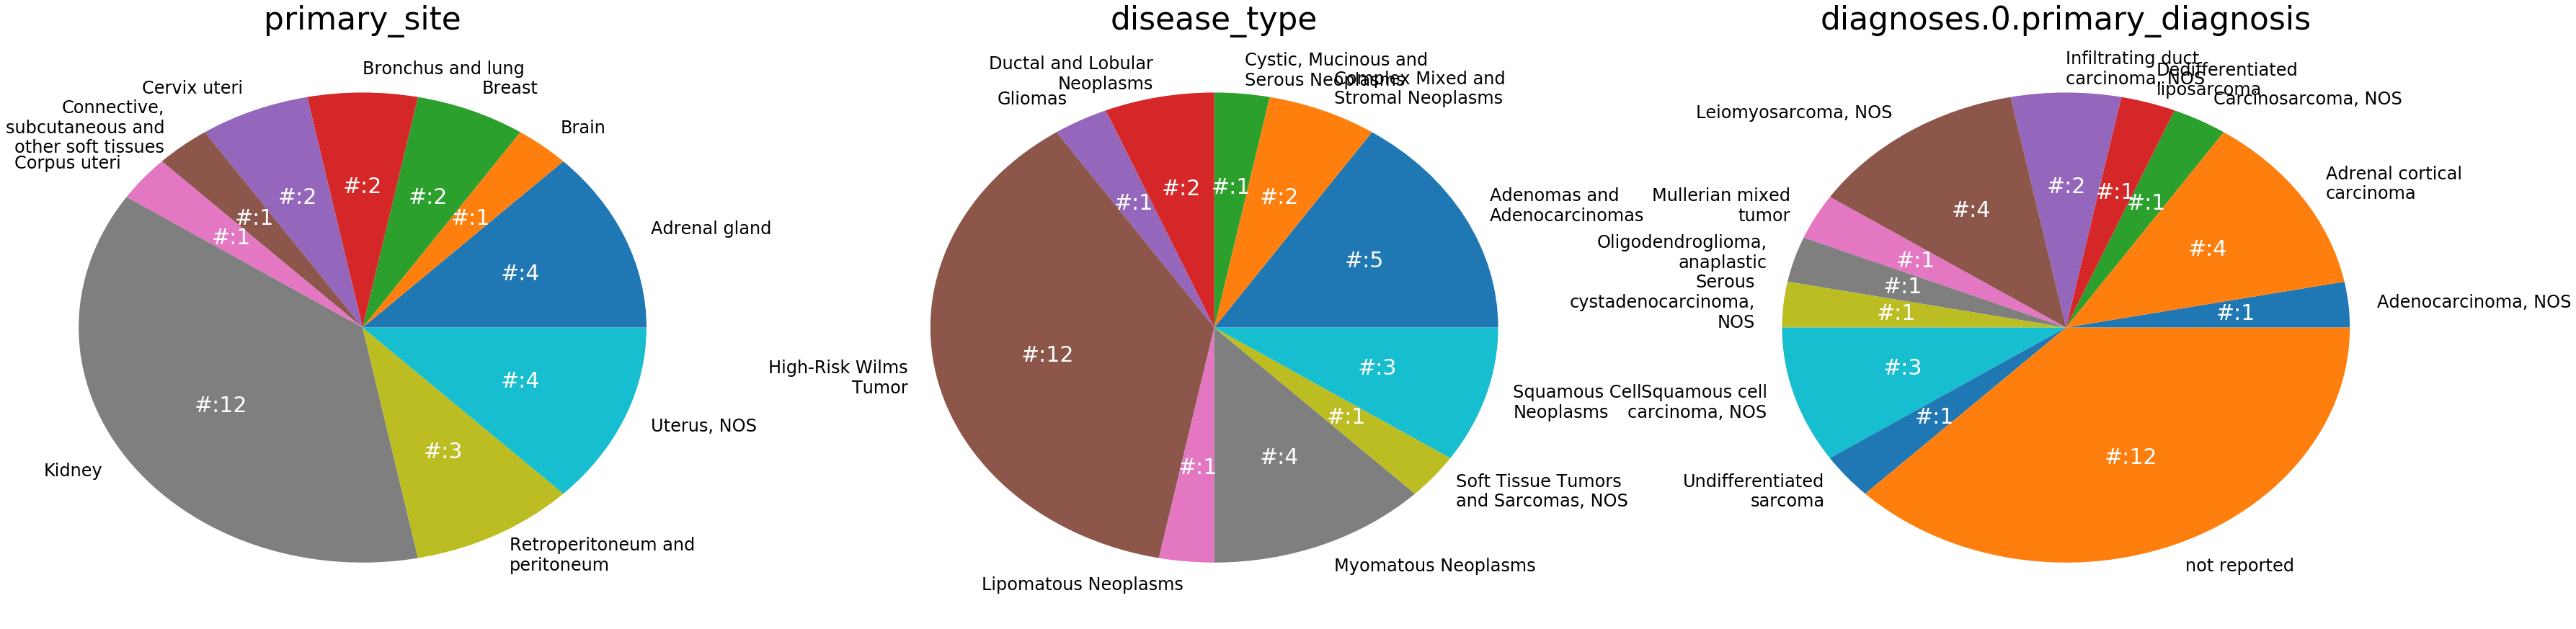

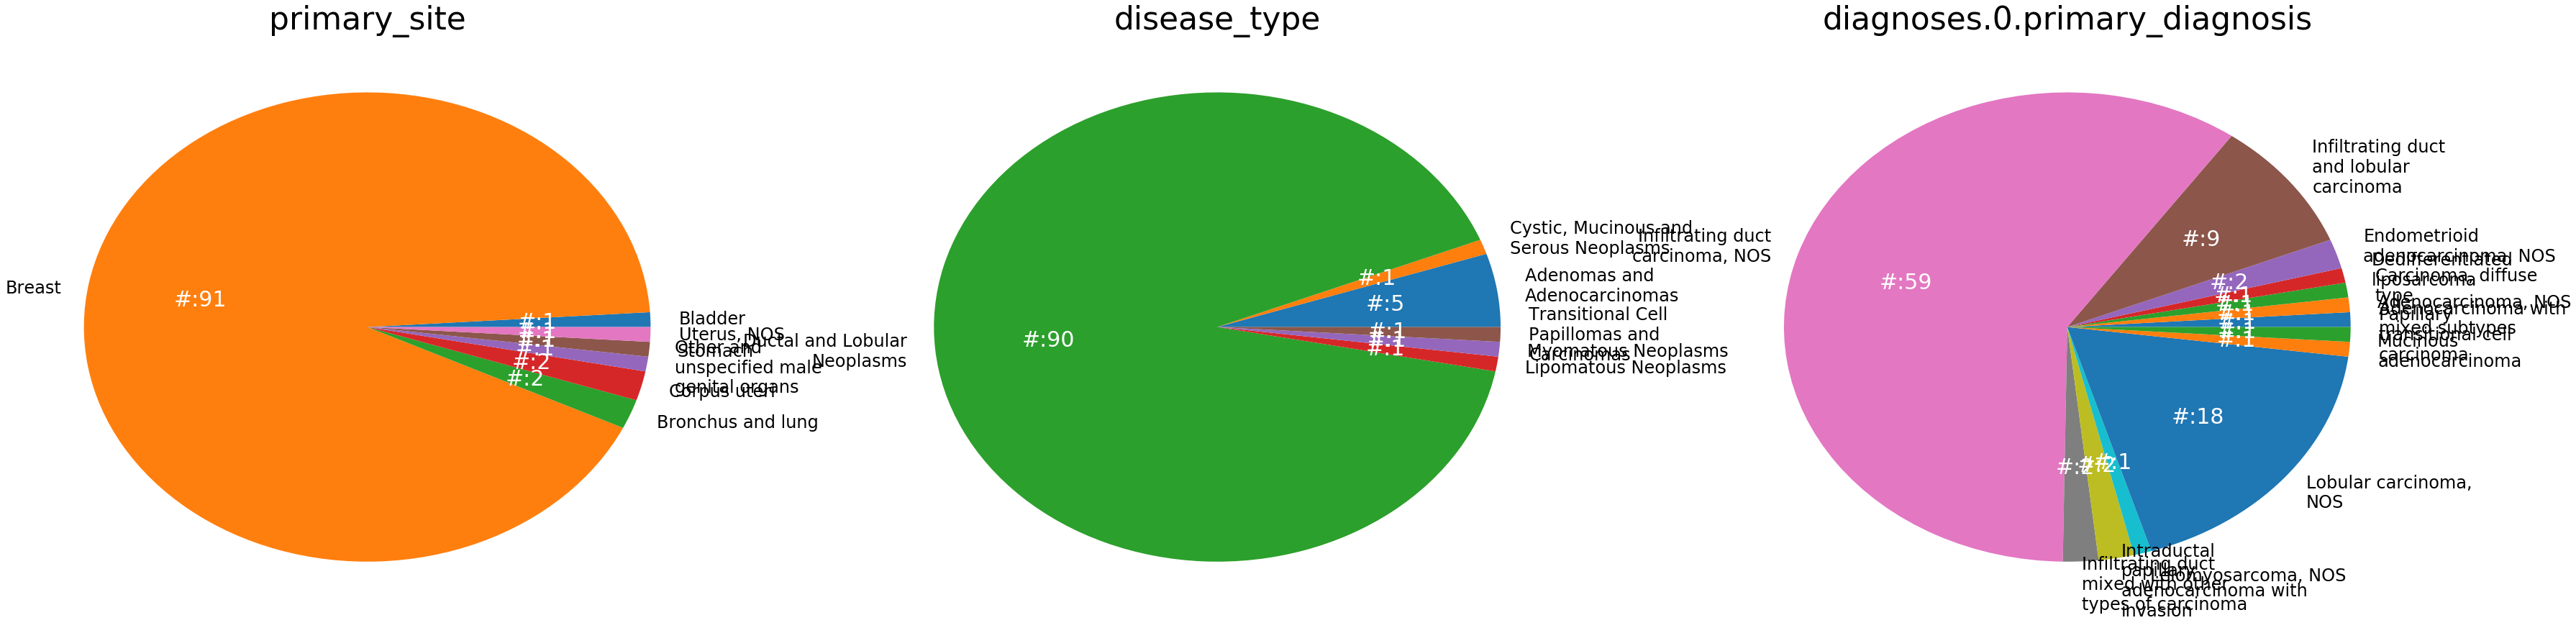

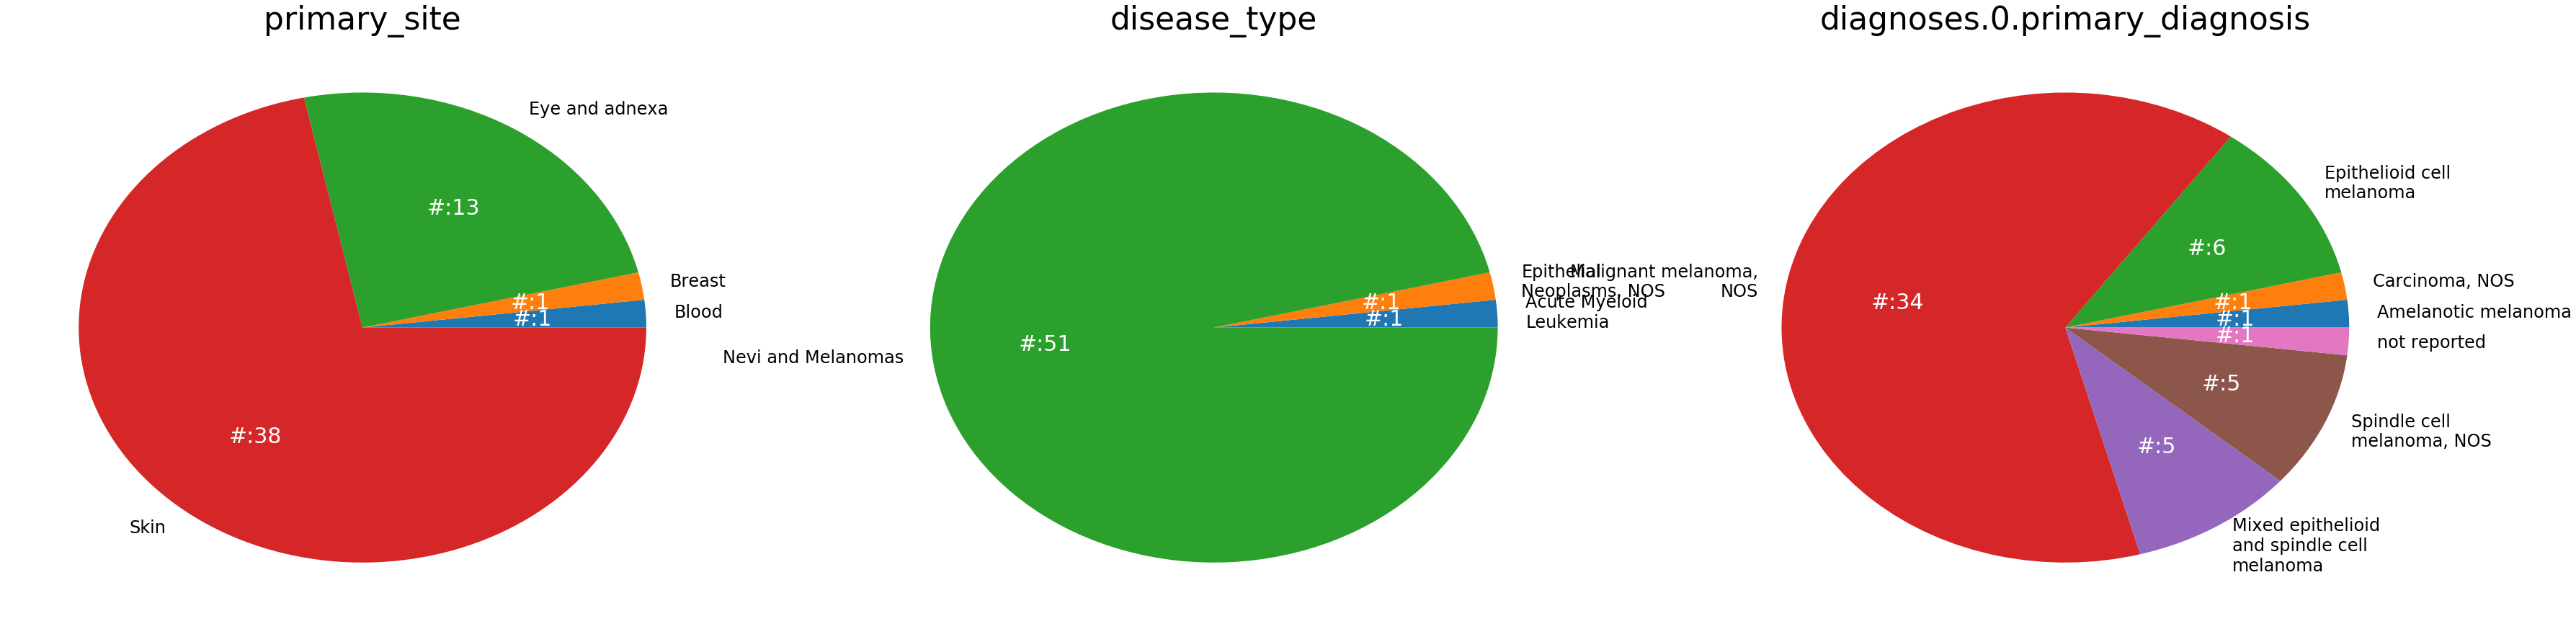

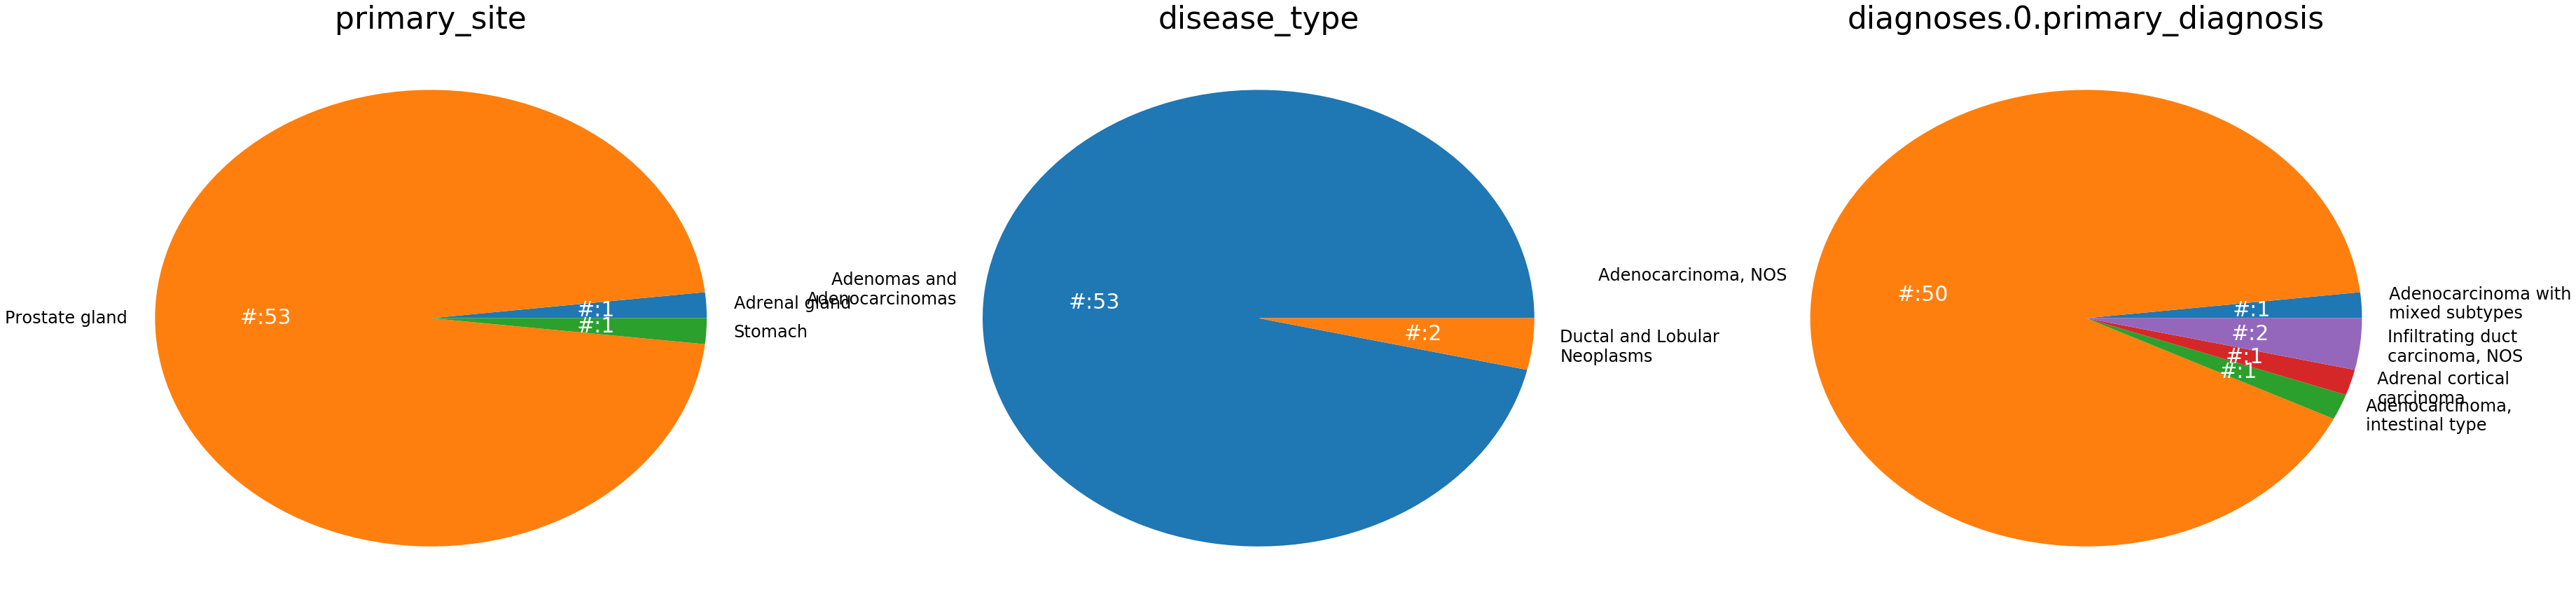

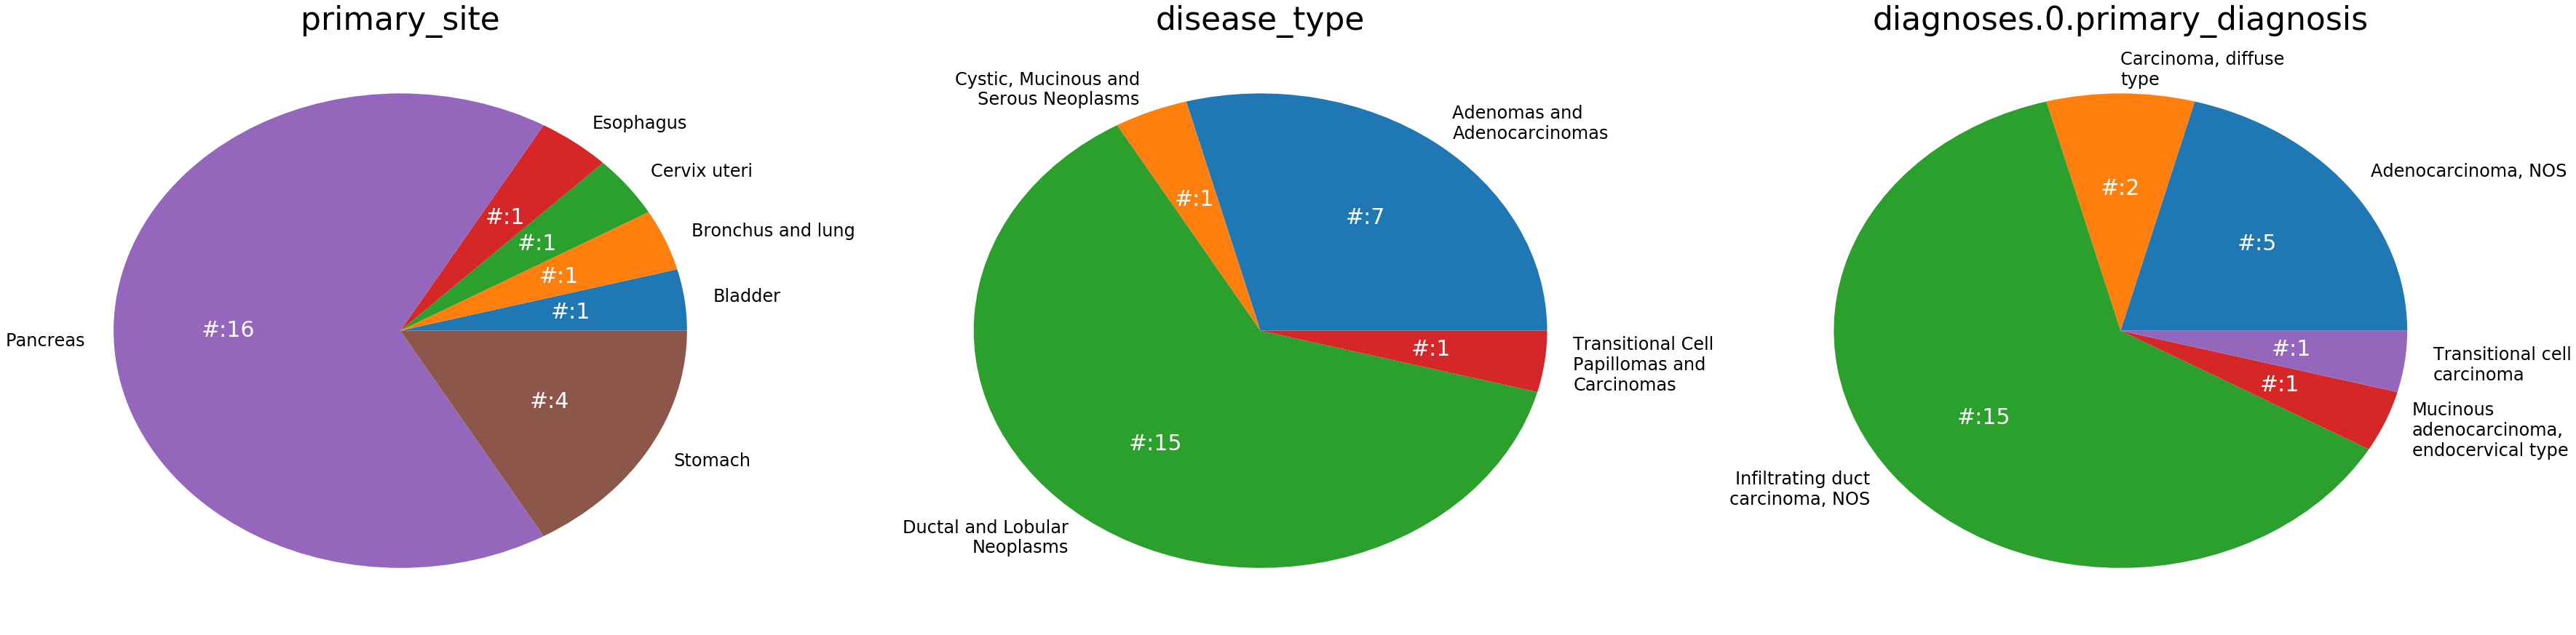

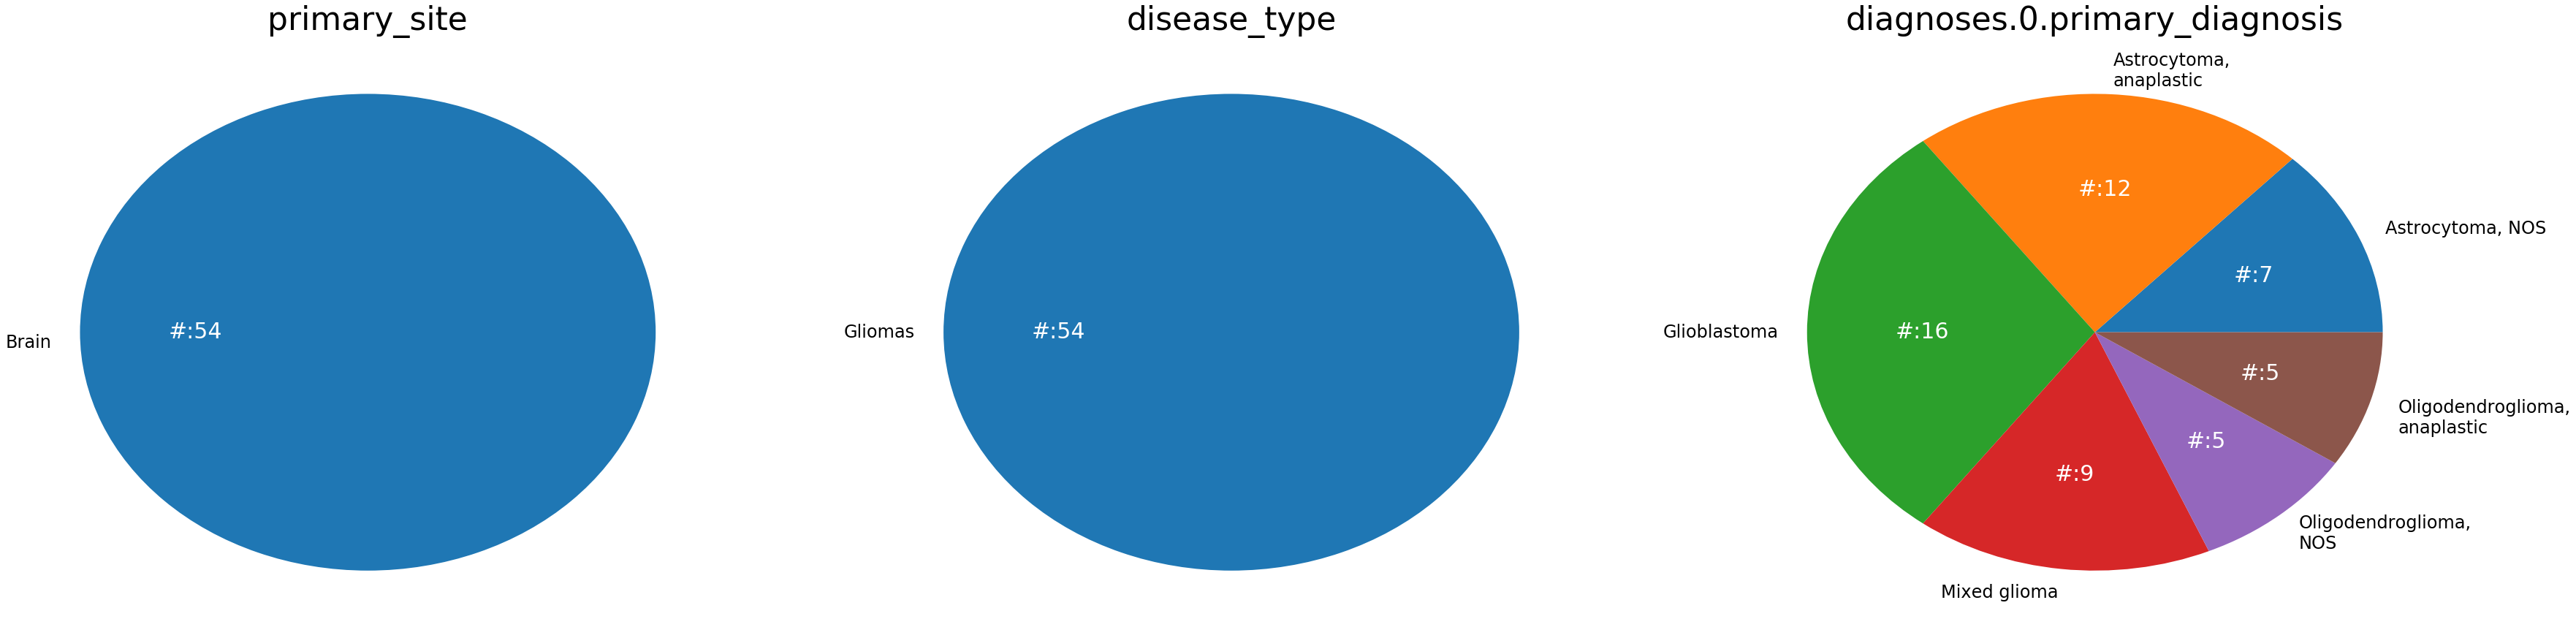

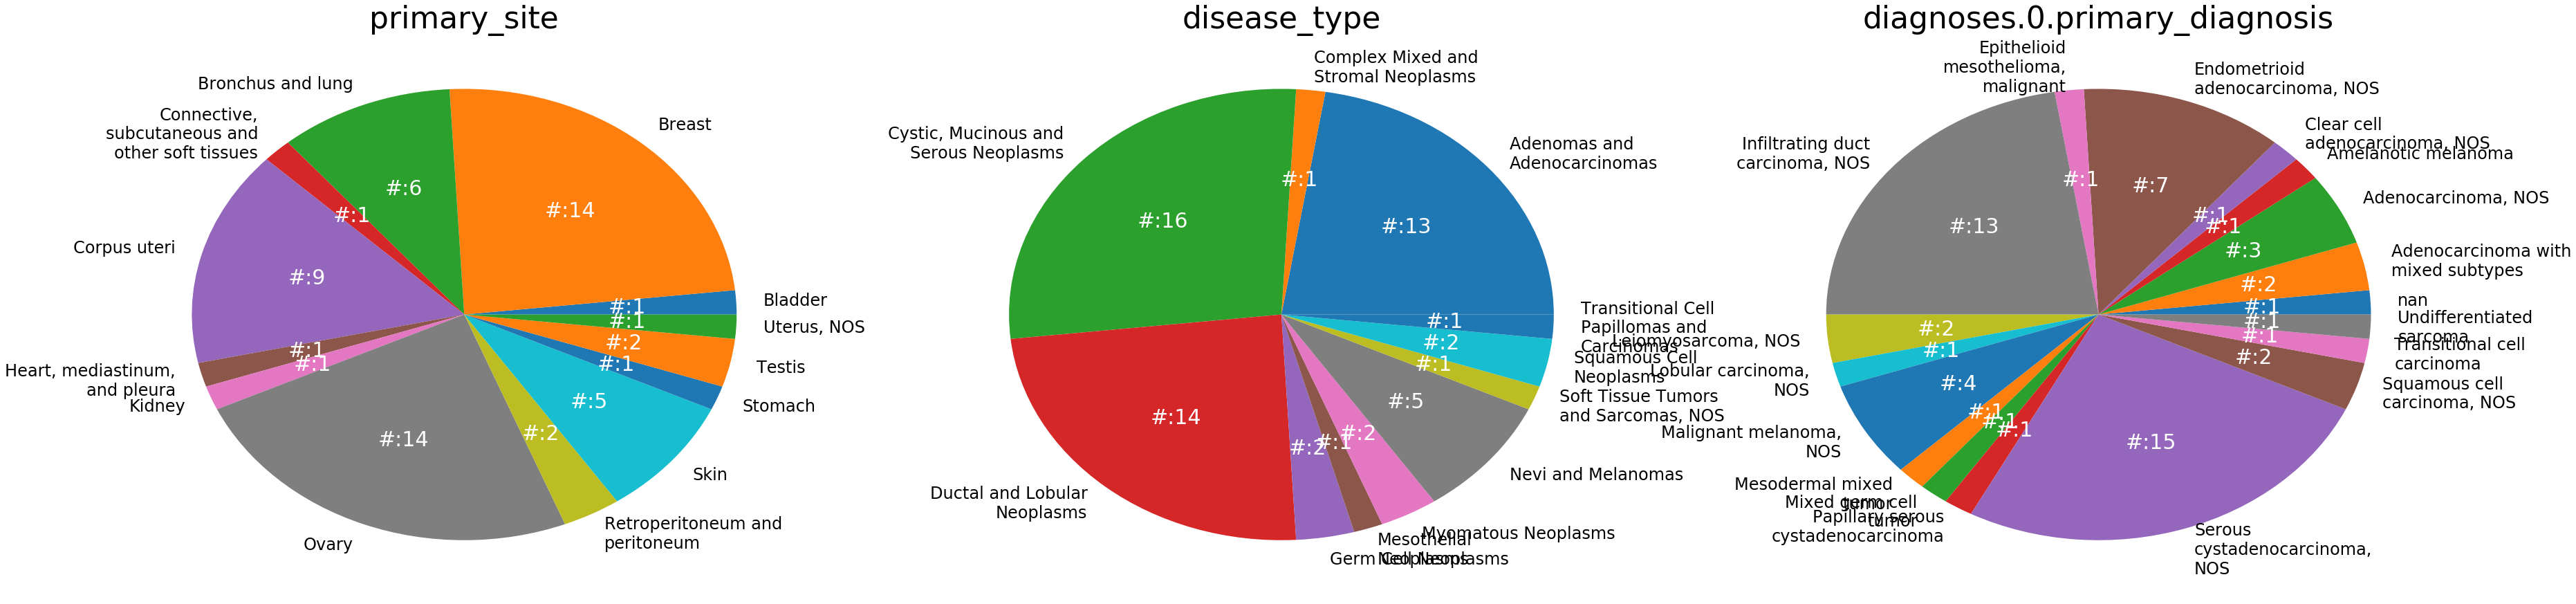

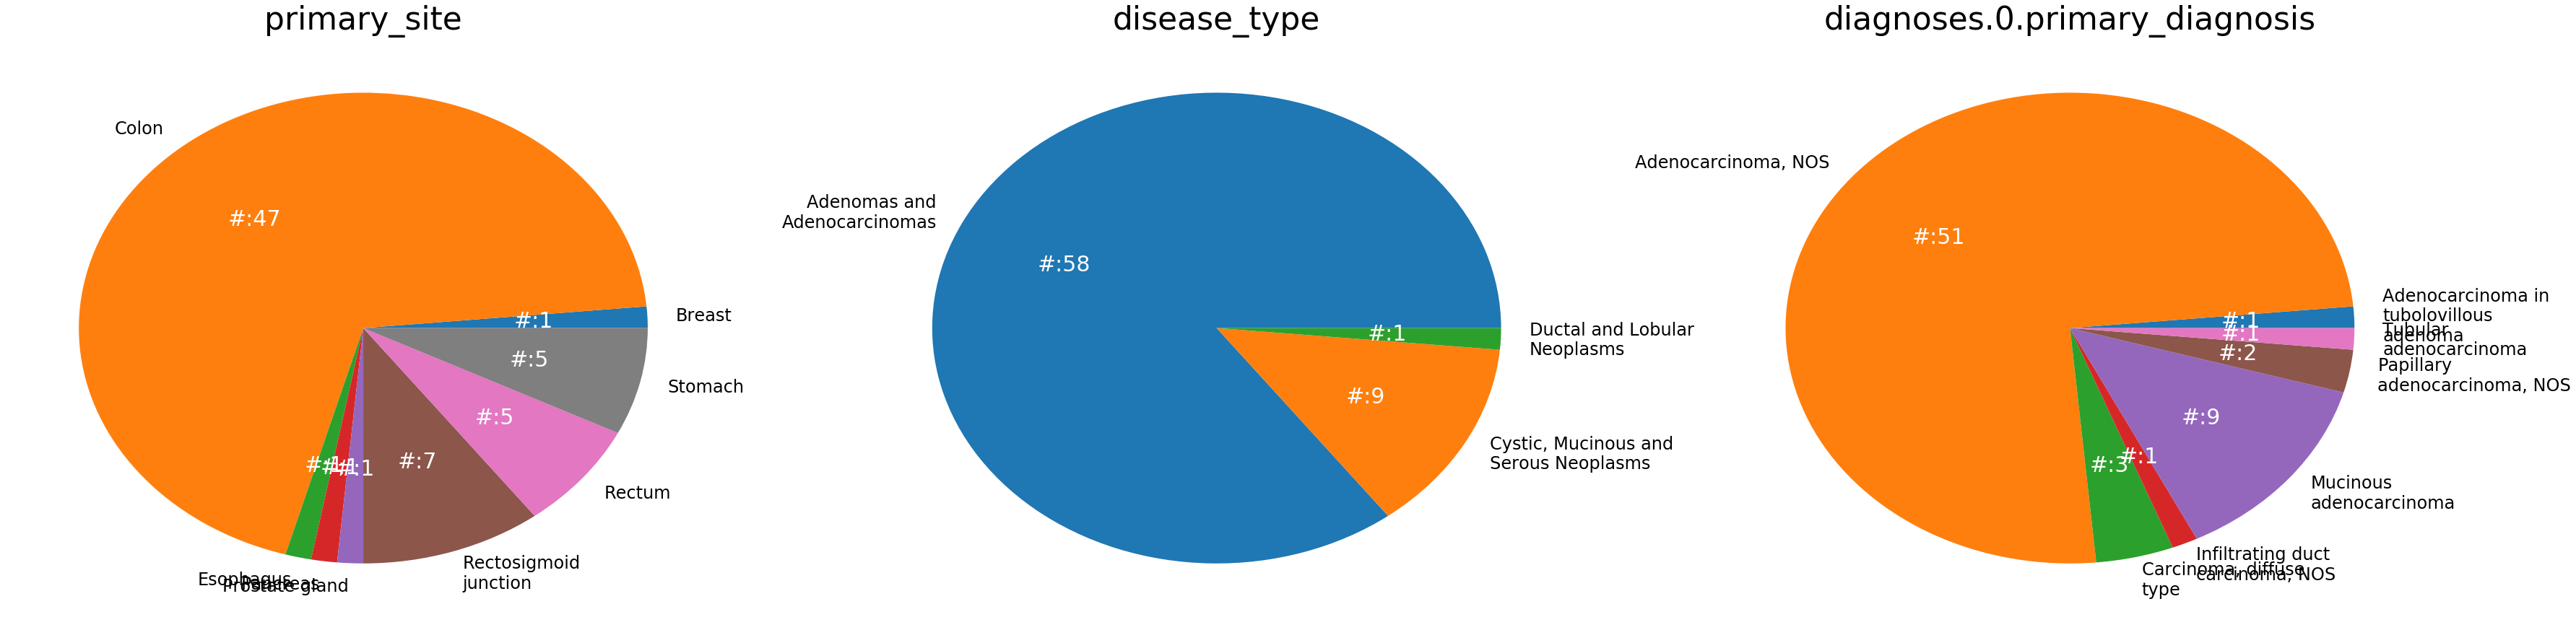

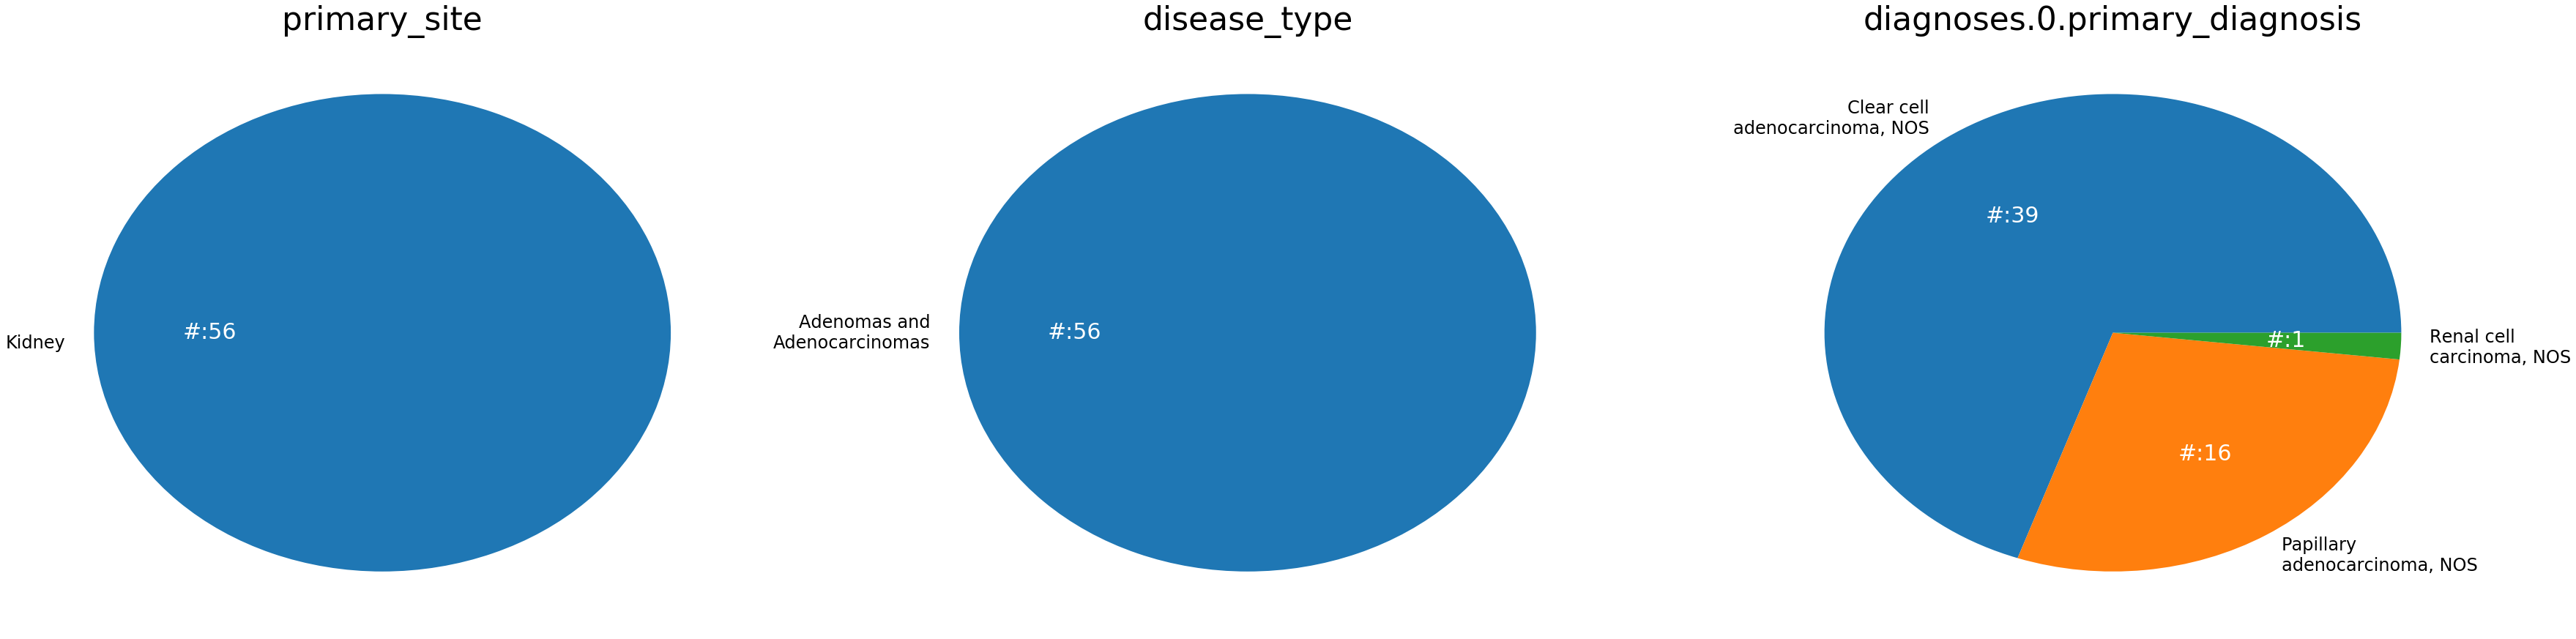

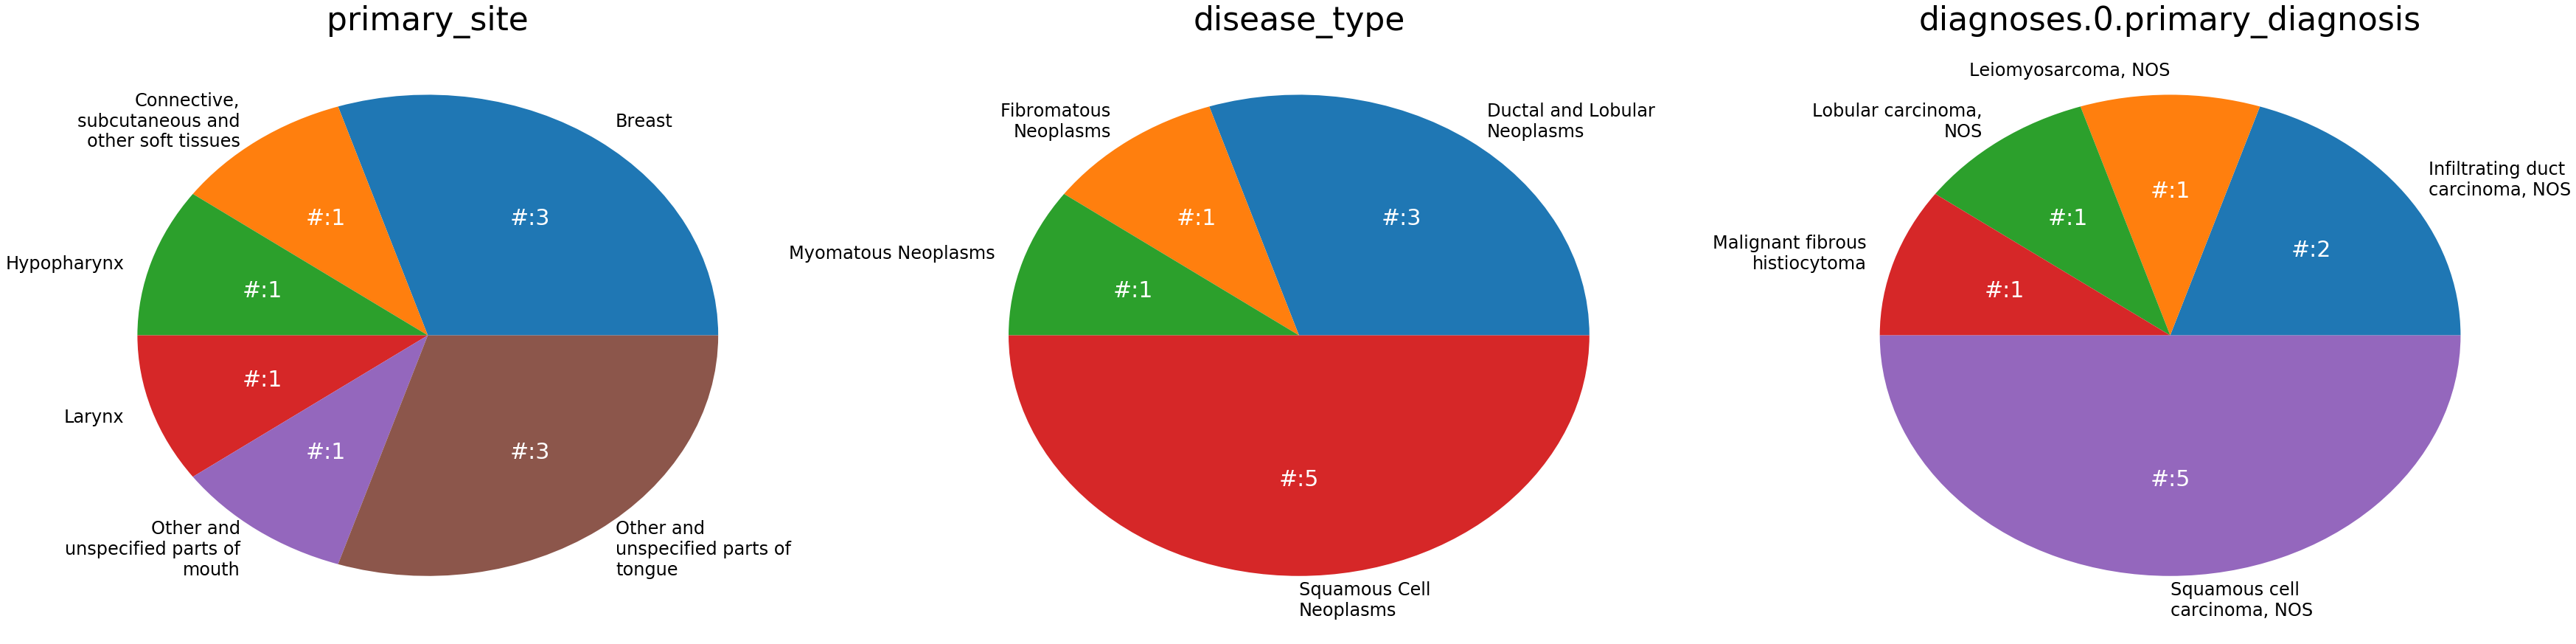

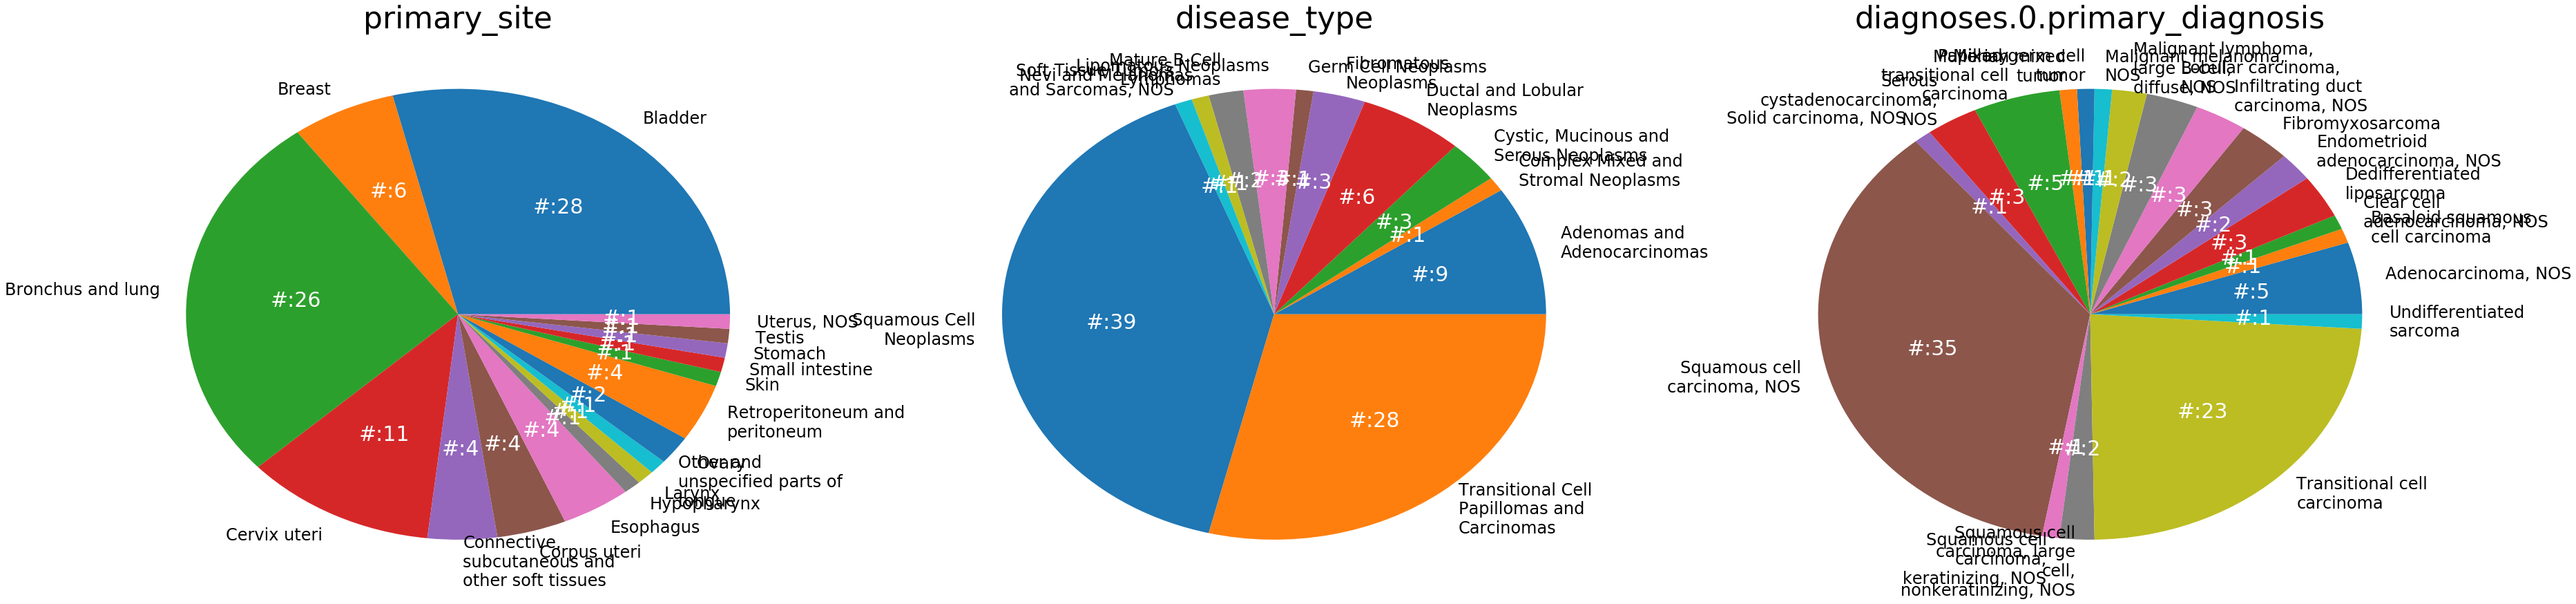

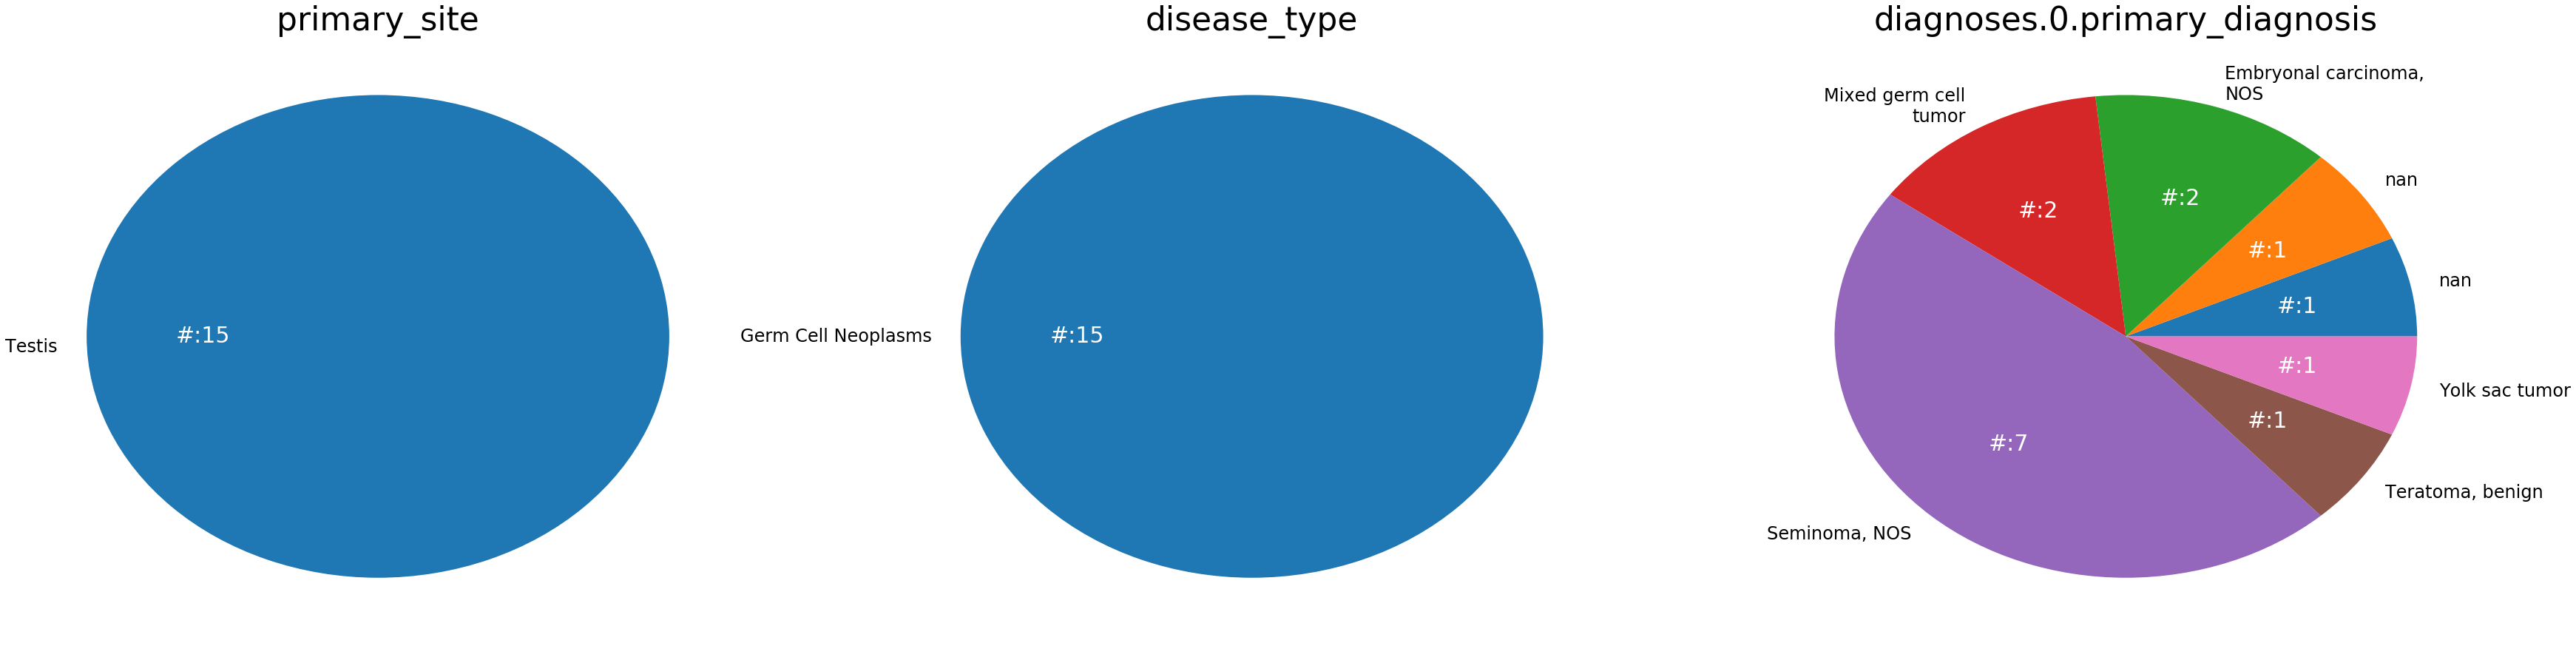

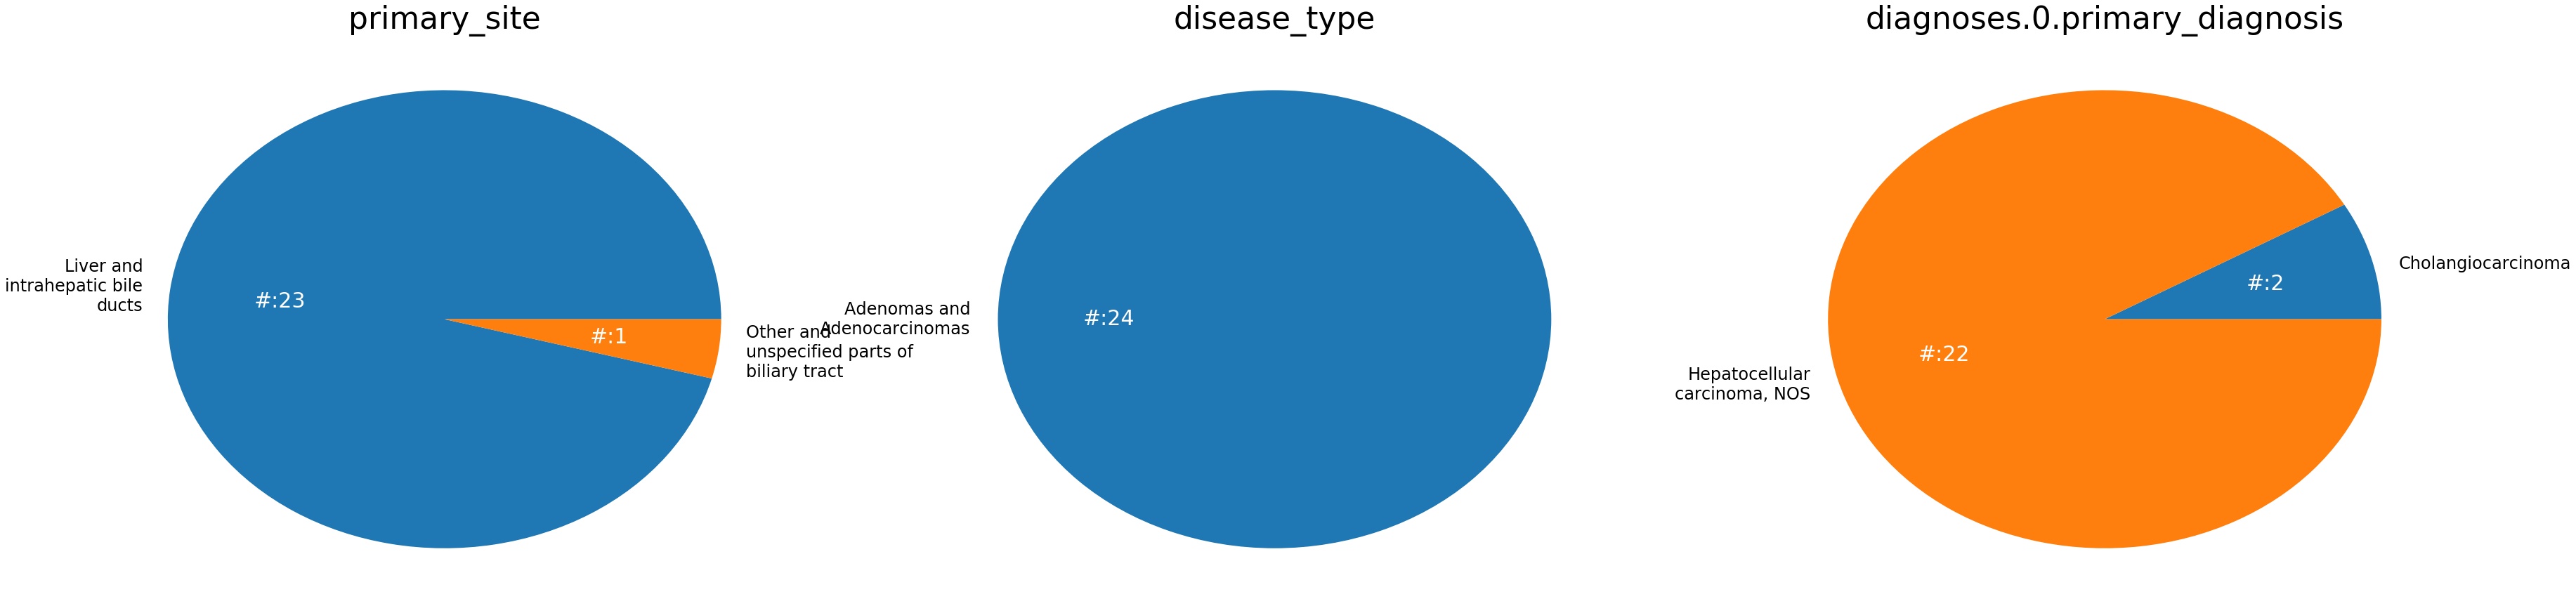

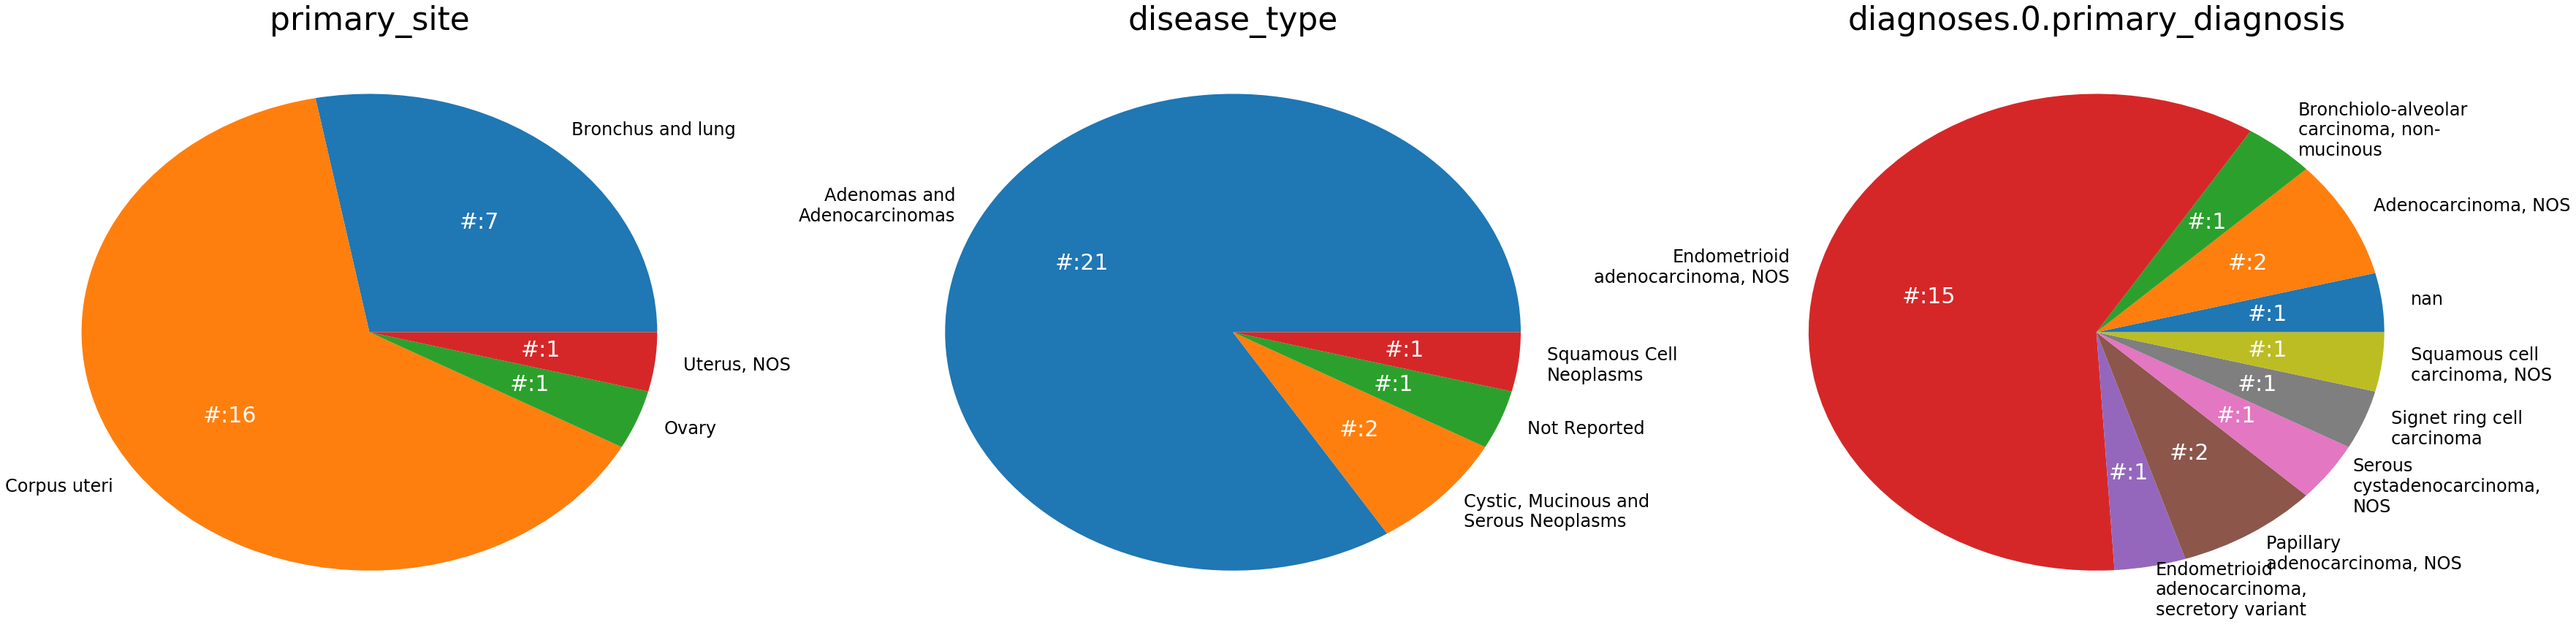

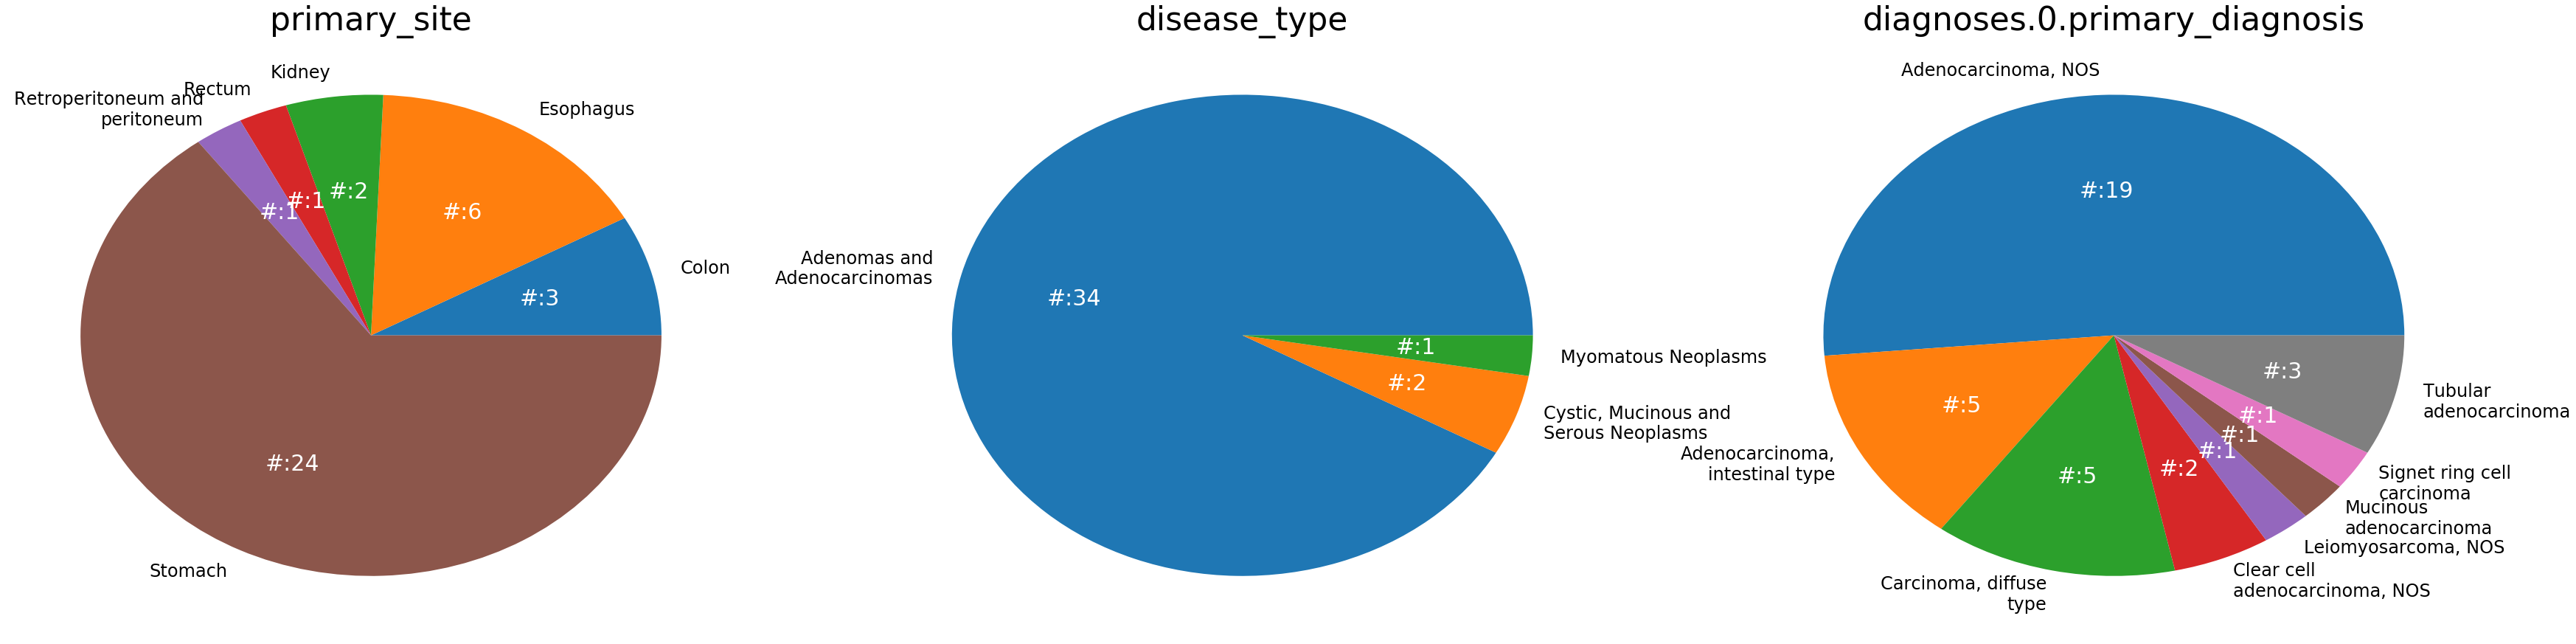

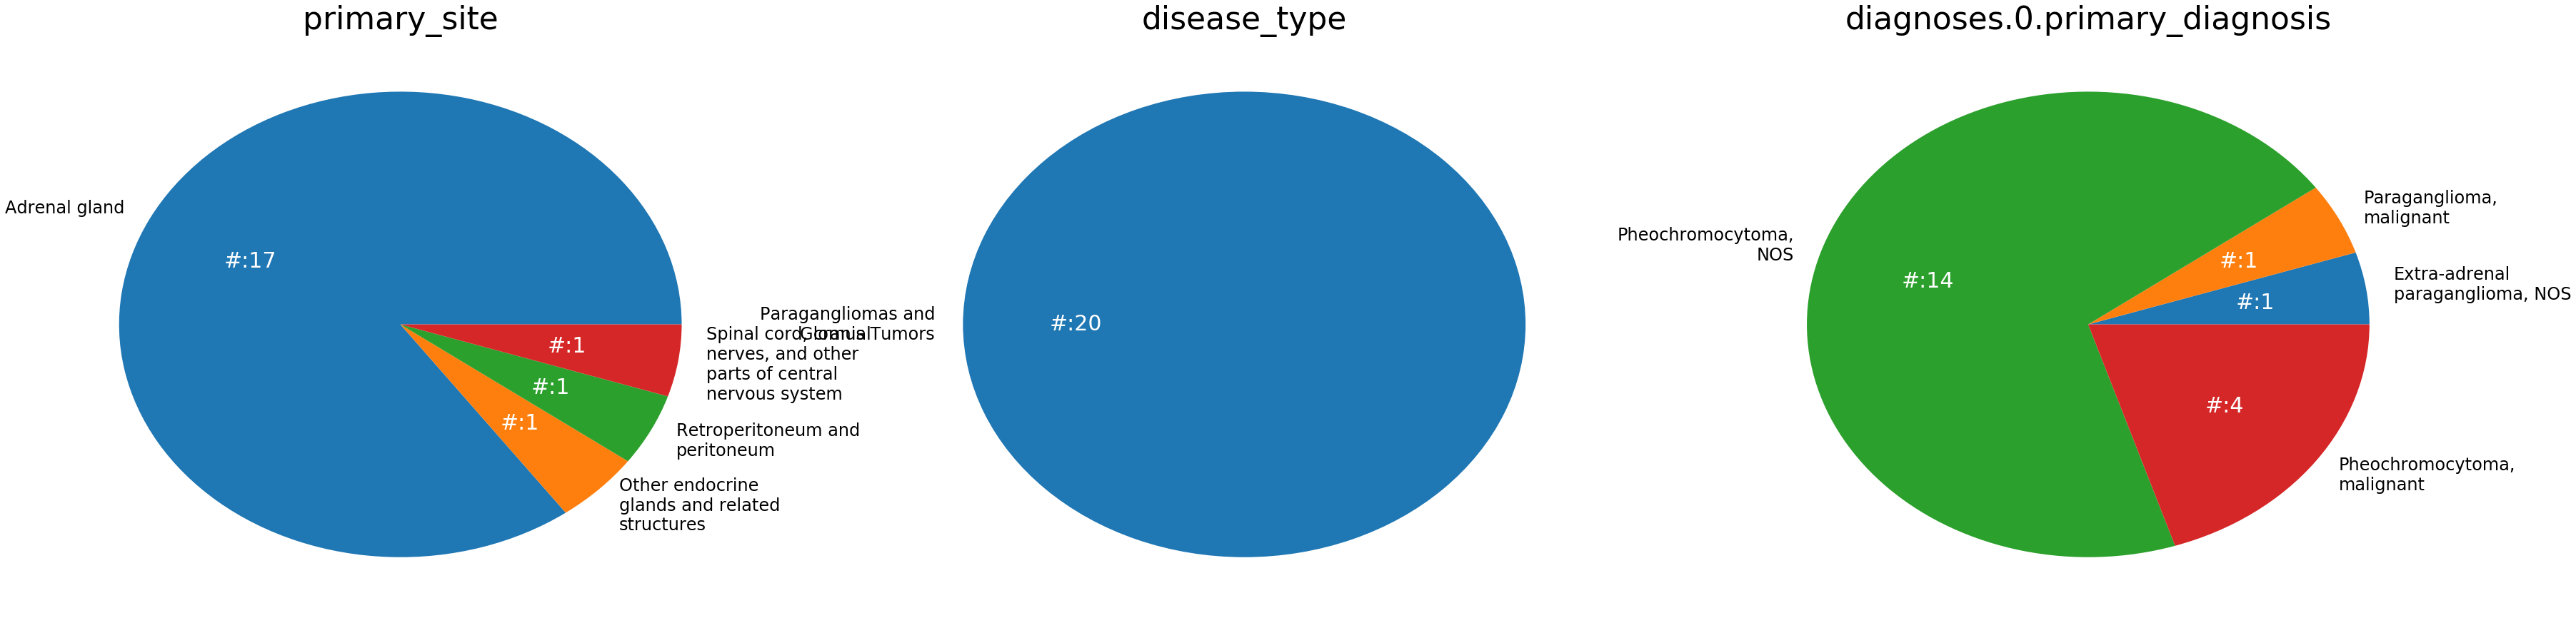

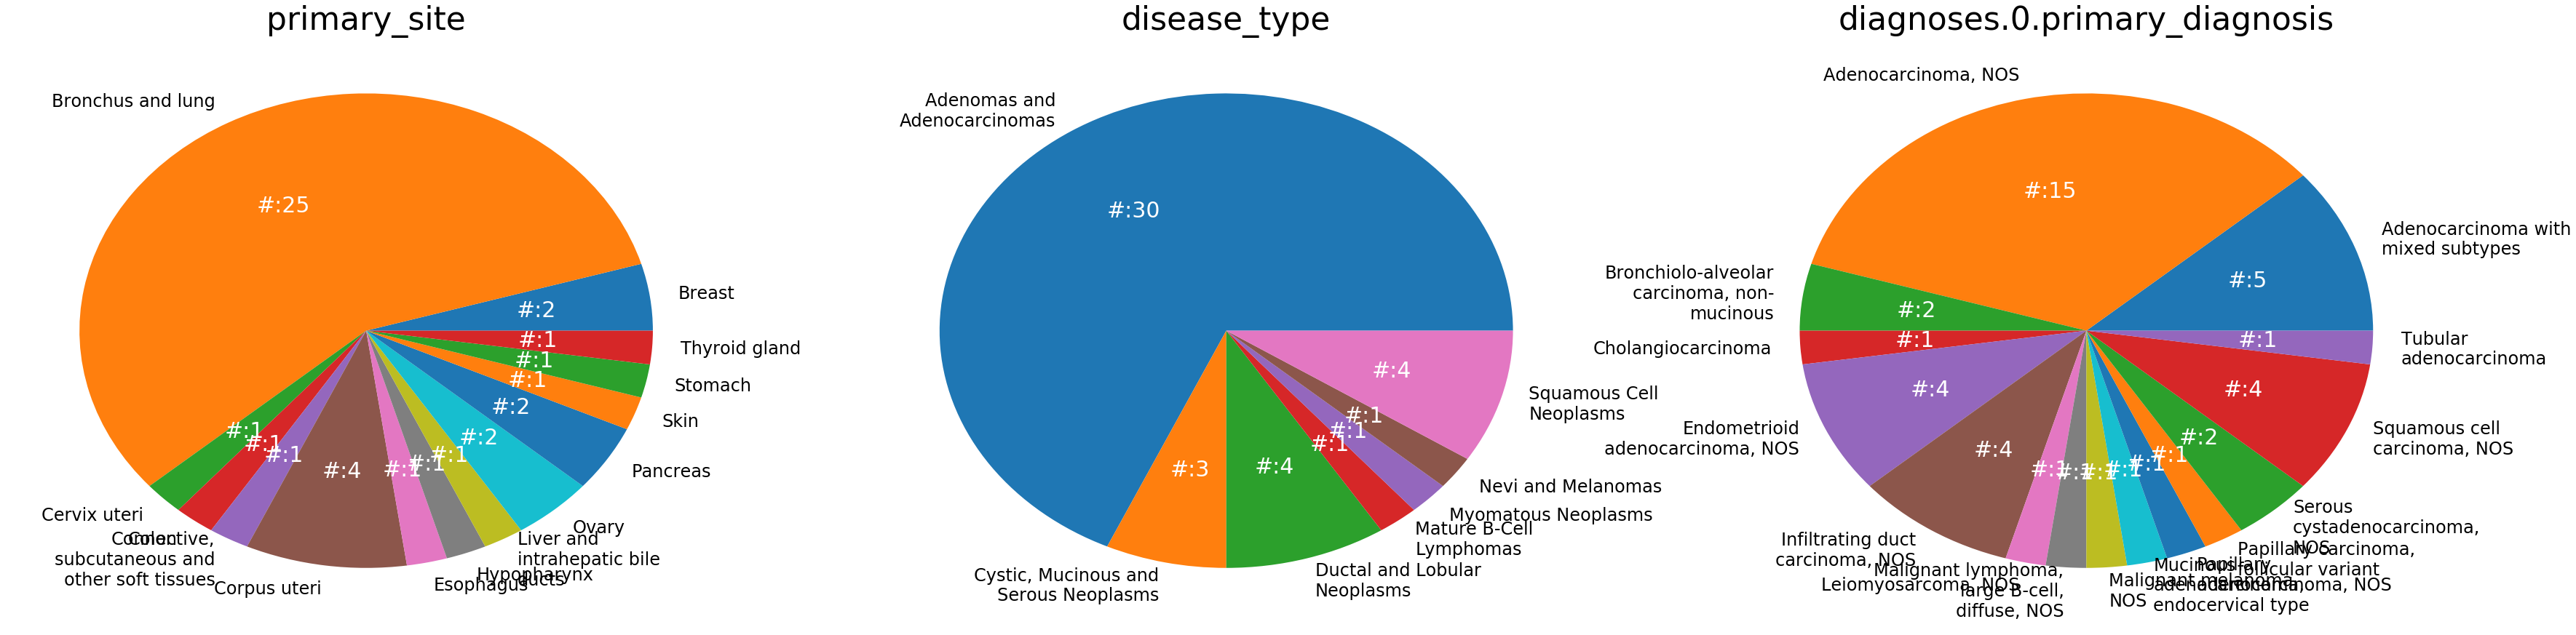

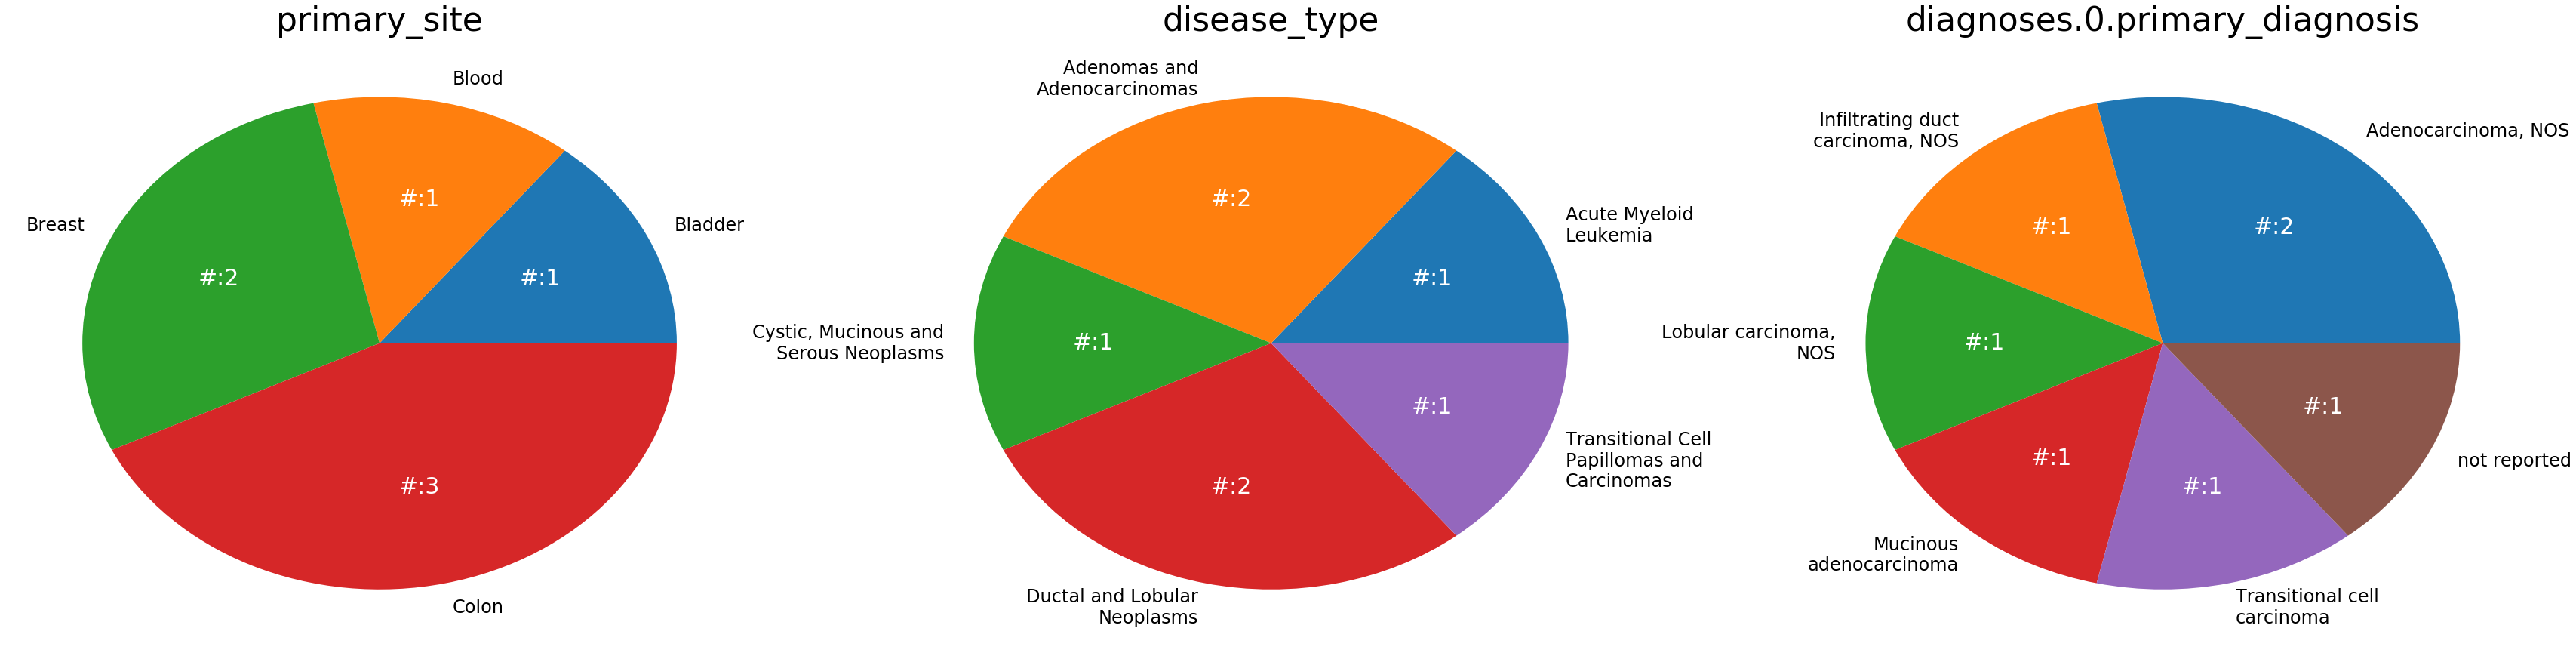

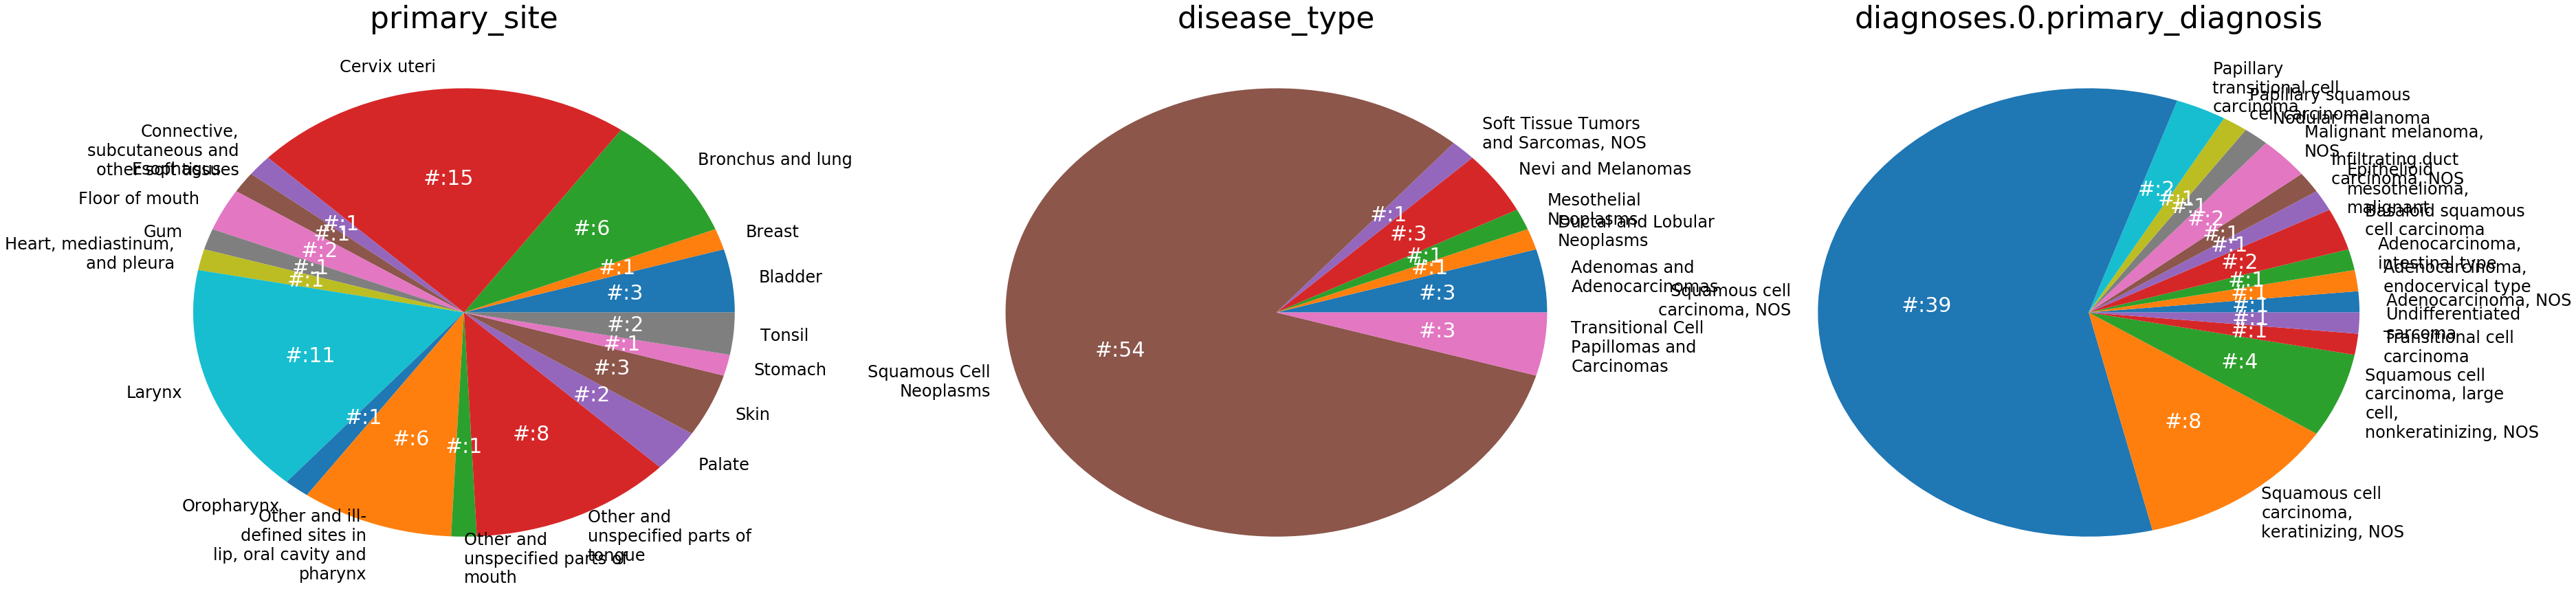

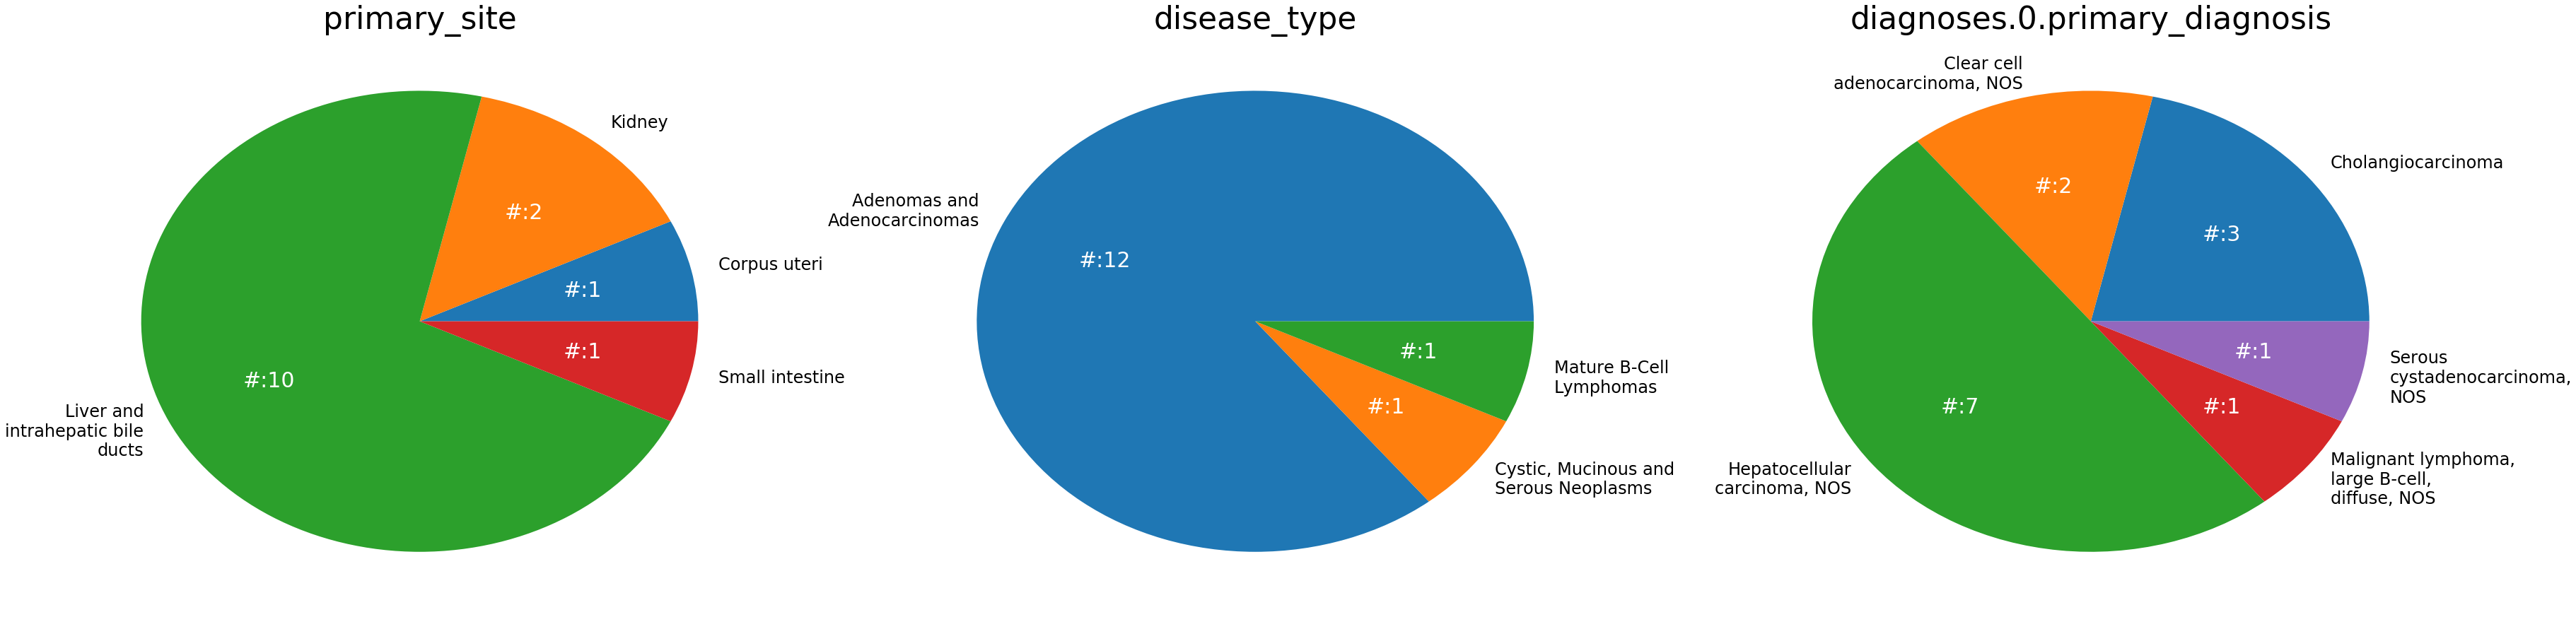

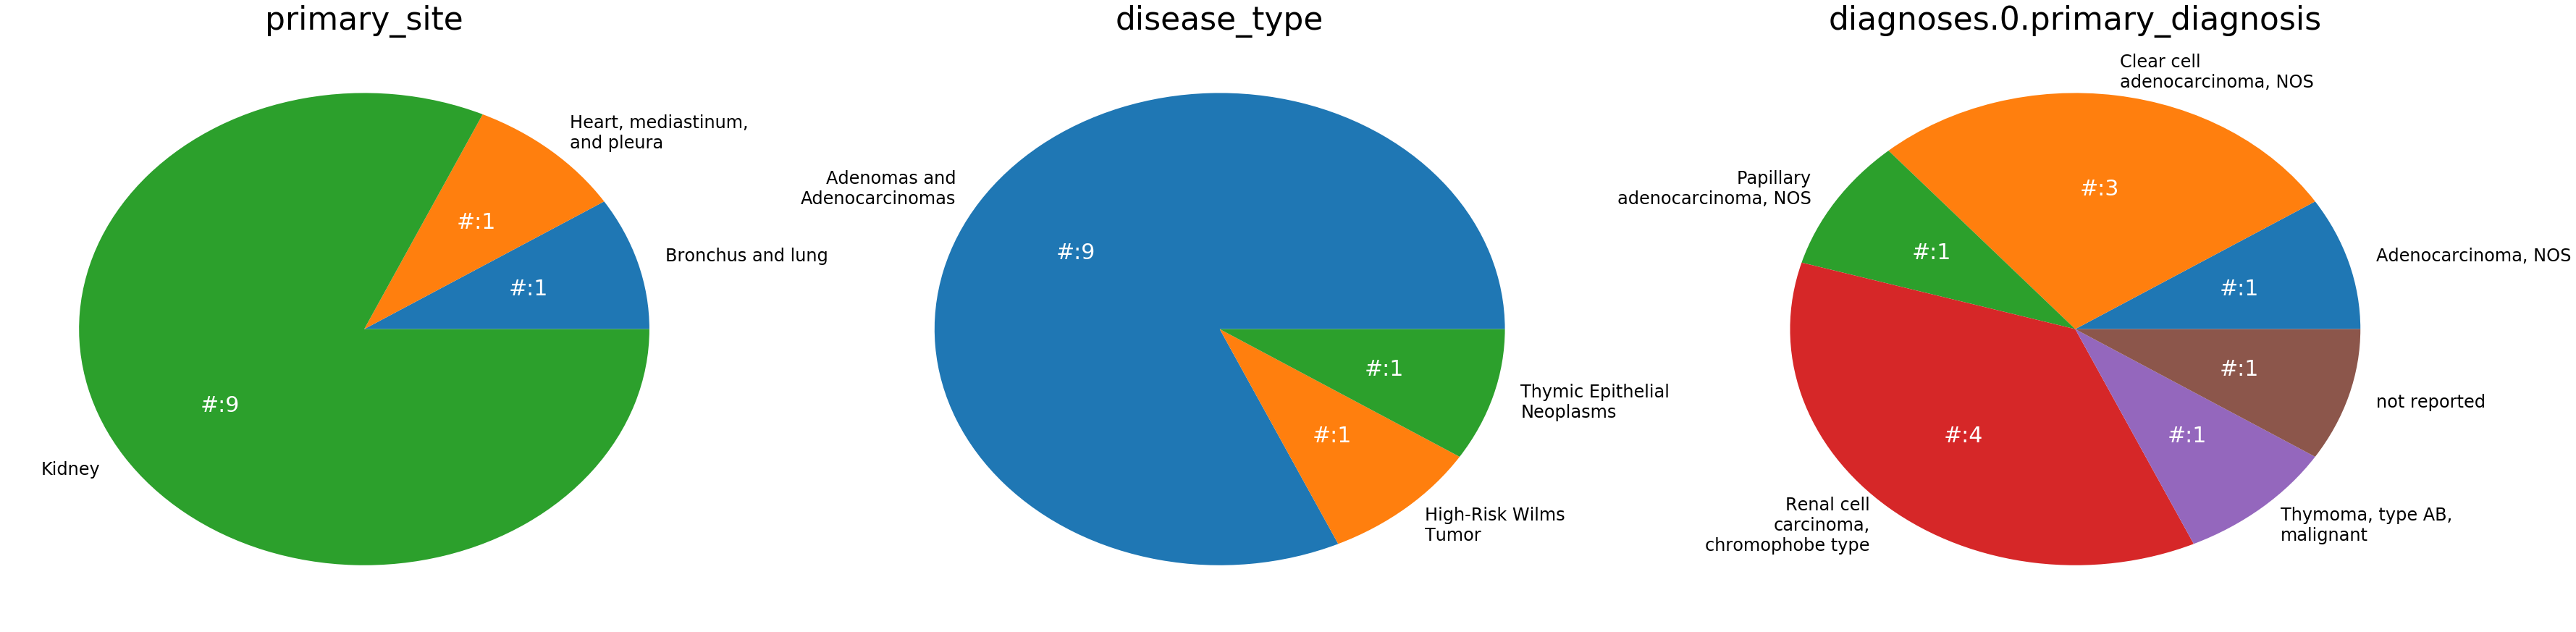

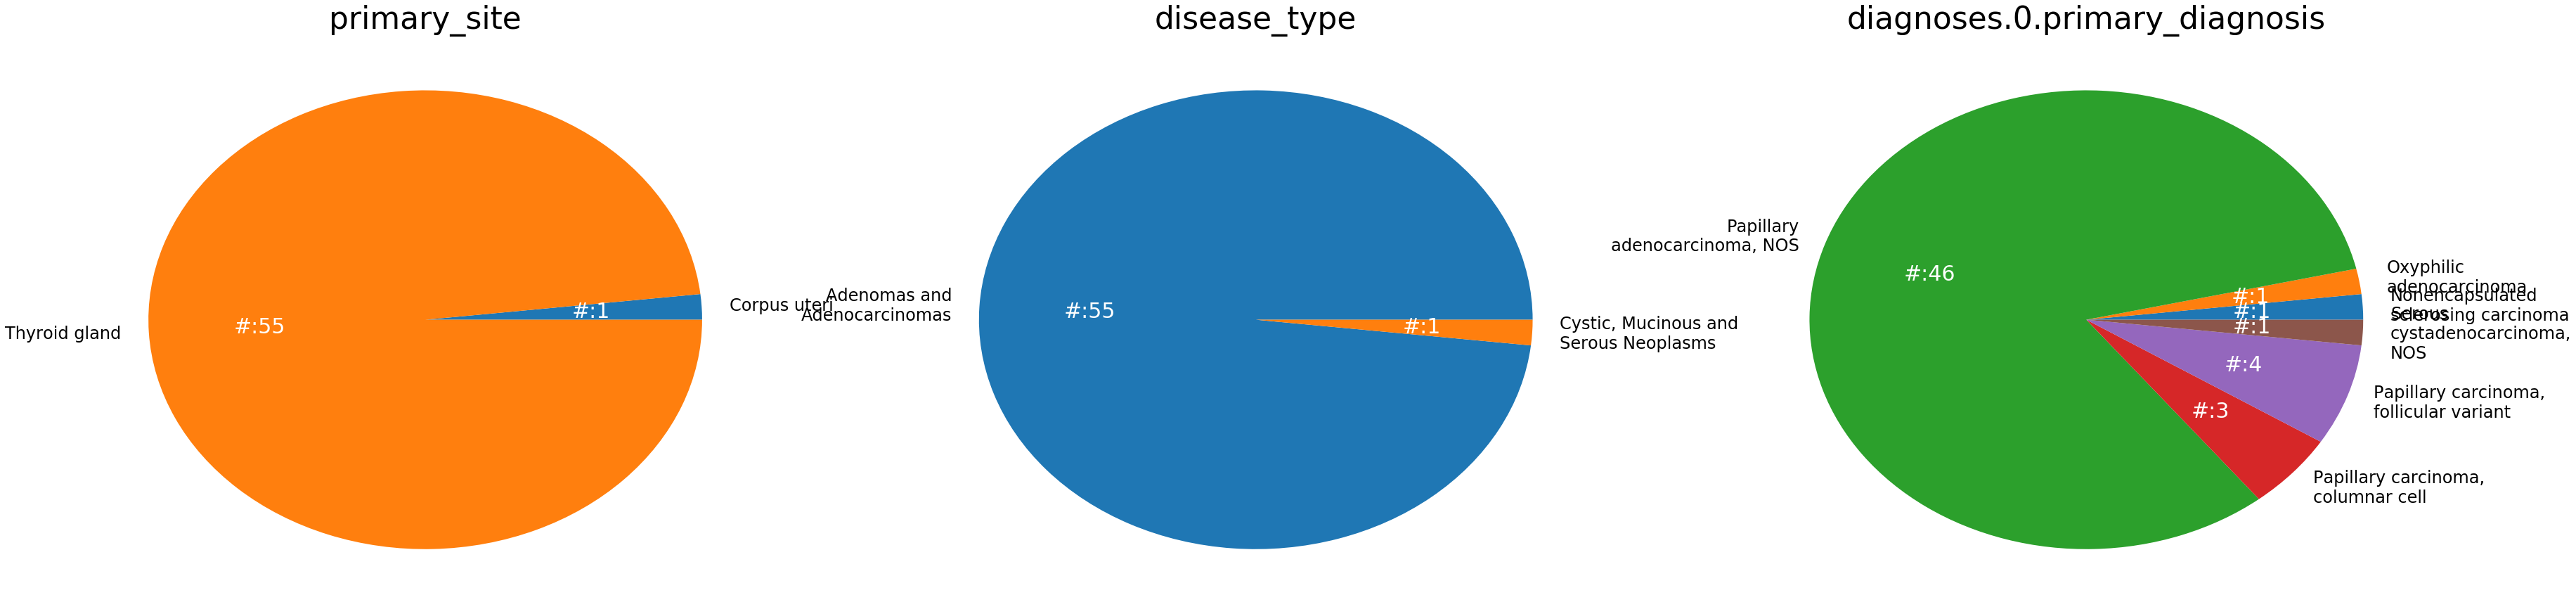

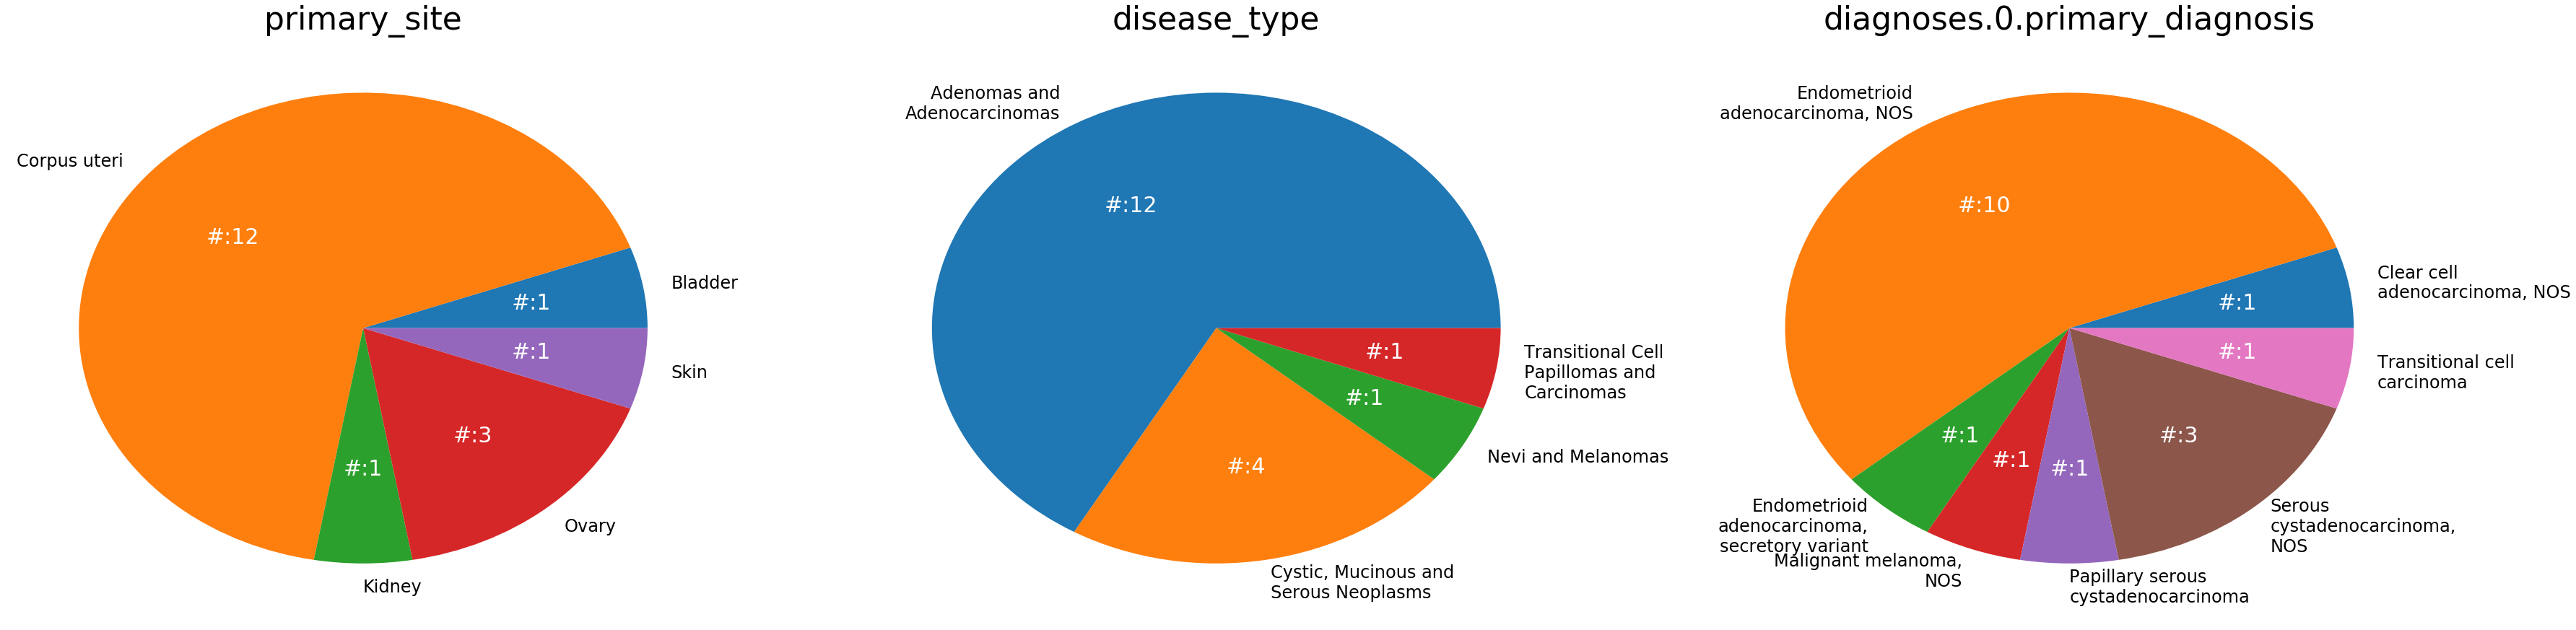

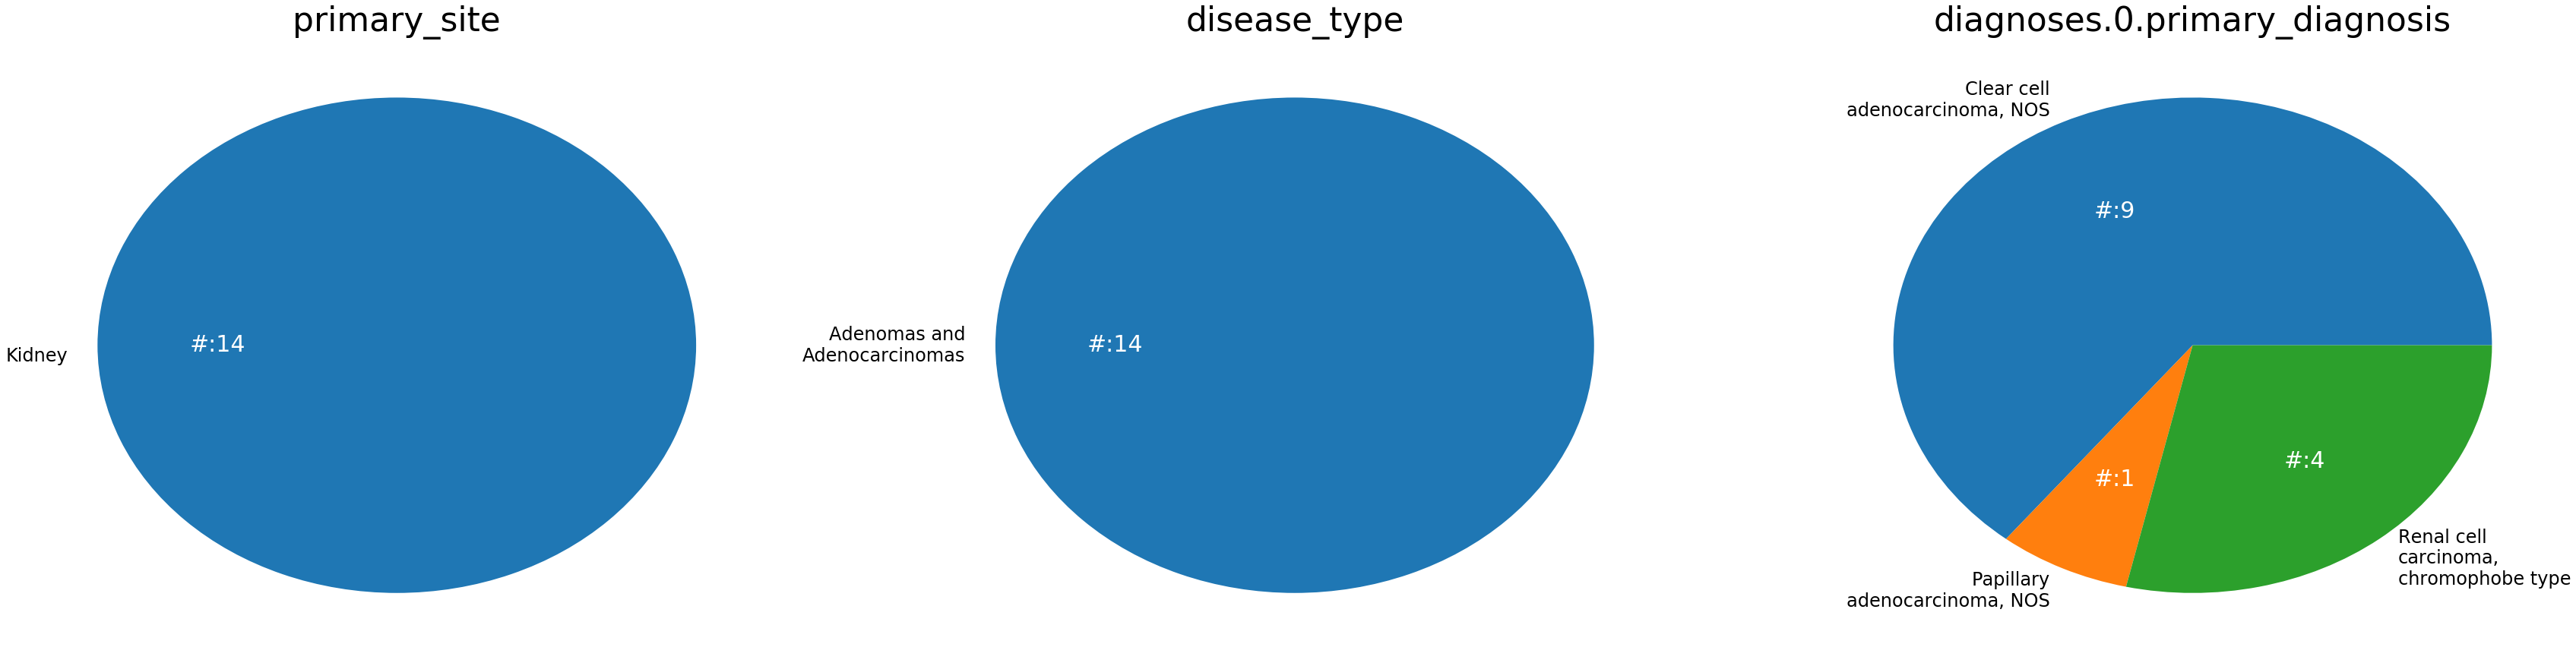

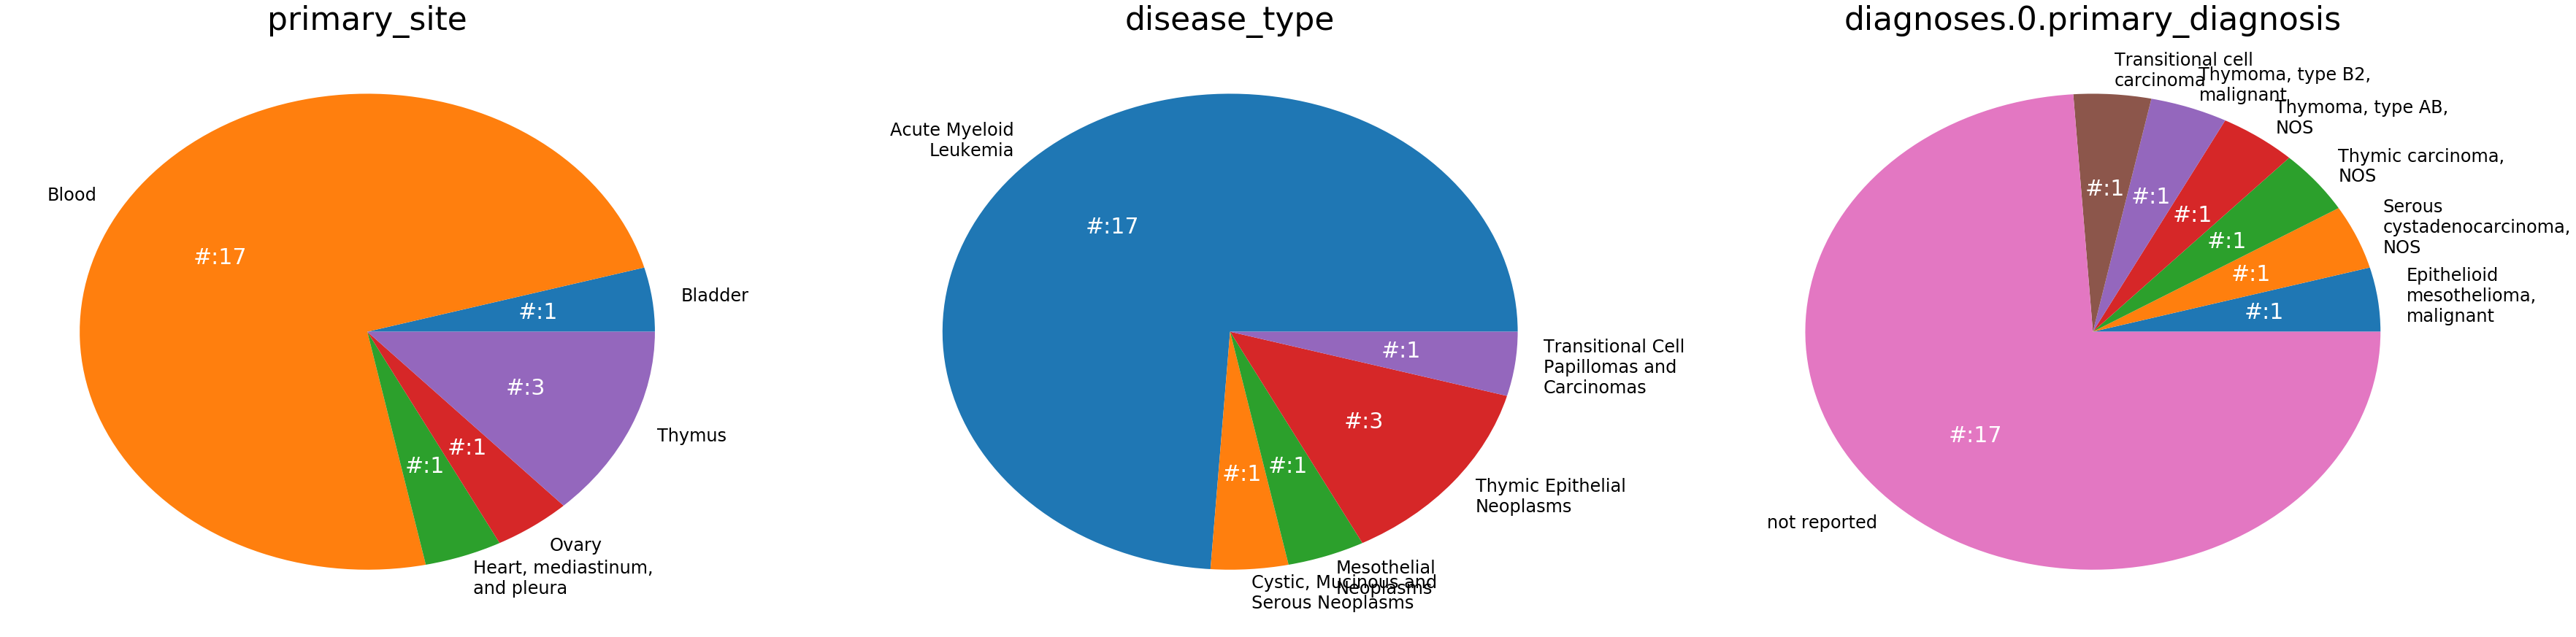

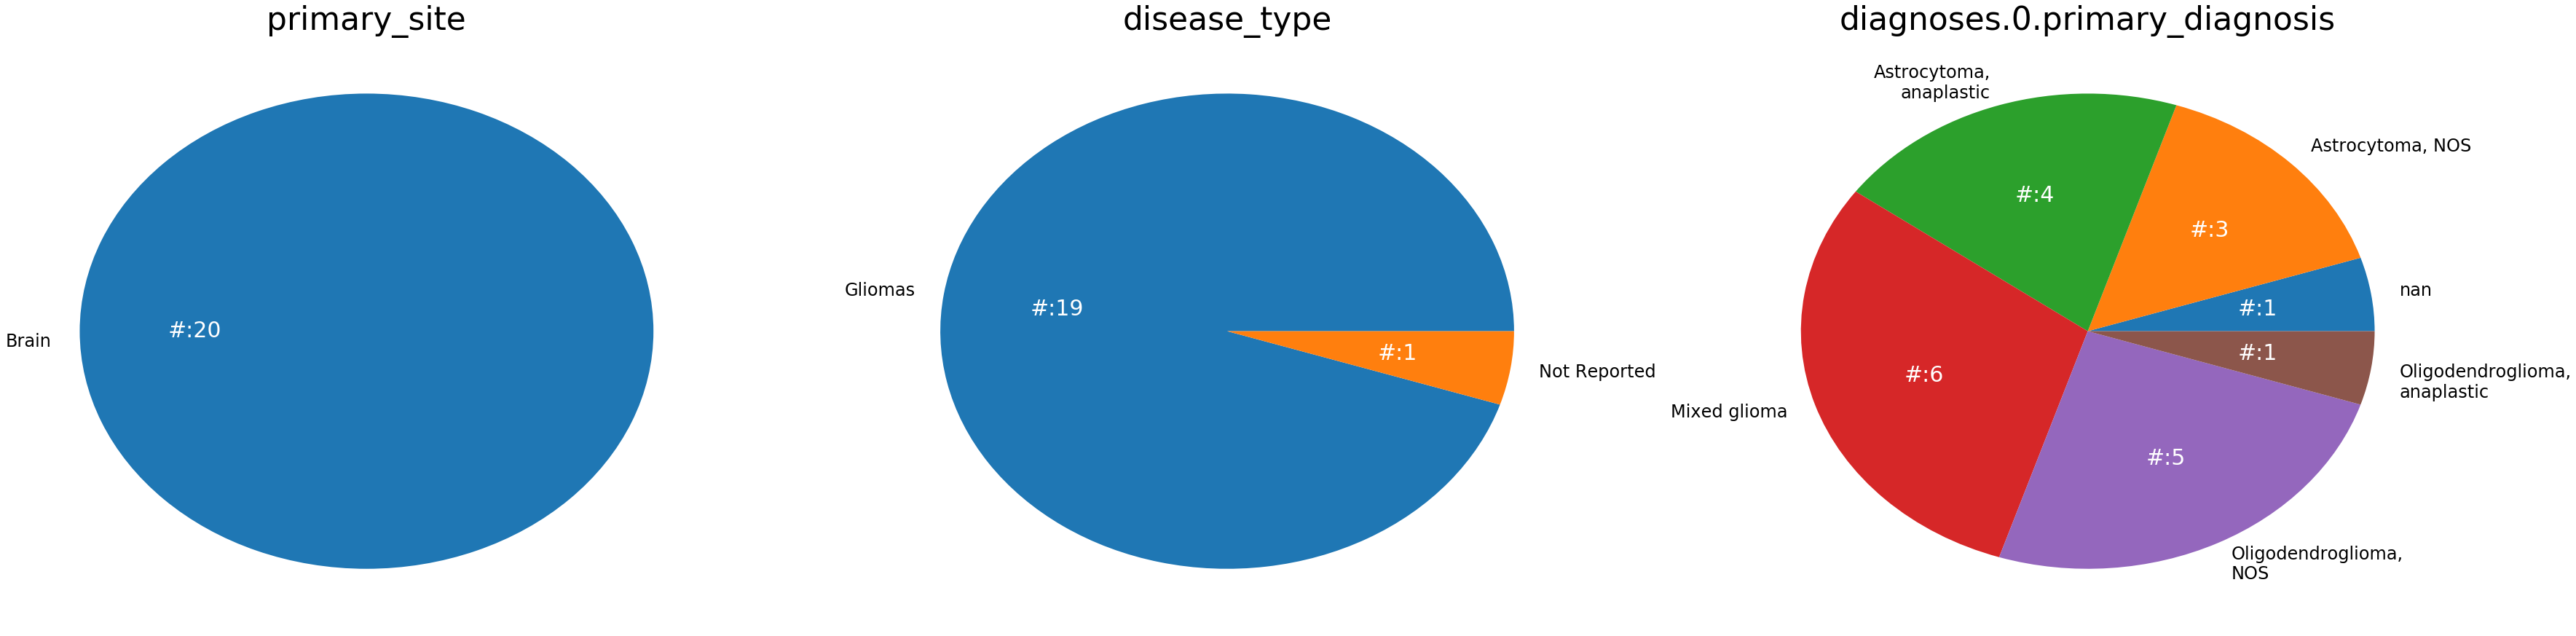

In [9]:
level = 0
for c in cluster:
    datatotest = queryFiles([f[0][:]+".FPKM.txt.gz" for f in cluster[c]])
    makePie(datatotest, level, c, ['primary_site','disease_type','diagnoses.0.primary_diagnosis'])

# Benchmark

In [ ]:
true_labels = []
predicted_labels = []
for c in cluster:
    for sample in cluster[c]:
        true_labels.append(queryFile(sample[0]+'.FPKM.txt.gz')['primary_site'])
        predicted_labels.append(c)

quering...007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz
quering...ced1ce50-d6eb-4e46-9ae7-868cebded849.FPKM.txt.gz
quering...0f0b9f59-eeab-47a2-9aa5-642d06963fe4.FPKM.txt.gz
quering...969472c4-f5e0-4e37-8d5c-22ef54e674f5.FPKM.txt.gz
quering...a16e680a-52ef-4d61-a2e7-d6dcd7da7616.FPKM.txt.gz
quering...3a1f9f5b-2c01-4023-94e9-9a34f9ae8e6f.FPKM.txt.gz
quering...b84940eb-7f19-44a7-93e8-8fdddc668ea3.FPKM.txt.gz
quering...6cfe4458-1396-4646-bce7-e2bfbcdb6b86.FPKM.txt.gz
quering...81df14d6-c7aa-44ca-a6b5-29373563afa7.FPKM.txt.gz
quering...823fe3f1-1e0f-4d35-8060-e54ba636992e.FPKM.txt.gz
quering...a31ae0ac-683a-4e75-9af7-03bae233d6f2.FPKM.txt.gz
quering...23e0ae85-b11a-4cf6-a78f-12d33af37783.FPKM.txt.gz
quering...459da4d7-7821-4275-a733-576e4504ce5f.FPKM.txt.gz
quering...686fb7ee-bdd2-4c41-ab25-c0d8b0ccc049.FPKM.txt.gz
quering...0abe1897-c3a9-47e5-8a59-e5a2232b23db.FPKM.txt.gz
quering...a4e8501a-254e-424d-9dd1-c499076e610a.FPKM.txt.gz
quering...62b665c7-bb8a-4e6e-a21a-10d5ea519d1a.FPKM.txt.

quering...11d18719-8168-4d05-9dff-8305c0d8db55.FPKM.txt.gz
quering...8a4d662e-e7ec-4c31-bad3-607efaf3ea00.FPKM.txt.gz
quering...6b19ce18-911c-4d18-adb0-c3e433ec53bb.FPKM.txt.gz
quering...1ab1c603-74a7-42b6-afd4-96b008e3f187.FPKM.txt.gz
quering...86b6f374-3d4c-4da2-a89b-489a944bdeab.FPKM.txt.gz
quering...0ef4e36a-8e8a-4d7e-8c4c-e194804d326d.FPKM.txt.gz
quering...8629eea4-710b-4f37-ab7f-afa5276d8712.FPKM.txt.gz
quering...0d9f2953-424e-4008-bd7d-719a7e7ef4a1.FPKM.txt.gz
quering...0cce93d3-f124-4e51-bae5-96b2e543b5a5.FPKM.txt.gz
quering...f1fddf0c-babe-4c67-bd3b-5633e17086a4.FPKM.txt.gz
quering...835ae143-fbbd-426b-b072-6ed8ca004174.FPKM.txt.gz
quering...f311b81e-f58e-4dac-be2d-5a39c19399ac.FPKM.txt.gz
quering...19718d82-5717-4903-af17-ce18eae1604d.FPKM.txt.gz
quering...617229ba-ee07-4b63-9e1b-85f7cd828389.FPKM.txt.gz
quering...0b0bcba2-9f11-4381-b168-e13f56e90705.FPKM.txt.gz
quering...cd70ac4d-6f7e-4b09-8f5a-22e40be14bf0.FPKM.txt.gz
quering...ba151af1-bca6-4683-87b3-53999d516523.FPKM.txt.

quering...b25c8e4d-f6ca-4079-9120-b96147b9091e.FPKM.txt.gz
quering...37355f52-90e5-43e8-a473-0d3bad45a394.FPKM.txt.gz
quering...38083e21-7761-47c7-9112-769c7f85e283.FPKM.txt.gz
quering...0b82329b-b34a-4cf5-ae33-f774c6401745.FPKM.txt.gz
quering...ea50d2da-4f84-46dc-8036-c34392793aed.FPKM.txt.gz
quering...e934722f-3571-4348-a518-1ad262b86b94.FPKM.txt.gz
quering...2c15cc20-2347-4bfc-826d-a062f6d74b46.FPKM.txt.gz
quering...93496e7a-eb49-4ec5-9157-3aa84800a4a4.FPKM.txt.gz
quering...dd3a8c82-f5f0-4ef4-9550-2cd2affe9aa9.FPKM.txt.gz
quering...21800024-cf76-4185-b57b-526539ccdba2.FPKM.txt.gz
quering...5a092f95-7774-41ed-b70c-58ed1daa0cf1.FPKM.txt.gz
quering...dfa2ddfb-c161-4c8c-a538-be6e00a8466e.FPKM.txt.gz
quering...264a885b-95a5-456a-a821-140e65f6c008.FPKM.txt.gz
quering...da618276-f970-402d-a9fa-4c98e951557f.FPKM.txt.gz
quering...53cd4bb4-5c52-46b6-a37c-c442b536c5e4.FPKM.txt.gz
quering...1a78af2c-501b-4ca1-bc21-ffb9dd116afa.FPKM.txt.gz
quering...6520f1eb-78e5-4459-b25b-62b5d6696bc0.FPKM.txt.

quering...7adb9e76-26da-4812-9357-f8ba01a6daa9.FPKM.txt.gz
quering...01ed42c5-175d-4de0-a379-417f950113f6.FPKM.txt.gz
quering...3abbd2b5-04db-4fe0-8dd1-ea2b48caa4c1.FPKM.txt.gz
quering...de808f1a-676c-4bda-afcb-bf61577324f7.FPKM.txt.gz
quering...21981535-9a4b-44ca-a3c0-3f52f4c0d29b.FPKM.txt.gz
quering...2f906887-7836-4f24-8f97-91b10811a7c3.FPKM.txt.gz
quering...99b406a3-0ef1-4486-99a5-22a751aa5e1d.FPKM.txt.gz
quering...15ba704d-dbce-4532-8d07-f6f93ed4c12a.FPKM.txt.gz
quering...799199d9-0ff7-4d58-97bd-08009f64947d.FPKM.txt.gz
quering...058ac81a-3b90-4e7d-8f7b-9c34fbc77997.FPKM.txt.gz
quering...df2df36d-6652-4eec-b62a-ea99af075cb6.FPKM.txt.gz
quering...34a01f97-6758-45ea-930c-0b829a064944.FPKM.txt.gz
quering...079e4d43-d129-4ad1-b5b6-7a798f440792.FPKM.txt.gz
quering...8e881aba-eee8-456e-a677-25eadadcdcad.FPKM.txt.gz
quering...65abeb47-0c36-4926-ac19-81dc9d9cc16a.FPKM.txt.gz
quering...5cd823bf-ab84-4f60-b726-71bcefaa6685.FPKM.txt.gz
quering...9d26b9e6-9017-4885-a3c9-677a4e845f39.FPKM.txt.